___
### THIS NOTEBOOKS IS USING FOR:
- Impute features with less than 50% of missing values.
- Since the vitals and lab results are different by diseases, we will dig deep dive into these diseases and use apache_3j_body_system as an indicator to impute

Notebook's Structure:
- Check missing value
- Write function to:
    - Check distribution of features that need to impute
    - Impute missing values
    - Check missing data
- Impute by sections:
    - Vitals
    - Labs
    - Apache
- Drop | Add in features
___

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

# generate random integer values
from random import seed
from random import randint
seed = 911

import datetime, warnings, scipy 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from collections import Counter
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# check mising value
import missingno as msno

# warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set standard parameters
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Deep_Learning_Project  Healthcare  ML_Project


___
### Import data

In [3]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/For_Modeling/df_wt_normalrange.csv', low_memory = False, index_col= 0)
dictionary = pd.read_csv('/content/drive/My Drive/Healthcare/Data/WiDS Datathon 2020 Dictionary.csv')
df.shape

(91713, 171)

___

### I. CHECK MISSING VALUES


demographic


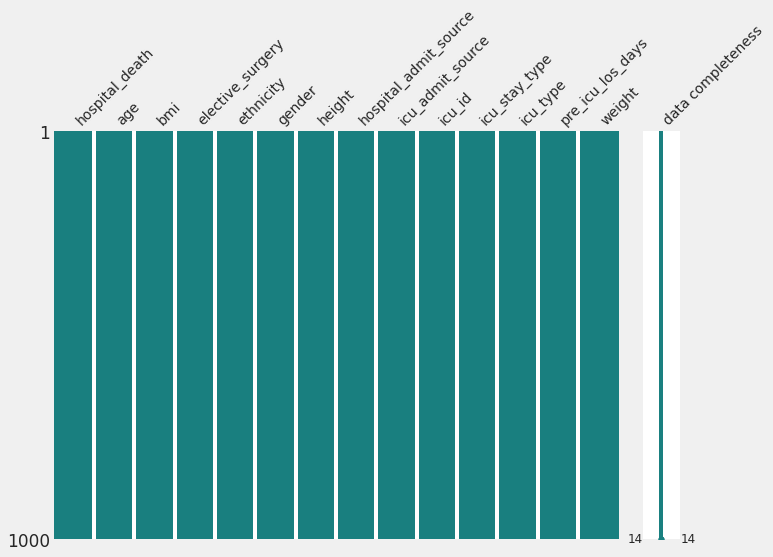

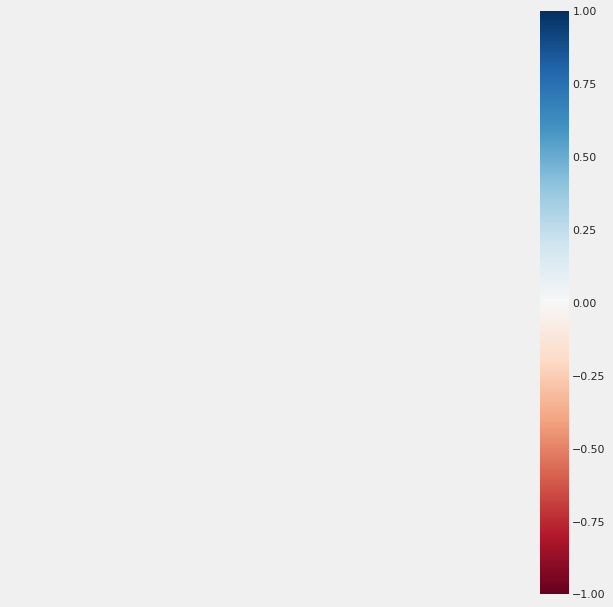

APACHE covariate


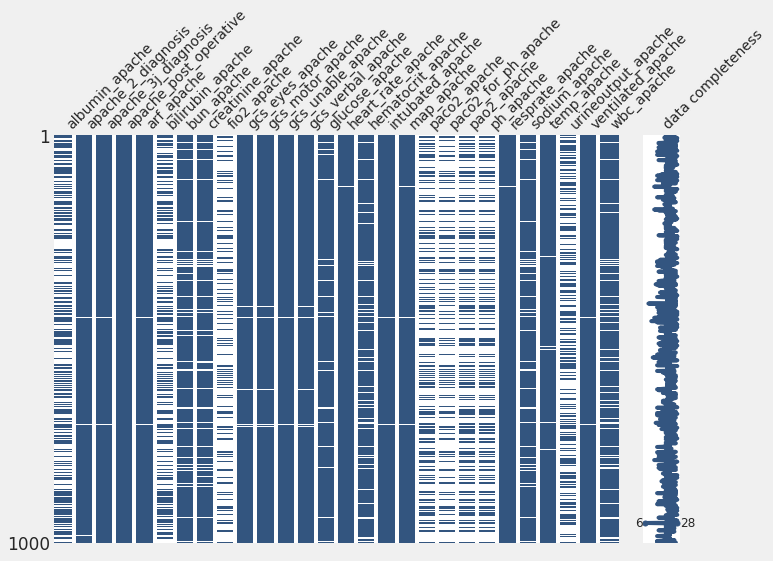

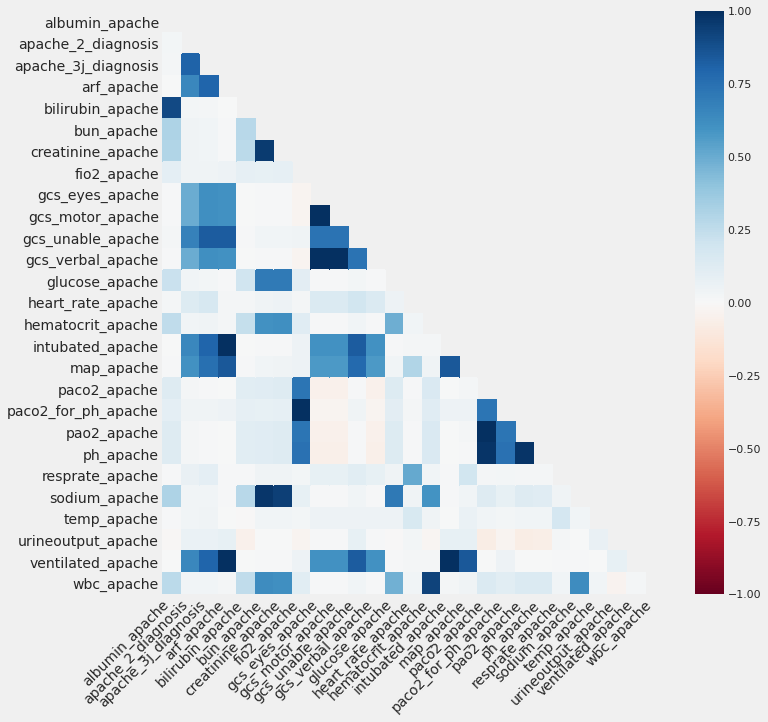

vitals


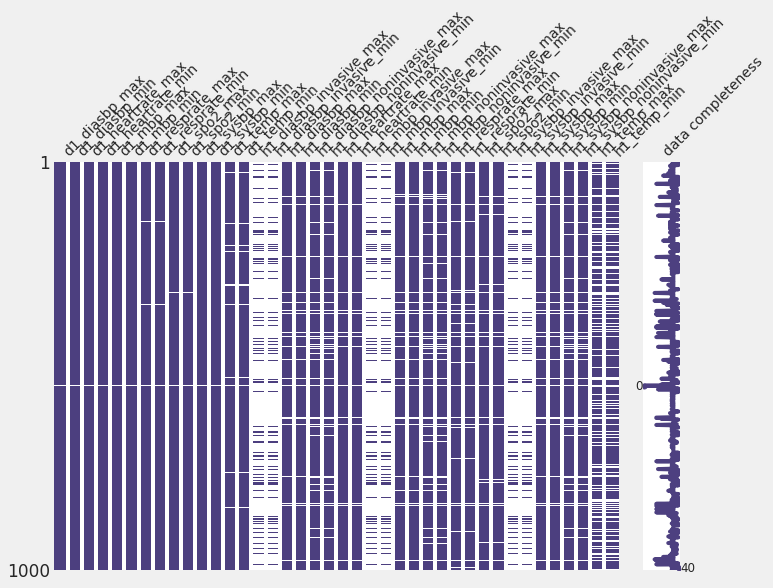

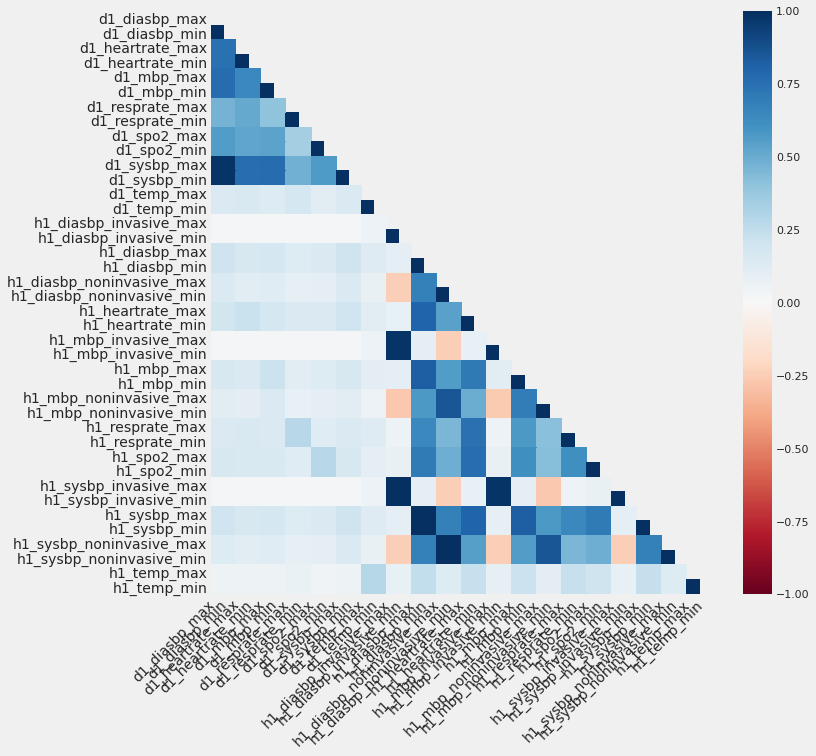

labs


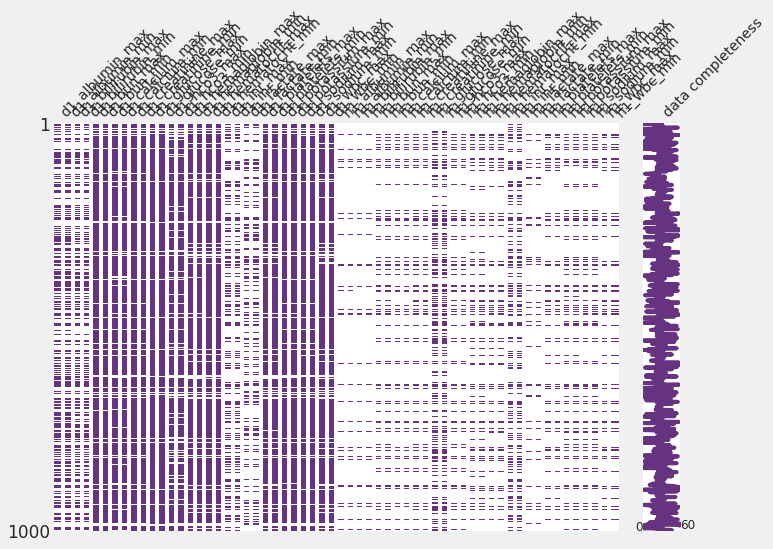

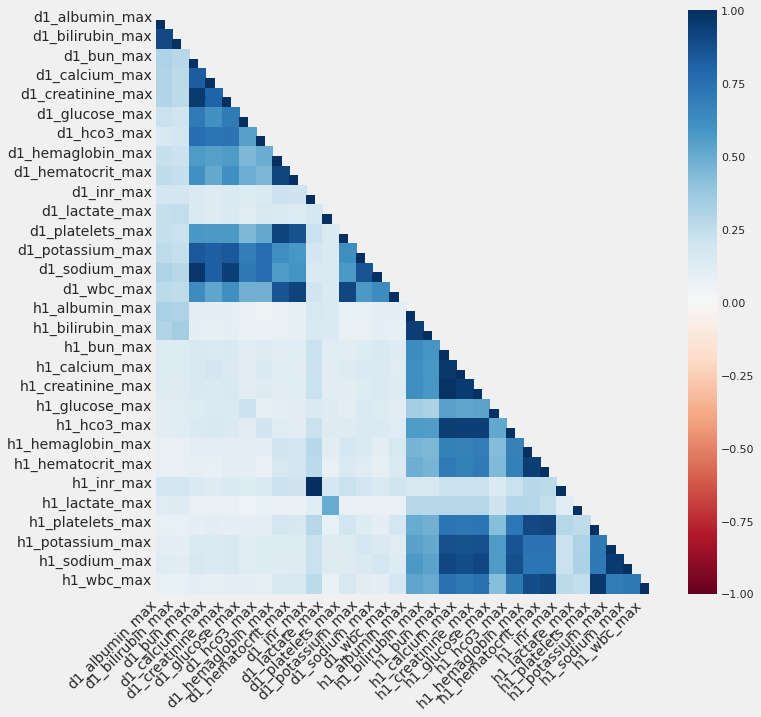

labs blood gas


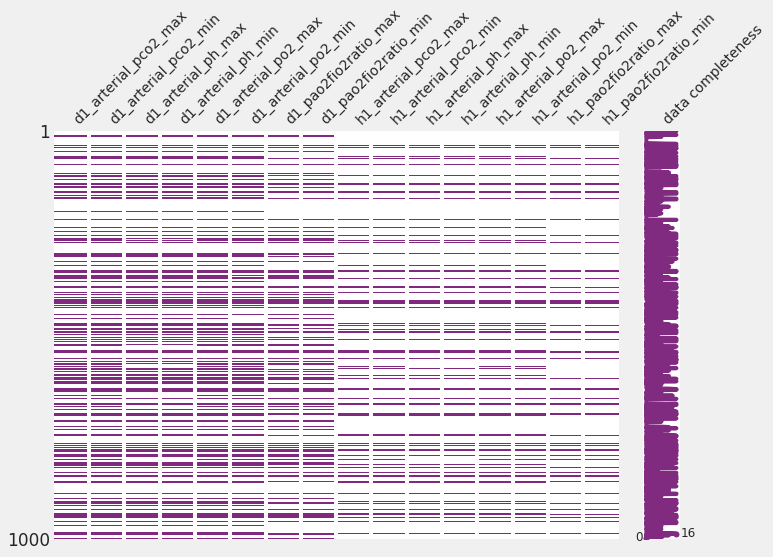

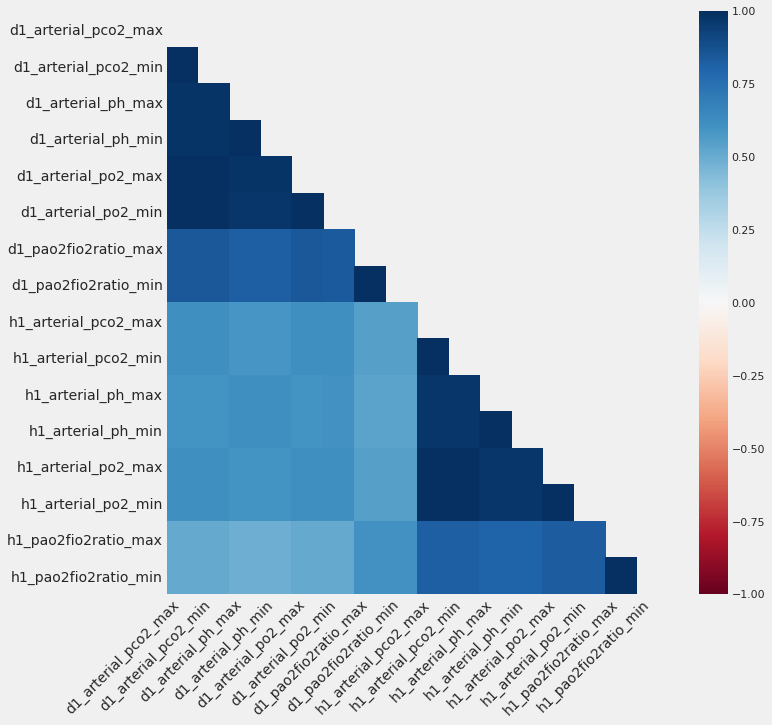

APACHE prediction


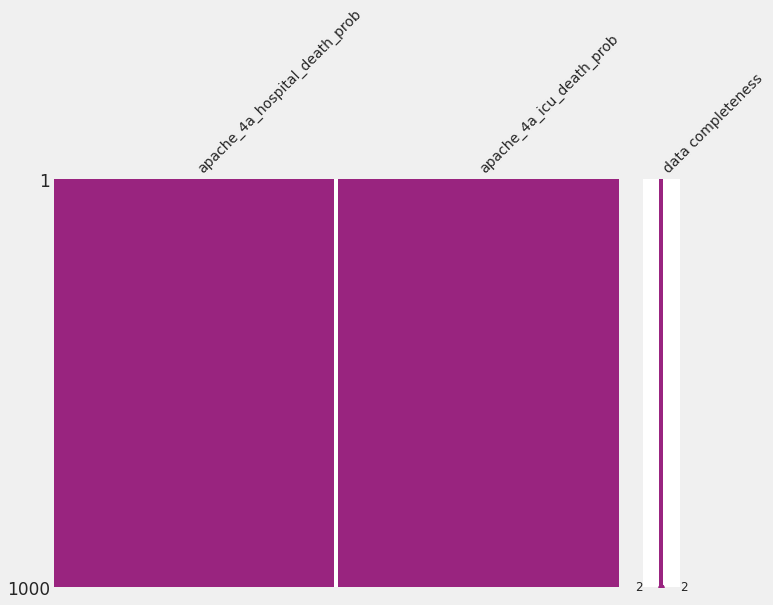

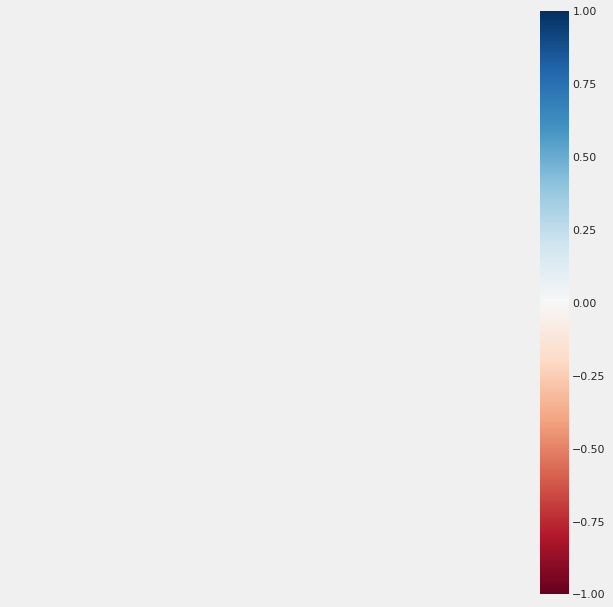

APACHE comorbidity


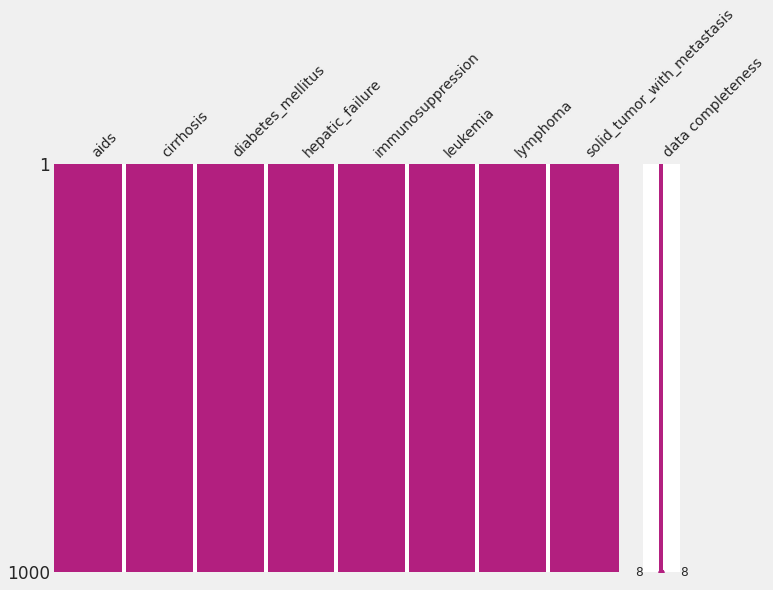

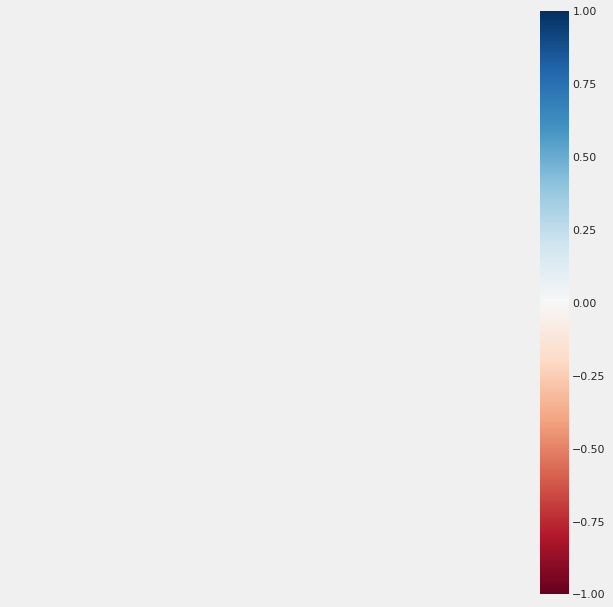

APACHE grouping


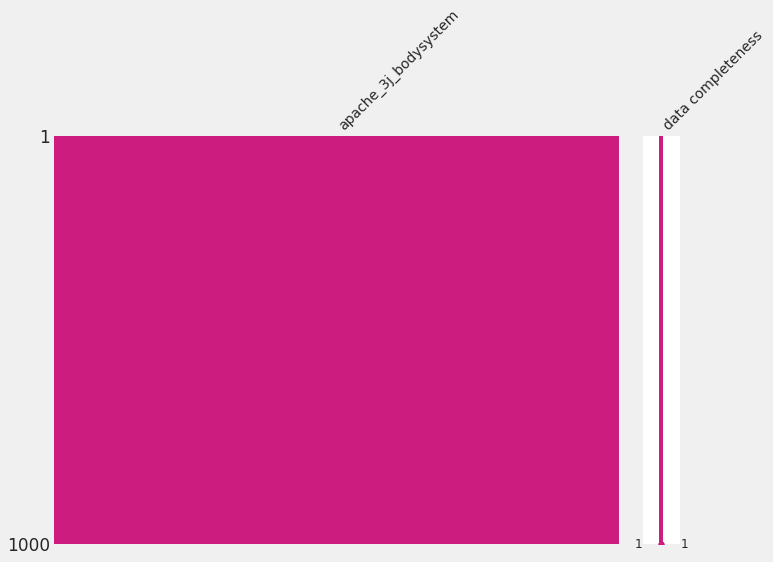

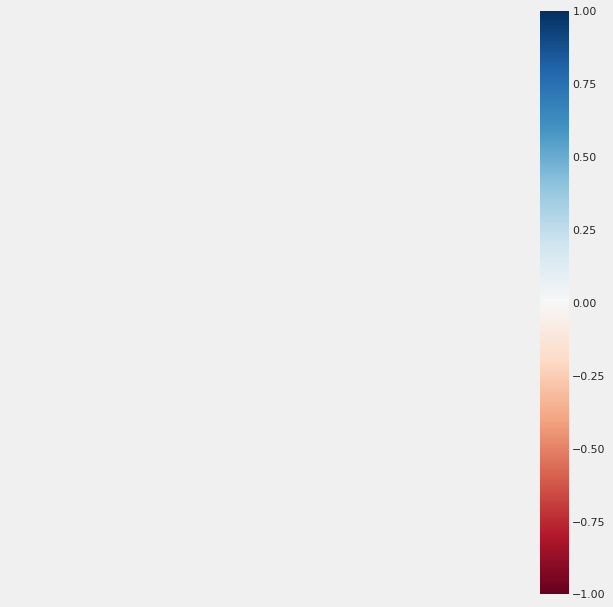

In [5]:
for color, variable in enumerate(dictionary['Category'].unique()):
  if variable not in ['GOSSIS example prediction','identifier']:
    print(variable)
    col_list = list(dictionary[dictionary['Category']==variable]['Variable Name'].values)
    col_list = [f for f in col_list if f in df.columns]
    if len(col_list) > 0:
        msno.matrix(df[col_list].sample(1000),figsize=(10, 7), labels=True, color=(color/10, 1/(color+1), 0.5),  fontsize=14)
        msno.heatmap(df[col_list],figsize=(10, 10),labels=False,fontsize=14)
        plt.show()

In [0]:
# look at how many missing values for the columns
missing_values_count= df.isnull().sum()
missing_values_percentage=np.round(df.isnull().sum()/df.shape[0]*100,2)

#show it in dataframe
data = {'Number_missing':missing_values_count, 'Missing_percentage':missing_values_percentage} 
  
# Create DataFrame 
missing_info = pd.DataFrame(data) 
  
# Print the output. 
missing_info.sort_values('Missing_percentage',ascending = False)

,Number_missing,Missing_percentage
h1_bilirubin_max,84619,92.3
h1_bilirubin_min,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
### II. WRITING FUNCTION TO IMPUTE MISSING

1. stat_missing: check distribution of columns that need to impute
2. impute_mode_3j: impute value of max and min by mode - groupby apache-3j-bodysystem
3. impute_apache: custom function based on the characteristic of each apache variable, either by max or min of d1
4. max_min: dustribution of features
5. missing_df: check % of missing value
___

In [0]:
def stat_missing(col, des_col):
    for i in col:
        var = i

        ''' Check distribution of diff, min, max '''
        X = df[(df[var[0]].notnull()) & (df[var[1]].notnull())]
        X['diff'] = X[var[0]] - X[var[1]]
        print(X[des_col].describe())
        print('-------'*15)
        display(X.groupby('apache_3j_bodysystem')[des_col].describe())
        print('-------'*15)

        ''' Return number of patients groupby pache_3j_bodysystem '''
        Y = df[(df[var[0]].isnull()) & (df[var[1]].isnull())]
        print('Group by apache_3j_bodysystem:','\n')
        print(Y.groupby('apache_3j_bodysystem')['apache_3j_bodysystem'].count())

In [0]:
def impute_mode_3j(use_cols):
    for i in use_cols:
        var = i
        l = df[df[var[1]].isnull()].index.tolist()
        X = (df.groupby([var[0]] + [var[1]]).size().to_frame('counts').reset_index().sort_values('counts', ascending=False).drop_duplicates(subset=[var[0]])).drop(columns='counts')
        Y = (df.groupby([var[0]] + [var[2]]).size().to_frame('counts').reset_index().sort_values('counts', ascending=False).drop_duplicates(subset=[var[0]])).drop(columns='counts')
        Z = pd.merge(X.reset_index(), Y.reset_index(), how='right', on=[var[0]]).drop(columns=['index_x','index_y'])
        print('Mode_value_by_apache_3j_bd:')
        display(Z)
        df.loc[df[var[1]].isnull(), var[1]] = df[var[0]].map(X.set_index(var[0])[var[1]])
        df.loc[df[var[2]].isnull(), var[2]] = df[var[0]].map(Y.set_index(var[0])[var[2]])
        print('------'*15)
        print('No_missing_value_max:',df[var[1]].isnull().sum())
        print('No_missing_value_min:',df[var[2]].isnull().sum())
        print('------'*15)
        print('Check_impute_data:')
        display(df[df.index.isin(l)][[var[0],var[1],var[2]]].head(2))
        # display(l)

In [0]:
def impute_apache_maxVar(df, apa_impute_cols):
    for index, row in df.iterrows():
        for i in apa_impute_cols:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]

    print('apache_missing:',df[df[var[2]].isnull()].shape[0])
    print('min_missing:',df[df[var[1]].isnull()].shape[0])
    print('max_missing:',df[df[var[0]].isnull()].shape[0])
    print('all_missing_together:',df[(df[var[2]].isnull())&(df[var[1]].isnull())&(df[var[1]].isnull())].shape[0])

In [0]:
def impute_apache_minVar(df, apa_impute_cols):
    for index, row in df.iterrows():
        for i in apa_impute_cols:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

    print('apache_missing:',df[df[var[2]].isnull()].shape[0])
    print('min_missing:',df[df[var[1]].isnull()].shape[0])
    print('max_missing:',df[df[var[0]].isnull()].shape[0])
    print('all_missing_together:',df[(df[var[2]].isnull())&(df[var[1]].isnull())&(df[var[1]].isnull())].shape[0])

In [0]:
def max_min(col, col_view):
        print(df[col[0]].describe())
        print('--------'*15)
        print(df[col[1]].describe())
        print('--------'*15)
        return df[df[col[0]]> df[col[1]]][col_view]

In [0]:
def missing_df(df):
    # look at how many missing values for the columns
    missing_values_count= df.isnull().sum()
    missing_values_percentage=np.round(df.isnull().sum()/df.shape[0]*100,2)

    #show it in dataframe
    data = {'Number_missing':missing_values_count, 'Missing_percentage':missing_values_percentage} 
  
    # Create DataFrame 
    missing_info = pd.DataFrame(data) 
  
    # Print the output.     
    display(missing_info.sort_values('Missing_percentage',ascending = False))

___
### III. VITALS

___

#### 3.1 resprate

##### d1 + apache

In [0]:
col = [('d1_resprate_max', 'd1_resprate_min')]
des_col = ['diff', 'd1_resprate_max', 'd1_resprate_min']
use_cols = [('apache_3j_bodysystem', 'd1_resprate_max', 'd1_resprate_min')]
apa_impute_cols =[('d1_resprate_max', 'd1_resprate_min', 'resprate_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_resprate_max  d1_resprate_min
count 91370.0 91370.0          91370.0         
mean  16.0    28.9             12.8            
std   11.8    10.7             5.1             
min   0.0     8.0              0.0             
25%   9.0     22.0             10.0            
50%   14.0    26.0             13.0            
75%   20.0    32.0             16.0            
max   92.0    100.0            92.0            
---------------------------------------------------------------------------------------------------------


diff                                   d1_resprate_max                                     d1_resprate_min                                 
                       count mean  std min  25%  50%  75%  max           count mean  std  min  25%  50%  75%   max           count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                               
Cardiovascular       29870.0 16.1 11.8 0.0 9.0  14.0 20.0 92.0 29870.0         28.4 10.5 11.0 22.0 26.0 31.0 96.0  29870.0         12.3 5.1 0.0 10.0 12.0 15.0 92.0
Gastrointestinal     9004.0  16.1 11.9 0.0 9.0  14.0 20.0 92.0 9004.0          28.4 10.8 9.4  22.0 26.0 31.0 92.0  9004.0          12.3 4.7 0.0 10.0 12.0 15.0 42.0
Genitourinary        2163.0  15.6 12.9 0.0 8.0  13.0 19.0 92.0 2163.0          28.6 11.6 14.0 22.0 26.0 32.0 92.0  2163.0          13.0 4.9 0.0 10.0 13.0 16.0 42.0
Gynecological        311.0   13.7 9.7  0.0 7.0  12.0 18.0 68.0 311.0           25.6 8.0  14.0 20.0 23.0 28.0 68.0  311.0           11.9 4.4 0.0 10.0 12.0 16.0 20.0
Hematological        638.0   15.7 12.0 0.0 9.0  13.0 19.0 85.0 638.0           29.4 10.8 14.0 23.0 27.0 33.0 92.0  638.0           13.7 5.3 0.0 11.0 13.0 17.0 41.0
Metabolic            7630.0  14.7 11.8 0.0 8.0  12.0 18.0 92.0 7630.0          27.7 10.8 14.0 21.0 25.0 30.0 92.0  7630.0          13.0 4.6 0.0 11.0 13.0 16.0 36.0
Musculoskeletal/Skin 1161.0  15.3 10.6 0.0 9.0  13.0 19.0 82.0 1161.0          27.3 9.8  14.0 21.0 25.0 31.0 100.0 1161.0          12.0 5.2 0.0 10.0 12.0 15.0 92.0
Neurological         11870.0 15.3 11.3 0.0 9.0  13.0 19.0 92.0 11870.0         27.7 10.3 8.0  22.0 25.0 30.0 92.0  11870.0         12.4 4.4 0.0 10.0 12.0 15.0 57.0
Respiratory          11573.0 16.8 11.8 0.0 10.0 14.0 21.0 92.0 11573.0         30.7 10.8 9.0  24.0 28.0 35.0 92.0  11573.0         14.0 5.3 0.0 11.0 14.0 17.0 58.0
Sepsis               11713.0 17.5 12.2 0.0 10.0 15.0 22.0 92.0 11713.0         31.8 11.1 12.0 25.0 30.0 36.0 92.0  11713.0         14.3 5.7 0.0 11.0 14.0 18.0 53.0
Trauma               3839.0  14.2 9.7  0.0 9.0  12.0 17.0 92.0 3839.0          26.5 8.9  14.0 21.0 25.0 29.0 92.0  3839.0          12.3 4.1 0.0 10.0 12.0 15.0 44.0
Undefined            1598.0  15.6 12.0 0.0 8.0  13.0 20.0 86.0 1598.0          27.6 10.5 14.0 21.0 25.0 31.0 92.0  1598.0          11.9 5.1 0.0 9.0  12.0 15.0 35.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          129
Gastrointestinal        22 
Genitourinary           9  
Gynecological           2  
Metabolic               20 
Musculoskeletal/Skin    5  
Neurological            26 
Respiratory             36 
Sepsis                  27 
Trauma                  3  
Undefined               64 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_resprate_max,d1_resprate_min
0,Cardiovascular,24.0,12.0
1,Neurological,22.0,12.0
2,Respiratory,24.0,12.0
3,Sepsis,28.0,14.0
4,Gastrointestinal,24.0,12.0
5,Metabolic,24.0,12.0
6,Trauma,20.0,12.0
7,Genitourinary,20.0,16.0
8,Undefined,20.0,12.0
9,Musculoskeletal/Skin,22.0,12.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_resprate_max,d1_resprate_min
2699,Cardiovascular,24.0,12.0
3011,Undefined,20.0,12.0


In [0]:
impute_apache_maxVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
col = [('h1_resprate_max', 'h1_resprate_min')]
des_col = ['diff', 'h1_resprate_max', 'h1_resprate_min']
use_cols = [('apache_3j_bodysystem', 'h1_resprate_max', 'h1_resprate_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_resprate_max  h1_resprate_min
count 87356.0 87356.0          87356.0         
mean  5.5     22.7             17.2            
std   6.5     7.6              5.9             
min   0.0     10.0             0.0             
25%   0.0     18.0             14.0            
50%   4.0     21.0             16.0            
75%   8.0     26.0             20.0            
max   130.0   189.0            59.0            
---------------------------------------------------------------------------------------------------------


diff                                h1_resprate_max                                    h1_resprate_min                                 
                       count mean std min 25% 50% 75%   max           count mean std  min  25%  50%  75%   max           count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                           
Cardiovascular       28313.0 5.5  6.6 0.0 0.0 4.0 8.0 130.0 28313.0         21.7 7.4 10.0 17.0 20.0 25.0 189.0 28313.0         16.2 5.6 0.0 12.0 16.0 19.0 59.0
Gastrointestinal     8585.0  5.5  6.4 0.0 0.0 4.0 8.0 68.0  8585.0          22.1 7.2 10.0 18.0 21.0 25.0 127.0 8585.0          16.6 5.3 0.0 13.0 16.0 19.0 59.0
Genitourinary        2086.0  5.2  6.3 0.0 0.0 4.0 8.0 50.0  2086.0          22.5 7.4 10.0 18.0 21.0 26.0 77.0  2086.0          17.3 5.8 0.0 14.0 16.0 20.0 59.0
Gynecological        300.0   5.0  6.0 0.0 0.0 4.0 7.0 48.0  300.0           20.2 6.2 10.0 17.0 19.0 22.0 59.0  300.0           15.2 4.4 0.0 12.0 15.0 18.0 38.0
Hematological        606.0   5.0  6.1 0.0 0.0 3.0 7.0 47.0  606.0           23.5 7.2 10.0 19.0 22.0 27.0 59.0  606.0           18.4 5.9 0.0 15.0 18.0 21.0 44.0
Metabolic            7353.0  4.8  6.1 0.0 0.0 3.0 7.0 66.0  7353.0          22.0 7.2 10.0 18.0 20.0 25.0 125.0 7353.0          17.1 5.4 0.0 14.0 16.0 20.0 59.0
Musculoskeletal/Skin 1105.0  5.6  6.4 0.0 0.0 4.0 8.0 48.0  1105.0          21.2 7.0 10.0 17.0 20.0 24.0 79.0  1105.0          15.6 5.4 0.0 12.0 15.0 18.0 59.0
Neurological         11356.0 5.2  6.2 0.0 0.0 4.0 7.0 59.0  11356.0         21.5 6.8 10.0 17.0 20.0 24.0 78.0  11356.0         16.3 5.1 0.0 13.0 16.0 19.0 59.0
Respiratory          11078.0 5.8  6.8 0.0 0.0 4.0 9.0 70.0  11078.0         24.9 8.1 10.0 19.0 24.0 29.0 129.0 11078.0         19.1 6.4 0.0 15.0 18.0 23.0 59.0
Sepsis               11350.0 5.8  6.8 0.0 0.0 4.0 8.0 59.0  11350.0         25.8 8.2 10.0 20.0 24.0 30.0 98.0  11350.0         20.0 6.8 0.0 16.0 19.0 24.0 59.0
Trauma               3738.0  5.2  6.1 0.0 0.0 4.0 8.0 54.0  3738.0          21.2 6.4 10.0 17.0 20.0 24.0 100.0 3738.0          16.0 4.6 0.0 13.0 16.0 18.0 59.0
Undefined            1486.0  5.3  6.2 0.0 0.0 4.0 8.0 53.0  1486.0          21.1 6.7 10.0 16.0 20.0 24.0 59.0  1486.0          15.8 5.7 0.0 12.0 15.0 18.0 55.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          1686
Gastrointestinal        441 
Genitourinary           86  
Gynecological           13  
Hematological           32  
Metabolic               297 
Musculoskeletal/Skin    61  
Neurological            540 
Respiratory             531 
Sepsis                  390 
Trauma                  104 
Undefined               176 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_resprate_max,h1_resprate_min
0,Cardiovascular,20.0,12.0
1,Neurological,20.0,16.0
2,Respiratory,20.0,16.0
3,Gastrointestinal,20.0,16.0
4,Sepsis,20.0,16.0
5,Metabolic,20.0,16.0
6,Trauma,20.0,16.0
7,Genitourinary,20.0,18.0
8,Undefined,18.0,16.0
9,Musculoskeletal/Skin,20.0,14.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_resprate_max,h1_resprate_min
4,Trauma,20.0,16.0
11,Neurological,20.0,16.0


#### 3.2 temperature

Using min col to impute apache

##### d1 + apache

In [0]:
col = [('d1_temp_max', 'd1_temp_min')]
des_col = ['diff', 'd1_temp_max', 'd1_temp_min']
use_cols = [('apache_3j_bodysystem', 'd1_temp_max', 'd1_temp_min')]
apa_impute_cols =[('d1_temp_max', 'd1_temp_min', 'temp_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_temp_max  d1_temp_min
count 89421.0 89421.0      89421.0     
mean  1.0     37.3         36.3        
std   0.9     0.7          0.7         
min   0.0     32.1         31.9        
25%   0.5     36.9         36.1        
50%   0.8     37.1         36.4        
75%   1.3     37.6         36.7        
max   8.0     39.9         38.5        
---------------------------------------------------------------------------------------------------------


diff                              d1_temp_max                                   d1_temp_min                                  
                       count mean std min 25% 50% 75% max       count mean std  min  25%  50%  75%  max       count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       29239.0 1.0  0.9 0.0 0.4 0.8 1.4 8.0 29239.0     37.2 0.7 32.1 36.8 37.1 37.5 39.9 29239.0     36.1 0.9 31.9 36.0 36.3 36.6 37.8
Gastrointestinal     8795.0  1.0  0.7 0.0 0.5 0.8 1.2 8.0 8795.0      37.3 0.6 35.1 36.9 37.2 37.6 39.9 8795.0      36.3 0.6 31.9 36.1 36.4 36.7 37.8
Genitourinary        2086.0  0.9  0.8 0.0 0.4 0.7 1.2 7.6 2086.0      37.2 0.7 35.1 36.8 37.1 37.4 39.9 2086.0      36.3 0.6 31.9 36.1 36.4 36.6 37.8
Gynecological        301.0   0.9  0.7 0.0 0.5 0.7 1.1 4.9 301.0       37.2 0.4 35.9 36.9 37.1 37.4 39.0 301.0       36.3 0.6 31.9 36.2 36.4 36.6 37.8
Hematological        613.0   1.0  0.8 0.0 0.5 0.8 1.3 5.9 613.0       37.4 0.7 35.6 36.9 37.2 37.7 39.9 613.0       36.4 0.6 31.9 36.2 36.5 36.7 37.8
Metabolic            7400.0  0.9  0.8 0.0 0.4 0.7 1.1 8.0 7400.0      37.2 0.6 35.1 36.8 37.1 37.4 39.9 7400.0      36.3 0.6 31.9 36.2 36.4 36.7 37.8
Musculoskeletal/Skin 1124.0  1.0  0.8 0.0 0.5 0.9 1.4 5.6 1124.0      37.4 0.7 35.3 36.9 37.2 37.7 39.9 1124.0      36.4 0.6 31.9 36.1 36.4 36.7 37.8
Neurological         11680.0 0.9  0.8 0.0 0.4 0.7 1.2 7.4 11680.0     37.3 0.6 35.1 36.9 37.1 37.6 39.9 11680.0     36.4 0.6 31.9 36.2 36.4 36.7 37.8
Respiratory          11294.0 1.0  0.8 0.0 0.5 0.8 1.3 7.9 11294.0     37.3 0.7 35.1 36.9 37.2 37.6 39.9 11294.0     36.3 0.6 31.9 36.1 36.4 36.7 37.8
Sepsis               11515.0 1.3  1.0 0.0 0.6 1.0 1.7 8.0 11515.0     37.6 0.9 35.1 36.9 37.3 38.1 39.9 11515.0     36.3 0.8 31.9 36.1 36.4 36.7 38.5
Trauma               3814.0  1.1  1.0 0.0 0.5 0.9 1.5 7.9 3814.0      37.4 0.7 35.1 37.0 37.3 37.8 39.9 3814.0      36.3 0.7 31.9 36.1 36.4 36.7 37.8
Undefined            1560.0  0.9  0.8 0.0 0.4 0.7 1.2 7.5 1560.0      37.3 0.6 35.1 36.9 37.1 37.6 39.9 1560.0      36.3 0.7 31.9 36.1 36.4 36.7 37.8

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          760
Gastrointestinal        231
Genitourinary           86 
Gynecological           12 
Hematological           25 
Metabolic               250
Musculoskeletal/Skin    42 
Neurological            216
Respiratory             315
Sepsis                  225
Trauma                  28 
Undefined               102
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_temp_max,d1_temp_min
0,Cardiovascular,36.9,36.4
1,Neurological,37.1,36.4
2,Respiratory,37.1,36.4
3,Gastrointestinal,37.1,36.4
4,Metabolic,37.1,36.4
5,Sepsis,37.2,36.4
6,Trauma,37.1,36.4
7,Genitourinary,37.1,36.4
8,Undefined,37.1,36.4
9,Musculoskeletal/Skin,37.1,36.4


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_temp_max,d1_temp_min
266,Respiratory,37.1,36.4
793,Trauma,37.1,36.4


In [0]:
impute_apache_minVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
col_view = ['h1_temp_min', 'h1_temp_max', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['h1_temp_min', 'h1_temp_max']
max_min(col, col_view)

count   69981.0
mean    36.6   
std     0.8    
min     32.9   
25%     36.3   
50%     36.6   
75%     36.9   
max     39.3   
Name: h1_temp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   69981.0
mean    36.7   
std     0.8    
min     33.4   
25%     36.4   
50%     36.7   
75%     37.0   
max     39.5   
Name: h1_temp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,h1_temp_min,h1_temp_max,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
179,39.3,33.4,Gastrointestinal,0,0.3
2188,37.1,33.4,Sepsis,0,0.0
3676,39.3,33.4,Sepsis,0,0.0
6712,39.0,33.4,Sepsis,0,0.1
8722,37.5,33.4,Sepsis,1,0.3
9039,39.3,33.4,Sepsis,1,0.1
10454,36.9,33.4,Neurological,0,0.1
12191,39.2,33.4,Genitourinary,0,0.0
18682,39.3,33.4,Sepsis,0,0.1
18881,39.3,33.4,Sepsis,0,0.1


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_temp_min'] > df.loc[index, 'h1_temp_max'] :
        df.loc[index, 'h1_temp_max'] = df.loc[index, 'h1_temp_min'] + np.random.uniform(0,0.8)

In [0]:
col = [('h1_temp_max', 'h1_temp_min')]
des_col = ['diff', 'h1_temp_max', 'h1_temp_min']
use_cols = [('apache_3j_bodysystem', 'h1_temp_max', 'h1_temp_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_temp_max  h1_temp_min
count 69981.0 69981.0      69981.0     
mean  0.1     36.7         36.6        
std   0.3     0.8          0.8         
min   0.0     33.4         32.9        
25%   0.0     36.4         36.3        
50%   0.0     36.7         36.6        
75%   0.0     37.0         36.9        
max   6.6     40.1         39.3        
---------------------------------------------------------------------------------------------------------


diff                              h1_temp_max                                   h1_temp_min                                  
                       count mean std min 25% 50% 75% max       count mean std  min  25%  50%  75%  max       count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       22840.0 0.1  0.3 0.0 0.0 0.0 0.1 6.6 22840.0     36.5 0.7 33.4 36.3 36.6 36.9 40.0 22840.0     36.4 0.8 32.9 36.1 36.5 36.8 39.3
Gastrointestinal     6936.0  0.1  0.3 0.0 0.0 0.0 0.1 6.4 6936.0      36.8 0.6 33.4 36.4 36.7 37.1 40.0 6936.0      36.6 0.6 32.9 36.4 36.7 36.9 39.3
Genitourinary        1631.0  0.1  0.3 0.0 0.0 0.0 0.0 6.6 1631.0      36.7 0.7 33.4 36.4 36.7 37.0 40.1 1631.0      36.7 0.7 32.9 36.4 36.7 36.9 39.3
Gynecological        250.0   0.1  0.4 0.0 0.0 0.0 0.1 3.8 250.0       36.6 0.5 34.2 36.4 36.6 36.9 38.8 250.0       36.5 0.6 32.9 36.3 36.5 36.8 38.8
Hematological        495.0   0.1  0.4 0.0 0.0 0.0 0.1 6.6 495.0       37.0 0.8 33.4 36.6 36.9 37.2 39.7 495.0       36.8 0.7 32.9 36.5 36.8 37.1 39.3
Metabolic            5898.0  0.1  0.3 0.0 0.0 0.0 0.0 6.6 5898.0      36.7 0.7 33.4 36.4 36.7 37.0 39.8 5898.0      36.6 0.7 32.9 36.4 36.7 36.9 39.3
Musculoskeletal/Skin 895.0   0.1  0.4 0.0 0.0 0.0 0.1 6.4 895.0       36.8 0.7 33.4 36.5 36.8 37.2 39.5 895.0       36.7 0.7 32.9 36.4 36.7 37.0 39.3
Neurological         9061.0  0.1  0.3 0.0 0.0 0.0 0.0 6.6 9061.0      36.7 0.6 33.4 36.4 36.7 37.0 40.0 9061.0      36.7 0.7 32.9 36.4 36.7 36.9 39.3
Respiratory          8716.0  0.1  0.3 0.0 0.0 0.0 0.0 6.4 8716.0      36.8 0.7 33.4 36.5 36.8 37.1 40.1 8716.0      36.8 0.7 32.9 36.4 36.7 37.1 39.3
Sepsis               8997.0  0.1  0.5 0.0 0.0 0.0 0.0 6.6 8997.0      37.0 1.0 33.4 36.5 36.9 37.5 40.1 8997.0      36.9 1.0 32.9 36.4 36.8 37.3 39.3
Trauma               3140.0  0.1  0.3 0.0 0.0 0.0 0.0 6.6 3140.0      36.7 0.8 33.4 36.4 36.7 37.1 39.5 3140.0      36.6 0.8 32.9 36.3 36.7 37.0 39.3
Undefined            1122.0  0.1  0.3 0.0 0.0 0.0 0.0 3.7 1122.0      36.7 0.7 33.4 36.4 36.7 37.0 39.5 1122.0      36.6 0.7 32.9 36.3 36.6 36.9 39.3

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          7159
Gastrointestinal        2090
Genitourinary           541 
Gynecological           63  
Hematological           143 
Metabolic               1752
Musculoskeletal/Skin    271 
Neurological            2835
Respiratory             2893
Sepsis                  2743
Trauma                  702 
Undefined               540 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_temp_max,h1_temp_min
0,Cardiovascular,36.6,36.6
1,Neurological,36.8,36.7
2,Respiratory,36.8,36.7
3,Gastrointestinal,36.8,36.6
4,Metabolic,36.7,36.7
5,Sepsis,36.8,36.8
6,Trauma,36.7,36.7
7,Genitourinary,36.7,36.7
8,Undefined,36.6,36.7
9,Musculoskeletal/Skin,36.8,36.7


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_temp_max,h1_temp_min
4,Trauma,36.7,36.7
20,Neurological,36.8,36.7


___
#### 3.3 heartrate

##### d1 + apache

In [0]:
col = [('d1_heartrate_max', 'd1_heartrate_min')]
des_col = ['diff', 'd1_heartrate_max', 'd1_heartrate_min']
use_cols = [('apache_3j_bodysystem', 'd1_heartrate_max', 'd1_heartrate_min')]
apa_impute_cols =[('d1_heartrate_max', 'd1_heartrate_min', 'heart_rate_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_heartrate_max  d1_heartrate_min
count 91575.0 91575.0           91575.0          
mean  32.7    103.0             70.3             
std   20.7    22.0              17.1             
min   0.0     58.0              0.0              
25%   20.0    87.0              60.0             
50%   29.0    101.0             69.0             
75%   41.0    116.0             81.0             
max   177.0   177.0             175.0            
---------------------------------------------------------------------------------------------------------


diff                                    d1_heartrate_max                                        d1_heartrate_min                                    
                       count mean  std min  25%  50%  75%   max            count  mean  std  min  25%   50%   75%   max            count mean  std  min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                                        
Cardiovascular       29969.0 32.2 21.7 0.0 18.0 28.0 40.0 177.0 29969.0          98.4  22.3 58.0 83.0 95.0  110.0 177.0 29969.0          66.2 16.3 0.0  57.0 66.0 76.0 175.0
Gastrointestinal     9019.0  31.8 19.8 0.0 19.0 28.0 40.0 177.0 9019.0           106.2 21.8 58.0 91.0 105.0 120.0 177.0 9019.0           74.4 16.8 0.0  64.0 74.0 85.0 145.0
Genitourinary        2169.0  30.8 19.6 0.0 18.0 28.0 39.0 166.0 2169.0           102.3 20.3 58.0 89.0 101.0 114.0 177.0 2169.0           71.5 16.6 0.0  61.0 71.0 81.0 139.0
Gynecological        312.0   32.1 15.5 0.0 21.8 29.0 41.0 101.0 312.0            105.7 18.7 62.0 93.0 104.0 117.0 177.0 312.0            73.6 13.6 31.0 65.0 73.0 81.0 119.0
Hematological        638.0   29.7 19.7 0.0 17.0 26.0 38.0 158.0 638.0            104.0 21.7 58.0 88.0 101.0 118.0 177.0 638.0            74.3 17.8 0.0  64.0 74.0 85.0 128.0
Metabolic            7646.0  31.5 18.3 0.0 19.0 29.0 41.0 154.0 7646.0           104.6 20.3 58.0 90.0 104.0 118.0 177.0 7646.0           73.1 16.2 0.0  62.0 72.0 84.0 144.0
Musculoskeletal/Skin 1161.0  31.3 18.3 0.0 20.0 28.0 40.0 133.0 1161.0           103.8 20.1 59.0 90.0 102.0 117.0 177.0 1161.0           72.5 16.5 0.0  61.0 72.0 83.0 128.0
Neurological         11891.0 32.1 18.3 0.0 20.0 29.0 40.0 177.0 11891.0          98.2  19.9 58.0 84.0 96.0  110.0 177.0 11891.0          66.1 14.5 0.0  57.0 65.0 75.0 133.0
Respiratory          11600.0 33.9 20.5 0.0 21.0 30.0 43.0 177.0 11600.0          107.1 20.7 58.0 93.0 106.0 120.0 177.0 11600.0          73.2 17.1 0.0  62.0 73.0 84.0 149.0
Sepsis               11737.0 35.4 22.9 0.0 20.0 30.0 45.0 177.0 11737.0          112.2 22.6 58.0 96.0 111.0 127.0 177.0 11737.0          76.9 19.1 0.0  65.0 77.0 89.0 155.0
Trauma               3838.0  33.4 19.5 0.0 21.0 30.0 42.0 177.0 3838.0           103.4 21.3 58.0 88.0 101.0 116.0 177.0 3838.0           70.0 15.8 0.0  60.0 69.0 79.0 138.0
Undefined            1595.0  31.0 19.2 0.0 18.0 28.0 40.0 159.0 1595.0           100.6 20.1 58.0 87.0 99.0  113.0 177.0 1595.0           69.6 16.5 0.0  60.0 69.0 80.0 138.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          30
Gastrointestinal        7 
Genitourinary           3 
Gynecological           1 
Metabolic               4 
Musculoskeletal/Skin    5 
Neurological            5 
Respiratory             9 
Sepsis                  3 
Trauma                  4 
Undefined               67
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_heartrate_max,d1_heartrate_min
0,Cardiovascular,90.0,60.0
1,Neurological,96.0,60.0
2,Respiratory,100.0,70.0
3,Sepsis,108.0,70.0
4,Gastrointestinal,98.0,70.0
5,Metabolic,100.0,66.0
6,Trauma,100.0,60.0
7,Genitourinary,108.0,60.0
8,Undefined,100.0,67.0
9,Musculoskeletal/Skin,96.0,60.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_heartrate_max,d1_heartrate_min
3011,Undefined,100.0,67.0
10486,Undefined,100.0,67.0


In [0]:
impute_apache_maxVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
col_view = ['h1_heartrate_min', 'h1_heartrate_max', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['h1_heartrate_min', 'h1_heartrate_max']

In [0]:
max_min(col, col_view)

count   88923.0
mean    83.7   
std     20.3   
min     36.0   
25%     69.0   
50%     82.0   
75%     97.0   
max     144.0  
Name: h1_heartrate_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   88923.0
mean    92.2   
std     21.8   
min     46.0   
25%     77.0   
50%     90.0   
75%     106.0  
max     164.0  
Name: h1_heartrate_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,h1_heartrate_min,h1_heartrate_max,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
201,144.0,46.0,Metabolic,0,0.0
3337,79.0,46.0,Gastrointestinal,0,0.1
6795,130.0,46.0,Metabolic,0,0.1
9259,108.0,46.0,Sepsis,1,0.2
9524,104.0,46.0,Sepsis,0,0.3
13040,91.0,46.0,Trauma,0,0.1
13580,82.0,46.0,Cardiovascular,1,0.5
13811,144.0,46.0,Cardiovascular,0,0.0
18557,144.0,46.0,Metabolic,0,0.0
19195,121.0,46.0,Sepsis,0,0.3


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_heartrate_min'] > df.loc[index, 'h1_heartrate_max'] :
        df.loc[index, 'h1_heartrate_max'] = df.loc[index, 'h1_heartrate_min'] + randint(5,10)

In [0]:
col = [('h1_heartrate_max', 'h1_heartrate_min')]
des_col = ['diff', 'h1_heartrate_max', 'h1_heartrate_min']
use_cols = [('apache_3j_bodysystem', 'h1_heartrate_max', 'h1_heartrate_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_heartrate_max  h1_heartrate_min
count 88923.0 88923.0           88923.0          
mean  8.6     92.3              83.7             
std   11.4    21.8              20.3             
min   0.0     46.0              36.0             
25%   1.0     77.0              69.0             
50%   6.0     90.0              82.0             
75%   12.0    106.0             97.0             
max   128.0   164.0             144.0            
---------------------------------------------------------------------------------------------------------


diff                                  h1_heartrate_max                                        h1_heartrate_min                                     
                       count mean  std min 25% 50%  75%   max            count  mean  std  min  25%   50%   75%   max            count mean  std  min  25%  50%   75%   max
apache_3j_bodysystem                                                                                                                                                       
Cardiovascular       29017.0 9.1  12.5 0.0 1.0 6.0 12.0 128.0 29017.0          87.4  22.1 46.0 72.0 84.0  99.0  164.0 29017.0          78.3 19.9 36.0 65.0 76.0 90.0  144.0
Gastrointestinal     8715.0  8.3  10.7 0.0 1.0 6.0 11.0 127.0 8715.0           95.3  20.7 46.0 80.0 94.0  108.0 164.0 8715.0           86.9 19.0 36.0 73.0 85.0 100.0 144.0
Genitourinary        2123.0  7.6  10.0 0.0 1.0 5.0 10.0 113.0 2123.0           91.3  20.1 46.0 77.0 90.0  103.0 164.0 2123.0           83.7 19.1 36.0 70.0 83.0 95.0  144.0
Gynecological        303.0   10.9 12.1 0.0 3.0 8.0 15.0 90.0  303.0            93.0  19.5 52.0 80.0 91.0  103.5 164.0 303.0            82.1 17.1 47.0 70.5 80.0 91.5  144.0
Hematological        617.0   6.7  8.1  0.0 0.0 4.0 9.0  64.0  617.0            95.2  19.9 49.0 81.0 93.0  108.0 152.0 617.0            88.5 19.1 36.0 75.0 87.0 102.0 144.0
Metabolic            7448.0  7.8  9.6  0.0 0.0 5.0 11.0 108.0 7448.0           95.9  21.0 46.0 81.0 95.0  110.0 164.0 7448.0           88.0 20.1 36.0 74.0 87.0 102.0 144.0
Musculoskeletal/Skin 1120.0  8.6  11.4 0.0 1.0 6.0 11.2 113.0 1120.0           93.0  19.7 46.0 79.0 92.0  105.0 164.0 1120.0           84.4 18.9 36.0 71.0 83.0 97.0  144.0
Neurological         11531.0 8.4  10.0 0.0 1.0 6.0 12.0 121.0 11531.0          86.2  19.0 46.0 72.0 84.0  98.0  164.0 11531.0          77.8 17.4 36.0 65.0 76.0 88.0  144.0
Respiratory          11271.0 8.4  10.9 0.0 1.0 6.0 12.0 128.0 11271.0          97.1  21.0 46.0 82.0 96.0  111.0 164.0 11271.0          88.7 19.6 36.0 74.0 88.0 102.0 144.0
Sepsis               11507.0 8.3  11.8 0.0 0.0 5.0 11.0 128.0 11507.0          101.8 22.1 46.0 86.0 101.0 116.0 164.0 11507.0          93.5 20.7 36.0 79.0 93.0 108.0 144.0
Trauma               3760.0  9.6  11.9 0.0 2.0 6.0 13.0 128.0 3760.0           91.4  20.1 46.0 77.0 89.0  103.0 164.0 3760.0           81.8 18.0 36.0 69.0 80.0 93.0  144.0
Undefined            1511.0  8.3  10.2 0.0 1.0 6.0 12.0 78.0  1511.0           89.5  19.6 46.0 76.0 88.0  102.0 160.0 1511.0           81.2 18.6 36.0 68.0 80.0 93.0  144.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          982
Gastrointestinal        311
Genitourinary           49 
Gynecological           10 
Hematological           21 
Metabolic               202
Musculoskeletal/Skin    46 
Neurological            365
Respiratory             338
Sepsis                  233
Trauma                  82 
Undefined               151
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_heartrate_max,h1_heartrate_min
0,Cardiovascular,80.0,80.0
1,Neurological,88.0,60.0
2,Sepsis,96.0,98.0
3,Respiratory,98.0,96.0
4,Gastrointestinal,84.0,80.0
5,Metabolic,96.0,80.0
6,Trauma,82.0,74.0
7,Genitourinary,94.0,80.0
8,Undefined,86.0,80.0
9,Musculoskeletal/Skin,88.0,80.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_heartrate_max,h1_heartrate_min
83,Undefined,86.0,80.0
328,Cardiovascular,80.0,80.0


#### 3.4 spo2

##### d1

In [0]:
col = [('d1_spo2_max', 'd1_spo2_min')]
des_col = ['diff', 'd1_spo2_max', 'd1_spo2_min']
use_cols = [('apache_3j_bodysystem', 'd1_spo2_max', 'd1_spo2_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_spo2_max  d1_spo2_min
count 91380.0 91380.0      91380.0     
mean  8.8     99.2         90.5        
std   10.0    1.8          10.0        
min   0.0     0.0          0.0         
25%   4.0     99.0         89.0        
50%   7.0     100.0        92.0        
75%   10.0    100.0        95.0        
max   100.0   100.0        100.0       
---------------------------------------------------------------------------------------------------------


diff                                  d1_spo2_max                                       d1_spo2_min                                    
                       count mean  std min 25% 50%  75%   max       count mean std  min   25%   50%   75%   max       count mean  std  min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                           
Cardiovascular       29894.0 8.8  10.3 0.0 4.0 7.0 10.0 100.0 29894.0     99.2 2.1 0.0  99.0  100.0 100.0 100.0 29894.0     90.4 10.3 0.0  90.0 92.0 95.0 100.0
Gastrointestinal     9005.0  8.8  10.1 0.0 4.0 7.0 10.0 100.0 9005.0      99.4 1.9 0.0  99.0  100.0 100.0 100.0 9005.0      90.6 10.2 0.0  90.0 93.0 95.0 100.0
Genitourinary        2166.0  8.6  9.7  0.0 4.0 6.0 10.0 100.0 2166.0      99.3 1.4 76.0 99.0  100.0 100.0 100.0 2166.0      90.7 9.7  0.0  89.0 93.0 96.0 100.0
Gynecological        312.0   6.3  4.9  0.0 3.0 6.0 8.0  46.0  312.0       99.6 0.9 95.0 100.0 100.0 100.0 100.0 312.0       93.3 5.0  54.0 91.0 94.0 96.0 100.0
Hematological        637.0   9.3  12.2 0.0 3.0 6.0 11.0 100.0 637.0       99.5 1.2 87.0 100.0 100.0 100.0 100.0 637.0       90.3 12.2 0.0  89.0 93.0 96.0 100.0
Metabolic            7615.0  6.7  7.8  0.0 3.0 5.0 8.0  100.0 7615.0      99.3 1.3 56.0 99.0  100.0 100.0 100.0 7615.0      92.6 7.8  0.0  91.0 94.0 96.0 100.0
Musculoskeletal/Skin 1157.0  8.6  8.6  0.0 4.0 7.0 10.0 99.0  1157.0      99.3 1.8 64.0 99.0  100.0 100.0 100.0 1157.0      90.7 8.5  1.0  90.0 92.0 95.0 100.0
Neurological         11868.0 7.4  8.4  0.0 4.0 6.0 8.0  100.0 11868.0     99.3 1.5 0.0  99.0  100.0 100.0 100.0 11868.0     91.9 8.3  0.0  91.0 93.0 96.0 100.0
Respiratory          11580.0 10.0 10.2 0.0 5.0 8.0 12.0 100.0 11580.0     99.1 1.6 67.0 99.0  100.0 100.0 100.0 11580.0     89.1 10.2 0.0  88.0 91.0 94.0 100.0
Sepsis               11723.0 10.7 11.7 0.0 5.0 8.0 12.0 100.0 11723.0     99.2 1.9 13.0 99.0  100.0 100.0 100.0 11723.0     88.5 11.7 0.0  87.0 92.0 94.0 100.0
Trauma               3835.0  8.0  8.9  0.0 4.0 6.0 9.0  100.0 3835.0      99.3 1.6 40.0 99.0  100.0 100.0 100.0 3835.0      91.3 8.9  0.0  90.0 93.0 95.0 100.0
Undefined            1588.0  8.0  9.6  0.0 4.0 6.0 9.0  100.0 1588.0      99.2 1.6 75.0 99.0  100.0 100.0 100.0 1588.0      91.2 9.6  0.0  90.0 93.0 95.0 100.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          105
Gastrointestinal        21 
Genitourinary           6  
Gynecological           1  
Hematological           1  
Metabolic               35 
Musculoskeletal/Skin    9  
Neurological            28 
Respiratory             29 
Sepsis                  17 
Trauma                  7  
Undefined               74 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_spo2_max,d1_spo2_min
0,Cardiovascular,100.0,93.0
1,Sepsis,100.0,92.0
2,Neurological,100.0,94.0
3,Respiratory,100.0,92.0
4,Gastrointestinal,100.0,92.0
5,Metabolic,100.0,95.0
6,Trauma,100.0,93.0
7,Genitourinary,100.0,95.0
8,Undefined,100.0,93.0
9,Musculoskeletal/Skin,100.0,92.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_spo2_max,d1_spo2_min
3011,Undefined,100.0,93.0
8653,Sepsis,100.0,92.0


##### h1

In [0]:
df[df['h1_spo2_min'] > df['h1_spo2_max']]

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem


In [0]:
col = [('h1_spo2_max', 'h1_spo2_min')]
des_col = ['diff', 'h1_spo2_max', 'h1_spo2_min']
use_cols = [('apache_3j_bodysystem', 'h1_spo2_max', 'h1_spo2_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_spo2_max  h1_spo2_min
count 87528.0 87528.0      87528.0     
mean  2.9     98.0         95.2        
std   5.8     3.2          6.6         
min   0.0     0.0          0.0         
25%   0.0     97.0         94.0        
50%   1.0     99.0         96.0        
75%   4.0     100.0        99.0        
max   100.0   100.0        100.0       
---------------------------------------------------------------------------------------------------------


diff                                h1_spo2_max                                      h1_spo2_min                                    
                       count mean std min 25% 50% 75%   max       count mean std  min  25%   50%   75%   max       count mean std  min  25%  50%   75%   max
apache_3j_bodysystem                                                                                                                                        
Cardiovascular       28483.0 2.9  6.3 0.0 0.0 1.0 4.0 100.0 28483.0     98.1 3.5 0.0  97.0 99.0  100.0 100.0 28483.0     95.2 7.2 0.0  94.0 96.0 99.0  100.0
Gastrointestinal     8601.0  2.8  5.9 0.0 0.0 1.0 3.0 100.0 8601.0      98.3 2.7 16.0 97.0 99.0  100.0 100.0 8601.0      95.5 6.4 0.0  94.0 97.0 99.0  100.0
Genitourinary        2083.0  2.8  5.9 0.0 0.0 1.0 3.0 95.0  2083.0      97.9 4.2 0.0  97.0 99.0  100.0 100.0 2083.0      95.1 7.1 0.0  94.0 97.0 99.0  100.0
Gynecological        302.0   2.2  3.5 0.0 0.0 1.0 3.0 36.0  302.0       98.9 1.7 90.0 98.0 100.0 100.0 100.0 302.0       96.7 3.8 64.0 95.0 98.0 99.0  100.0
Hematological        606.0   2.7  6.6 0.0 0.0 1.0 3.0 97.0  606.0       98.5 2.3 87.0 98.0 100.0 100.0 100.0 606.0       95.8 7.0 0.0  94.0 98.0 100.0 100.0
Metabolic            7311.0  2.1  4.4 0.0 0.0 1.0 3.0 98.0  7311.0      98.3 3.0 0.0  97.0 99.0  100.0 100.0 7311.0      96.2 5.3 0.0  95.0 97.0 99.0  100.0
Musculoskeletal/Skin 1102.0  2.9  5.7 0.0 0.0 1.0 4.0 99.0  1102.0      98.2 2.6 68.0 97.0 99.0  100.0 100.0 1102.0      95.4 6.2 1.0  94.0 96.0 99.0  100.0
Neurological         11344.0 2.2  4.4 0.0 0.0 1.0 3.0 99.0  11344.0     98.3 2.5 0.0  97.0 99.0  100.0 100.0 11344.0     96.1 5.0 0.0  95.0 97.0 99.0  100.0
Respiratory          11139.0 3.4  6.3 0.0 0.0 2.0 4.0 100.0 11139.0     97.6 3.2 18.0 96.0 98.0  100.0 100.0 11139.0     94.2 7.0 0.0  92.0 95.0 98.0  100.0
Sepsis               11365.0 3.5  6.5 0.0 0.0 2.0 4.0 100.0 11365.0     97.5 3.5 13.0 96.0 98.0  100.0 100.0 11365.0     94.0 7.2 0.0  92.0 95.0 98.0  100.0
Trauma               3711.0  2.6  4.9 0.0 0.0 1.0 3.0 93.0  3711.0      98.3 2.8 10.0 97.0 99.0  100.0 100.0 3711.0      95.7 5.6 5.0  94.0 97.0 99.0  100.0
Undefined            1481.0  2.5  4.1 0.0 0.0 1.0 3.0 50.0  1481.0      98.2 2.5 73.0 97.0 99.0  100.0 100.0 1481.0      95.7 4.7 50.0 94.0 97.0 99.0  100.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          1516
Gastrointestinal        425 
Genitourinary           89  
Gynecological           11  
Hematological           32  
Metabolic               339 
Musculoskeletal/Skin    64  
Neurological            552 
Respiratory             470 
Sepsis                  375 
Trauma                  131 
Undefined               181 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_spo2_max,h1_spo2_min
0,Cardiovascular,100.0,100.0
1,Neurological,100.0,100.0
2,Gastrointestinal,100.0,100.0
3,Respiratory,100.0,100.0
4,Sepsis,100.0,100.0
5,Metabolic,100.0,100.0
6,Trauma,100.0,100.0
7,Genitourinary,100.0,100.0
8,Undefined,100.0,100.0
9,Musculoskeletal/Skin,100.0,100.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_spo2_max,h1_spo2_min
117,Neurological,100.0,100.0
328,Cardiovascular,100.0,100.0


___
#### 3.5 diasbp 


##### d1

In [0]:
col = [('d1_diasbp_max', 'd1_diasbp_min')]
des_col = ['diff', 'd1_diasbp_max', 'd1_diasbp_min']
use_cols = [('apache_3j_bodysystem', 'd1_diasbp_max', 'd1_diasbp_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_diasbp_max  d1_diasbp_min
count 91548.0 91548.0        91548.0       
mean  38.3    88.5           50.2          
std   22.3    19.8           13.3          
min   0.0     46.0           13.0          
25%   23.0    75.0           42.0          
50%   35.0    86.0           50.0          
75%   50.0    99.0           58.0          
max   152.0   165.0          90.0          
---------------------------------------------------------------------------------------------------------


diff                                    d1_diasbp_max                                      d1_diasbp_min                                   
                       count mean  std min  25%  50%  75%   max         count mean  std  min  25%  50%   75%   max         count mean  std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                               
Cardiovascular       29945.0 36.2 22.5 0.0 21.0 33.0 48.0 152.0 29945.0       86.7 19.9 46.0 73.0 85.0 98.0  165.0 29945.0       50.5 13.3 13.0 42.0 50.0 58.0 90.0
Gastrointestinal     9017.0  37.5 21.5 0.0 23.0 34.0 49.0 147.0 9017.0        86.2 18.5 46.0 74.0 84.0 96.0  165.0 9017.0        48.6 13.3 13.0 40.0 48.0 57.0 90.0
Genitourinary        2170.0  39.6 23.3 0.0 24.0 36.0 51.0 148.0 2170.0        88.4 20.7 46.0 74.0 86.0 100.0 165.0 2170.0        48.8 13.8 13.0 39.0 48.0 57.0 90.0
Gynecological        312.0   34.2 18.4 0.0 22.8 33.0 43.0 142.0 312.0         87.7 18.4 46.0 74.0 86.0 100.2 165.0 312.0         53.6 13.6 13.0 45.0 53.0 62.0 90.0
Hematological        638.0   36.2 22.0 0.0 22.0 32.0 47.0 145.0 638.0         84.6 19.1 46.0 71.0 81.5 95.0  165.0 638.0         48.3 13.0 13.0 40.0 48.0 55.0 90.0
Metabolic            7648.0  37.4 20.4 0.0 24.0 35.0 48.0 152.0 7648.0        90.9 18.6 46.0 78.0 89.0 101.0 165.0 7648.0        53.6 13.2 13.0 45.0 53.0 62.0 90.0
Musculoskeletal/Skin 1163.0  36.0 20.7 0.0 22.5 33.0 46.0 130.0 1163.0        84.3 18.2 46.0 72.0 82.0 94.0  165.0 1163.0        48.3 12.5 13.0 40.0 49.0 56.0 90.0
Neurological         11884.0 41.4 22.3 0.0 26.0 38.0 53.0 152.0 11884.0       94.7 20.0 46.0 81.0 92.0 105.0 165.0 11884.0       53.3 12.8 13.0 45.0 53.0 61.0 90.0
Respiratory          11600.0 39.6 22.0 0.0 25.0 36.0 51.0 150.0 11600.0       89.8 19.2 46.0 77.0 88.0 99.0  165.0 11600.0       50.2 13.0 13.0 42.0 50.0 58.0 90.0
Sepsis               11735.0 40.7 24.0 0.0 24.0 37.0 53.0 152.0 11735.0       85.7 20.3 46.0 72.0 83.0 96.0  165.0 11735.0       45.0 12.8 13.0 37.0 45.0 53.0 90.0
Trauma               3839.0  39.5 20.8 0.0 25.0 37.0 50.0 136.0 3839.0        90.8 18.4 46.0 78.0 89.0 100.0 165.0 3839.0        51.3 12.5 13.0 43.0 51.0 59.0 90.0
Undefined            1597.0  36.3 22.2 0.0 22.0 33.0 47.0 145.0 1597.0        87.7 19.8 46.0 74.0 85.0 98.0  165.0 1597.0        51.3 13.1 13.0 43.0 51.0 60.0 90.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          54
Gastrointestinal        9 
Genitourinary           2 
Gynecological           1 
Metabolic               2 
Musculoskeletal/Skin    3 
Neurological            12
Respiratory             9 
Sepsis                  5 
Trauma                  3 
Undefined               65
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_diasbp_max,d1_diasbp_min
0,Cardiovascular,80.0,50.0
1,Neurological,90.0,51.0
2,Respiratory,94.0,50.0
3,Sepsis,80.0,50.0
4,Gastrointestinal,80.0,50.0
5,Metabolic,90.0,50.0
6,Trauma,84.0,50.0
7,Genitourinary,79.0,46.0
8,Undefined,83.0,50.0
9,Musculoskeletal/Skin,81.0,50.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_diasbp_max,d1_diasbp_min
1878,Cardiovascular,80.0,50.0
3011,Undefined,83.0,50.0


##### h1

In [0]:
df[df['h1_diasbp_min'] > df['h1_diasbp_max']].head()

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
4194,118,6650,0,55.0,22.4,0,Caucasian,F,157.5,Emergency Department,Accident & Emergency,102,admit,Neuro ICU,0.0,55.6,nan,121.0,401.0,0,0.0,nan,8.0,0.8,nan,4.0,6.0,0.0,5.0,101.0,89.0,40.7,0.0,75.0,nan,nan,nan,nan,6.0,141.0,36.8,nan,0.0,10.8,143.0,60.0,114.0,78.0,103.0,75.0,26.0,0.0,98.0,95.0,232.0,110.0,38.1,36.6,nan,nan,37.0,77.0,143.0,77.0,114.0,84.0,nan,nan,101.0,92.0,101.0,92.0,25.0,11.0,98.0,95.0,nan,nan,223.0,140.0,223.0,140.0,36.8,36.7,nan,nan,nan,nan,8.0,7.0,8.4,8.3,0.9,0.8,116.0,101.0,22.0,19.0,13.4,13.4,40.7,40.7,1.0,1.0,nan,nan,151.0,151.0,4.2,3.7,141.0,141.0,10.8,10.8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.0,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological
4324,118,21279,1,74.0,26.6,0,Caucasian,F,165.1,Direct Admit,Accident & Emergency,114,admit,CCU-CTICU,0.0,72.5,nan,112.0,107.0,0,0.0,nan,26.0,1.4,nan,4.0,6.0,0.0,5.0,312.0,93.0,40.6,0.0,68.0,nan,nan,nan,nan,49.0,133.0,36.1,nan,0.0,17.7,143.0,57.0,93.0,77.0,161.0,82.0,49.0,17.0,99.0,86.0,181.0,120.0,37.2,36.1,54.0,51.0,37.0,113.0,143.0,114.0,93.0,78.0,90.0,83.0,161.0,138.0,161.0,138.0,49.0,17.0,95.0,92.0,139.0,134.0,181.0,181.0,181.0,181.0,36.4,36.4,nan,nan,nan,nan,26.0,26.0,8.8,8.8,1.4,1

In [0]:
col_view = ['h1_diasbp_min', 'h1_diasbp_max', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['h1_diasbp_min', 'h1_diasbp_max']
max_min(col, col_view)

count   88094.0
mean    62.8   
std     16.4   
min     22.0   
25%     52.0   
50%     62.0   
75%     73.0   
max     113.0  
Name: h1_diasbp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   88094.0
mean    75.4   
std     18.4   
min     37.0   
25%     62.0   
50%     74.0   
75%     86.0   
max     143.0  
Name: h1_diasbp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,h1_diasbp_min,h1_diasbp_max,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
4194,77.0,37.0,Neurological,0,0.1
4324,113.0,37.0,Cardiovascular,1,0.0
6036,113.0,37.0,Cardiovascular,0,0.0
10861,60.0,37.0,Respiratory,0,0.1
20719,57.0,37.0,Respiratory,0,0.1
21114,64.0,37.0,Neurological,0,0.1
21807,60.0,37.0,Sepsis,0,0.0
22062,79.0,37.0,Gastrointestinal,0,0.0
23859,52.0,37.0,Respiratory,1,0.1
25963,96.0,37.0,Respiratory,0,0.2


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_diasbp_min'] > df.loc[index, 'h1_diasbp_max'] :
        df.loc[index, 'h1_diasbp_max'] = df.loc[index, 'h1_diasbp_min'] + randint(7,14)

In [0]:
col = [('h1_diasbp_max', 'h1_diasbp_min')]
des_col = ['diff', 'h1_diasbp_max', 'h1_diasbp_min']
use_cols = [('apache_3j_bodysystem', 'h1_diasbp_max', 'h1_diasbp_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_diasbp_max  h1_diasbp_min
count 88094.0 88094.0        88094.0       
mean  12.5    75.4           62.8          
std   15.0    18.4           16.4          
min   0.0     37.0           22.0          
25%   0.0     62.0           52.0          
50%   8.0     74.0           62.0          
75%   18.0    86.0           73.0          
max   121.0   143.0          113.0         
---------------------------------------------------------------------------------------------------------


diff                                   h1_diasbp_max                                     h1_diasbp_min                                    
                       count mean  std min 25%  50%  75%   max         count mean  std  min  25%  50%  75%   max         count mean  std  min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                              
Cardiovascular       28723.0 12.1 14.5 0.0 0.0 8.0  18.0 121.0 28723.0       75.0 18.4 37.0 62.0 73.0 86.0 143.0 28723.0       62.9 16.5 22.0 52.0 62.0 73.0 113.0
Gastrointestinal     8653.0  11.9 14.4 0.0 0.0 8.0  17.0 120.0 8653.0        72.4 17.0 37.0 60.0 71.0 82.0 143.0 8653.0        60.4 15.4 22.0 50.0 59.0 70.0 113.0
Genitourinary        2104.0  12.1 15.0 0.0 0.0 8.0  17.0 105.0 2104.0        73.1 19.4 37.0 59.0 70.0 85.0 143.0 2104.0        61.0 17.2 22.0 49.0 59.0 72.0 113.0
Gynecological        302.0   11.9 12.9 0.0 1.0 9.0  17.8 66.0  302.0         78.4 17.8 44.0 64.0 76.0 91.0 133.0 302.0         66.5 17.6 22.0 54.0 65.0 78.0 110.0
Hematological        609.0   11.3 14.4 0.0 0.0 7.0  16.0 94.0  609.0         69.0 17.3 37.0 57.0 66.0 79.0 143.0 609.0         57.6 15.1 22.0 48.0 57.0 67.0 110.0
Metabolic            7350.0  11.2 13.3 0.0 0.0 7.0  17.0 106.0 7350.0        78.3 17.6 37.0 66.0 77.0 89.0 143.0 7350.0        67.2 16.0 22.0 56.0 66.0 78.0 113.0
Musculoskeletal/Skin 1113.0  11.9 14.6 0.0 0.0 8.0  17.0 109.0 1113.0        72.3 16.5 37.0 61.0 70.0 81.0 143.0 1113.0        60.3 14.9 22.0 51.0 60.0 70.0 113.0
Neurological         11435.0 13.3 15.5 0.0 0.0 9.0  19.0 117.0 11435.0       81.6 18.1 37.0 69.0 80.0 92.0 143.0 11435.0       68.3 15.4 22.0 58.0 68.0 78.0 113.0
Respiratory          11150.0 12.9 15.6 0.0 0.0 8.0  19.0 121.0 11150.0       76.6 18.0 37.0 64.0 75.0 87.0 143.0 11150.0       63.7 15.7 22.0 53.0 63.0 74.0 113.0
Sepsis               11433.0 13.5 16.6 0.0 0.0 9.0  19.0 121.0 11433.0       69.0 18.2 37.0 56.0 66.0 79.0 143.0 11433.0       55.4 15.8 22.0 45.0 54.0 64.0 113.0
Trauma               3733.0  14.3 15.5 0.0 1.0 10.0 21.0 109.0 3733.0        79.2 17.3 37.0 67.0 78.0 90.0 143.0 3733.0        64.9 15.3 22.0 55.0 64.0 75.0 113.0
Undefined            1489.0  11.3 14.3 0.0 0.0 7.0  16.0 120.0 1489.0        75.3 17.8 37.0 63.0 74.0 85.0 143.0 1489.0        64.0 15.1 22.0 54.0 64.0 73.0 113.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          1276
Gastrointestinal        373 
Genitourinary           68  
Gynecological           11  
Hematological           29  
Metabolic               300 
Musculoskeletal/Skin    53  
Neurological            461 
Respiratory             459 
Sepsis                  307 
Trauma                  109 
Undefined               173 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_diasbp_max,h1_diasbp_min
0,Cardiovascular,70.0,60.0
1,Sepsis,58.0,50.0
2,Neurological,82.0,68.0
3,Respiratory,72.0,67.0
4,Gastrointestinal,72.0,56.0
5,Metabolic,74.0,67.0
6,Trauma,81.0,62.0
7,Genitourinary,55.0,55.0
8,Undefined,70.0,65.0
9,Musculoskeletal/Skin,70.0,65.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_diasbp_max,h1_diasbp_min
83,Undefined,70.0,65.0
117,Neurological,82.0,68.0


_____
#### 3.6 sysbp 

* d1_sysbp_max | d1_sysbp_min

##### d1

In [0]:
col = [('d1_sysbp_max', 'd1_sysbp_min')]
des_col = ['diff', 'd1_sysbp_max', 'd1_sysbp_min']
use_cols = [('apache_3j_bodysystem', 'd1_sysbp_max', 'd1_sysbp_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_sysbp_max  d1_sysbp_min
count 91554.0 91554.0       91554.0      
mean  51.4    148.4         96.9         
std   27.0    25.7          20.7         
min   0.0     90.0          41.0         
25%   33.0    130.0         83.0         
50%   49.0    146.0         96.0         
75%   66.0    164.0         110.0        
max   191.0   232.0         160.0        
---------------------------------------------------------------------------------------------------------


diff                                    d1_sysbp_max                                         d1_sysbp_min                                       
                       count mean  std min  25%  50%  75%   max        count  mean  std  min   25%   50%   75%   max        count  mean  std  min  25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                    
Cardiovascular       29950.0 50.2 27.6 0.0 32.0 48.0 65.0 191.0 29950.0      147.5 26.3 90.0 129.0 145.0 163.0 232.0 29950.0      97.3  20.8 41.0 84.0 96.0  110.0 160.0
Gastrointestinal     9018.0  51.3 26.6 0.0 34.0 49.0 66.0 191.0 9018.0       147.2 24.6 90.0 130.0 145.0 162.0 232.0 9018.0       95.9  20.8 41.0 82.0 94.0  109.0 160.0
Genitourinary        2170.0  51.6 26.8 0.0 34.0 49.0 66.0 171.0 2170.0       147.5 26.2 90.0 129.0 145.0 164.0 232.0 2170.0       95.9  21.9 41.0 81.0 94.0  110.0 160.0
Gynecological        312.0   43.3 21.8 0.0 29.0 41.0 55.2 157.0 312.0        145.7 24.5 90.0 129.0 146.0 159.2 232.0 312.0        102.4 19.9 41.0 90.0 101.0 116.2 160.0
Hematological        638.0   47.1 25.8 0.0 30.0 45.0 60.0 174.0 638.0        144.0 24.8 90.0 126.0 142.0 160.0 232.0 638.0        96.9  20.3 41.0 84.0 96.0  108.0 160.0
Metabolic            7648.0  47.3 24.8 0.0 31.0 44.0 61.0 167.0 7648.0       147.4 24.5 90.0 130.0 144.0 162.0 232.0 7648.0       100.1 18.7 41.0 88.0 99.0  111.0 160.0
Musculoskeletal/Skin 1163.0  48.7 24.1 0.0 32.0 46.0 63.0 142.0 1163.0       144.0 23.7 90.0 127.5 142.0 157.0 232.0 1163.0       95.3  19.0 41.0 83.0 94.0  107.0 160.0
Neurological         11884.0 54.3 26.4 0.0 36.0 51.0 69.0 191.0 11884.0      158.6 25.6 90.0 141.0 157.0 175.0 232.0 11884.0      104.3 19.8 41.0 92.0 104.0 116.0 160.0
Respiratory          11600.0 53.2 27.0 0.0 35.0 50.0 68.0 191.0 11600.0      149.2 24.6 90.0 132.0 147.0 164.0 232.0 11600.0      96.0  19.8 41.0 83.0 95.0  108.0 160.0
Sepsis               11735.0 54.0 27.8 0.0 35.0 51.0 69.0 191.0 11735.0      140.7 24.8 90.0 124.0 138.0 155.0 232.0 11735.0      86.7  19.4 41.0 74.0 85.0  97.0  160.0
Trauma               3839.0  50.5 25.4 0.0 33.0 47.0 65.0 179.0 3839.0       150.8 23.1 90.0 135.0 149.0 165.0 232.0 3839.0       100.3 18.8 41.0 89.0 100.0 112.0 160.0
Undefined            1597.0  49.1 27.2 0.0 31.0 46.0 65.0 191.0 1597.0       149.2 26.1 90.0 131.0 146.0 166.0 232.0 1597.0       100.1 21.1 41.0 86.0 99.0  114.0 160.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          49
Gastrointestinal        8 
Genitourinary           2 
Gynecological           1 
Metabolic               2 
Musculoskeletal/Skin    3 
Neurological            12
Respiratory             9 
Sepsis                  5 
Trauma                  3 
Undefined               65
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_sysbp_max,d1_sysbp_min
0,Cardiovascular,140.0,90.0
1,Sepsis,127.0,80.0
2,Respiratory,147.0,90.0
3,Neurological,160.0,99.0
4,Gastrointestinal,134.0,94.0
5,Metabolic,140.0,92.0
6,Trauma,138.0,90.0
7,Genitourinary,150.0,99.0
8,Undefined,140.0,97.0
9,Musculoskeletal/Skin,149.0,90.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_sysbp_max,d1_sysbp_min
1878,Cardiovascular,140.0,90.0
3011,Undefined,140.0,97.0


##### h1

In [0]:
df[df['h1_sysbp_min'] > df['h1_sysbp_max']].head()

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
84,118,72096,0,67.0,33.3,0,Caucasian,M,170.2,Emergency Department,Accident & Emergency,100,admit,Neuro ICU,0.0,96.6,nan,303.0,208.0,0,0.0,nan,21.0,1.5,nan,1.0,1.0,0.0,1.0,398.0,176.0,30.1,0.0,196.0,nan,nan,nan,nan,43.0,139.0,36.6,nan,1.0,18.9,141.0,71.0,150.0,92.0,184.0,67.0,43.0,4.0,98.0,71.0,223.0,119.0,38.0,36.6,nan,nan,141.0,103.0,141.0,103.0,150.0,120.0,nan,nan,165.0,106.0,163.0,106.0,30.0,16.0,97.0,71.0,nan,nan,75.0,128.0,75.0,128.0,36.8,36.7,nan,nan,nan,nan,21.0,21.0,8.1,8.1,1.5,1.5,398.0,89.0,24.0,24.0,11.7,10.7,32.9,30.1,nan,nan,nan,nan,230.0,230.0,3.8,3.8,139.0,139.0,18.9,18.9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory
3793,118,107781,0,81.0,21.1,0,African American,F,167.6,Emergency Department,Accident & Emergency,99,admit,Med-Surg ICU,0.0,59.3,nan,302.0,109.0,0,0.0,nan,19.0,0.8,nan,4.0,6.0,0.0,5.0,116.0,128.0,nan,0.0,180.0,nan,nan,nan,nan,49.0,141.0,36.7,nan,0.0,nan,115.0,51.0,110.0,66.0,133.0,77.0,43.0,12.0,99.0,97.0,223.0,115.0,37.2,36.7,nan,nan,115.0,77.0,115.0,77.0,85.0,76.0,nan,nan,117.0,117.0,117.0,117.0,28.0,18.0,98.0,97.0,nan,nan,75.0,186.0,75.0,186.0,36.7,36.7,nan,nan,nan,nan,19.0,19.

In [0]:
col_view = ['h1_sysbp_min', 'h1_sysbp_max', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['h1_sysbp_min', 'h1_sysbp_max']
max_min(col, col_view)

count   88102.0
mean    116.4  
std     26.5   
min     53.0   
25%     98.0   
50%     115.0  
75%     134.0  
max     194.0  
Name: h1_sysbp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   88102.0
mean    133.2  
std     27.6   
min     75.0   
25%     113.0  
50%     131.0  
75%     150.0  
max     223.0  
Name: h1_sysbp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,h1_sysbp_min,h1_sysbp_max,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
84,128.0,75.0,Respiratory,0,0.2
3793,186.0,75.0,Cardiovascular,0,0.0
4403,133.0,75.0,Gastrointestinal,0,0.0
4527,138.0,75.0,Cardiovascular,0,0.0
5148,145.0,75.0,Cardiovascular,0,0.0
5326,135.0,75.0,Gastrointestinal,1,0.0
13060,164.0,75.0,Cardiovascular,0,0.0
25843,194.0,75.0,Gastrointestinal,0,0.0
26992,187.0,75.0,Cardiovascular,0,0.0
29304,122.0,75.0,Neurological,0,0.2


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_sysbp_min'] > df.loc[index, 'h1_sysbp_max']:
        df.loc[index, 'h1_sysbp_max'] = df.loc[index, 'h1_sysbp_min'] + randint(10, 17)

In [0]:
col = [('h1_sysbp_max', 'h1_sysbp_min')]
des_col = ['diff', 'h1_sysbp_max', 'h1_sysbp_min']
use_cols = [('apache_3j_bodysystem', 'h1_sysbp_max', 'h1_sysbp_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_sysbp_max  h1_sysbp_min
count 88102.0 88102.0       88102.0      
mean  16.9    133.3         116.4        
std   19.7    27.6          26.5         
min   0.0     75.0          53.0         
25%   0.0     113.0         98.0         
50%   12.0    131.0         115.0        
75%   25.0    150.0         134.0        
max   170.0   223.0         194.0        
---------------------------------------------------------------------------------------------------------


diff                                   h1_sysbp_max                                         h1_sysbp_min                                        
                       count mean  std min 25%  50%  75%   max        count  mean  std  min   25%   50%   75%   max        count  mean  std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                    
Cardiovascular       28729.0 17.5 20.3 0.0 0.0 12.0 26.0 170.0 28729.0      134.1 27.9 75.0 114.0 131.0 150.0 223.0 28729.0      116.6 26.7 53.0 98.0  114.0 133.0 194.0
Gastrointestinal     8653.0  16.3 18.7 0.0 0.0 12.0 24.0 170.0 8653.0       131.1 26.0 75.0 112.0 128.0 147.0 223.0 8653.0       114.9 25.6 53.0 97.0  113.0 132.0 194.0
Genitourinary        2104.0  15.9 17.9 0.0 0.0 11.0 24.0 138.0 2104.0       130.6 28.4 75.0 108.0 129.0 149.0 223.0 2104.0       114.8 28.0 53.0 94.0  112.0 134.0 194.0
Gynecological        302.0   15.0 16.2 0.0 1.0 12.0 20.0 83.0  302.0        134.9 24.3 83.0 117.0 134.0 151.0 223.0 302.0        119.8 24.8 53.0 101.2 119.0 138.0 194.0
Hematological        609.0   13.3 15.2 0.0 0.0 9.0  20.0 96.0  609.0        126.4 26.1 75.0 108.0 123.0 143.0 223.0 609.0        113.1 24.6 53.0 96.0  112.0 128.0 194.0
Metabolic            7351.0  13.8 16.1 0.0 0.0 10.0 21.0 170.0 7351.0       133.4 25.3 75.0 116.0 130.0 148.0 223.0 7351.0       119.6 24.3 53.0 103.0 118.0 134.0 194.0
Musculoskeletal/Skin 1113.0  16.6 19.8 0.0 0.0 11.0 23.0 141.0 1113.0       130.3 25.4 75.0 112.0 127.0 146.0 223.0 1113.0       113.7 25.0 53.0 97.0  112.0 130.0 194.0
Neurological         11435.0 17.4 19.7 0.0 0.0 13.0 25.0 170.0 11435.0      145.6 27.2 75.0 127.0 144.0 162.0 223.0 11435.0      128.2 25.1 53.0 112.0 128.0 145.0 194.0
Respiratory          11150.0 17.3 20.6 0.0 0.0 12.0 25.0 157.0 11150.0      133.7 25.8 75.0 115.0 131.0 149.0 223.0 11150.0      116.4 25.1 53.0 99.0  115.0 133.0 194.0
Sepsis               11433.0 17.5 20.5 0.0 0.0 12.0 25.0 164.0 11433.0      119.4 25.7 75.0 101.0 115.0 133.0 223.0 11433.0      101.9 24.7 53.0 85.0  99.0  116.0 194.0
Trauma               3734.0  18.1 19.9 0.0 1.0 13.0 27.0 159.0 3734.0       138.2 25.1 75.0 121.0 136.0 154.0 223.0 3734.0       120.1 24.2 53.0 104.0 119.0 136.0 194.0
Undefined            1489.0  15.2 18.2 0.0 0.0 10.0 22.0 170.0 1489.0       135.0 27.4 75.0 115.0 133.0 152.0 223.0 1489.0       119.8 25.9 53.0 103.0 118.0 137.0 194.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          1270
Gastrointestinal        373 
Genitourinary           68  
Gynecological           11  
Hematological           29  
Metabolic               299 
Musculoskeletal/Skin    53  
Neurological            461 
Respiratory             459 
Sepsis                  307 
Trauma                  108 
Undefined               173 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_sysbp_max,h1_sysbp_min
0,Cardiovascular,140.0,110.0
1,Sepsis,107.0,91.0
2,Respiratory,124.0,106.0
3,Neurological,137.0,122.0
4,Metabolic,118.0,118.0
5,Gastrointestinal,121.0,103.0
6,Trauma,132.0,119.0
7,Genitourinary,132.0,99.0
8,Undefined,140.0,115.0
9,Musculoskeletal/Skin,109.0,98.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_sysbp_max,h1_sysbp_min
83,Undefined,140.0,115.0
117,Neurological,137.0,122.0


___
#### 3.7 mbp


##### d1

In [0]:
col = [('d1_mbp_max', 'd1_mbp_min')]
des_col = ['diff', 'd1_mbp_max', 'd1_mbp_min']
use_cols = [('apache_3j_bodysystem', 'd1_mbp_max', 'd1_mbp_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_mbp_max  d1_mbp_min
count 91493.0 91493.0     91493.0    
mean  39.8    104.7       64.9       
std   22.7    20.8        15.7       
min   0.0     60.0        22.0       
25%   25.0    90.0        55.0       
50%   37.0    102.0       64.0       
75%   52.0    116.0       75.0       
max   162.0   184.0       112.0      
---------------------------------------------------------------------------------------------------------


diff                                    d1_mbp_max                                        d1_mbp_min                                    
                       count mean  std min  25%  50%  75%   max      count  mean  std  min  25%   50%   75%   max      count mean  std  min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                            
Cardiovascular       29940.0 38.5 23.0 0.0 23.0 36.0 51.0 162.0 29940.0    103.9 21.0 60.0 89.0 101.0 115.0 184.0 29940.0    65.4 15.7 22.0 55.0 64.0 75.0 112.0
Gastrointestinal     9017.0  38.6 21.9 0.0 24.0 36.0 50.0 162.0 9017.0     102.3 19.4 60.0 89.0 100.0 113.0 184.0 9017.0     63.7 15.8 22.0 53.0 63.0 73.0 112.0
Genitourinary        2169.0  40.6 23.4 0.0 25.0 37.0 53.0 143.0 2169.0     104.2 21.4 60.0 89.0 102.0 116.0 184.0 2169.0     63.6 16.1 22.0 52.0 62.0 74.0 112.0
Gynecological        312.0   34.2 18.7 0.0 22.0 31.5 43.0 145.0 312.0      102.4 19.4 60.0 89.0 101.0 115.0 184.0 312.0      68.2 14.4 23.0 59.0 67.0 78.2 112.0
Hematological        637.0   36.6 21.6 0.0 23.0 34.0 47.0 142.0 637.0      100.5 19.7 60.0 86.0 98.0  112.0 184.0 637.0      63.8 15.6 25.0 53.0 63.0 74.0 112.0
Metabolic            7635.0  38.0 21.0 0.0 24.0 35.0 49.0 161.0 7635.0     105.9 19.9 60.0 92.0 103.0 117.0 184.0 7635.0     67.9 15.2 22.0 58.0 67.0 77.0 112.0
Musculoskeletal/Skin 1162.0  37.1 21.0 0.0 23.0 34.0 48.0 147.0 1162.0     100.0 19.3 60.0 87.0 98.0  110.0 184.0 1162.0     62.9 14.6 22.0 53.0 63.0 72.0 112.0
Neurological         11877.0 42.5 22.3 0.0 28.0 39.0 54.0 162.0 11877.0    111.7 21.0 60.0 97.0 109.0 124.0 184.0 11877.0    69.2 15.2 22.0 60.0 68.0 78.0 112.0
Respiratory          11590.0 40.7 22.7 0.0 26.0 38.0 52.0 162.0 11590.0    105.1 20.2 60.0 91.0 103.0 116.0 184.0 11590.0    64.4 15.1 22.0 55.0 64.0 74.0 112.0
Sepsis               11729.0 42.3 24.5 0.0 26.0 39.0 55.0 162.0 11729.0    100.5 21.1 60.0 86.0 97.0  111.0 184.0 11729.0    58.2 14.9 22.0 49.0 57.0 67.0 112.0
Trauma               3838.0  39.3 20.7 0.0 25.0 36.0 50.0 162.0 3838.0     105.5 18.6 60.0 93.0 104.0 116.0 184.0 3838.0     66.2 14.3 22.0 57.0 66.0 75.0 112.0
Undefined            1587.0  38.0 22.2 0.0 24.0 35.0 49.0 162.0 1587.0     105.1 20.8 60.0 91.0 103.0 117.0 184.0 1587.0     67.1 15.9 22.0 57.0 66.0 77.0 112.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          59
Gastrointestinal        9 
Genitourinary           3 
Gynecological           1 
Hematological           1 
Metabolic               15
Musculoskeletal/Skin    4 
Neurological            19
Respiratory             19
Sepsis                  11
Trauma                  4 
Undefined               75
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_mbp_max,d1_mbp_min
0,Cardiovascular,98.0,60.0
1,Sepsis,96.0,51.0
2,Respiratory,100.0,63.0
3,Neurological,112.0,65.0
4,Gastrointestinal,95.0,61.0
5,Metabolic,106.0,67.0
6,Trauma,105.0,66.0
7,Genitourinary,94.0,61.0
8,Undefined,102.0,58.0
9,Musculoskeletal/Skin,98.0,63.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_mbp_max,d1_mbp_min
931,Gastrointestinal,95.0,61.0
1188,Undefined,102.0,58.0


##### h1

In [0]:
df[df['h1_mbp_min'] > df['h1_mbp_max']].head()

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
4766,118,110251,0,60.0,32.3,0,Hispanic,M,167.6,Emergency Department,Accident & Emergency,97,admit,MICU,0.0,90.7,3.2,307.0,704.0,0,1.0,0.3,50.0,7.3,nan,4.0,6.0,0.0,5.0,85.0,97.0,30.1,0.0,165.0,nan,nan,nan,nan,31.0,134.0,36.9,nan,0.0,8.2,129.0,48.0,101.0,71.0,165.0,66.0,30.0,10.0,100.0,93.0,232.0,91.0,37.0,36.6,nan,nan,129.0,84.0,129.0,84.0,96.0,84.0,nan,nan,49.0,130.0,163.0,130.0,20.0,15.0,100.0,93.0,nan,nan,223.0,152.0,223.0,152.0,36.7,36.7,3.2,3.2,0.3,0.3,50.0,27.0,7.7,7.6,7.3,5.2,289.0,51.0,32.0,30.0,10.3,10.3,30.1,30.1,nan,nan,nan,nan,138.0,138.0,5.0,4.6,137.0,134.0,8.2,8.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,59.0,51.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic
6060,118,49968,0,81.0,19.3,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,114,admit,CCU-CTICU,0.0,57.6,nan,302.0,109.0,0,1.0,nan,34.0,5.3,1.0,4.0,6.0,0.0,4.0,89.0,104.0,32.2,1.0,171.0,44.0,44.0,134.0,7.5,49.0,138.0,36.1,nan,1.0,2.2,117.0,56.0,98.0,52.0,165.0,74.0,41.0,6.0,100.0,90.0,232.0,94.0,37.0,36.1,nan,nan,115.0,87.0,115.0,87.0,70.0,64.0,nan,nan,49.0,125.0,163.0,125.0,38.0,22.0,98.0,90.0,nan,nan,223.0,182.0,223.0,182.0,37.0,36.1,nan,nan,nan,nan,34.0,34.0,8.0,8.0,5.3,5.3

In [0]:
col_view = ['h1_mbp_min', 'h1_mbp_max', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['h1_mbp_min', 'h1_mbp_max']
max_min(col, col_view)

count   87074.0
mean    79.4   
std     19.1   
min     32.0   
25%     66.0   
50%     78.0   
75%     92.0   
max     138.0  
Name: h1_mbp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   87074.0
mean    91.6   
std     20.5   
min     49.0   
25%     77.0   
50%     90.0   
75%     104.0  
max     165.0  
Name: h1_mbp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,h1_mbp_min,h1_mbp_max,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
4766,130.0,49.0,Metabolic,0,0.0
6060,125.0,49.0,Cardiovascular,0,0.2
7078,97.0,49.0,Cardiovascular,0,0.0
8355,138.0,49.0,Metabolic,0,0.0
19077,60.0,49.0,Neurological,0,0.0
22437,97.0,49.0,Cardiovascular,0,0.1
22624,138.0,49.0,Neurological,0,0.0
34409,138.0,49.0,Cardiovascular,0,0.0
39516,93.0,49.0,Cardiovascular,0,0.0
42213,138.0,49.0,Gastrointestinal,0,0.0


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_mbp_min'] > df.loc[index, 'h1_mbp_max']:
        df.loc[index, 'h1_mbp_max'] = df.loc[index, 'h1_mbp_min'] + randint(6, 14)

In [0]:
col = [('h1_mbp_max', 'h1_mbp_min')]
des_col = ['diff', 'h1_mbp_max', 'h1_mbp_min']
use_cols = [('apache_3j_bodysystem', 'h1_mbp_max', 'h1_mbp_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_mbp_max  h1_mbp_min
count 87074.0 87074.0     87074.0    
mean  12.2    91.6        79.4       
std   15.5    20.5        19.1       
min   0.0     49.0        32.0       
25%   0.0     77.0        66.0       
50%   8.0     90.0        78.0       
75%   18.0    104.0       92.0       
max   133.0   165.0       138.0      
---------------------------------------------------------------------------------------------------------


diff                                  h1_mbp_max                                      h1_mbp_min                                    
                       count mean  std min 25% 50%  75%   max      count mean  std  min  25%  50%   75%   max      count mean  std  min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                        
Cardiovascular       28490.0 12.6 15.5 0.0 0.0 8.0 19.0 133.0 28490.0    92.5 20.6 49.0 78.0 90.0 104.0 165.0 28490.0    79.8 19.2 32.0 66.0 78.0 92.0 138.0
Gastrointestinal     8543.0  11.3 14.6 0.0 0.0 7.0 17.0 133.0 8543.0     88.7 19.2 49.0 75.0 87.0 100.0 165.0 8543.0     77.4 18.2 32.0 65.0 76.0 89.0 138.0
Genitourinary        2074.0  11.2 15.2 0.0 0.0 6.0 16.0 124.0 2074.0     88.8 21.6 49.0 73.0 86.0 102.0 165.0 2074.0     77.6 20.1 32.0 63.0 76.0 91.0 138.0
Gynecological        298.0   11.1 13.2 0.0 0.0 7.0 16.0 76.0  298.0      93.7 19.1 56.0 79.0 93.0 105.0 165.0 298.0      82.5 18.6 35.0 69.0 82.0 96.0 138.0
Hematological        599.0   10.0 13.6 0.0 0.0 5.0 15.0 103.0 599.0      84.9 18.8 49.0 71.0 83.0 96.0  165.0 599.0      74.9 18.4 32.0 62.0 74.0 86.0 137.0
Metabolic            7237.0  10.3 13.6 0.0 0.0 6.0 16.0 127.0 7237.0     93.4 19.6 49.0 79.0 91.0 105.0 165.0 7237.0     83.1 18.4 32.0 70.0 82.0 95.0 138.0
Musculoskeletal/Skin 1093.0  11.8 15.1 0.0 0.0 8.0 17.0 120.0 1093.0     88.3 18.7 49.0 75.0 86.0 100.0 165.0 1093.0     76.5 17.6 32.0 65.0 76.0 88.0 138.0
Neurological         11257.0 12.4 15.2 0.0 0.0 8.0 18.0 123.0 11257.0    99.3 20.3 49.0 85.0 97.0 111.0 165.0 11257.0    86.9 18.1 32.0 75.0 86.0 98.0 138.0
Respiratory          11019.0 12.5 16.1 0.0 0.0 7.0 18.0 133.0 11019.0    92.0 19.7 49.0 78.0 90.0 104.0 165.0 11019.0    79.5 18.1 32.0 67.0 79.0 91.0 138.0
Sepsis               11312.0 13.0 16.8 0.0 0.0 8.0 19.0 133.0 11312.0    82.7 20.0 49.0 69.0 79.0 93.0  165.0 11312.0    69.7 18.3 32.0 57.0 68.0 80.0 138.0
Trauma               3688.0  12.7 15.2 0.0 0.0 8.0 19.0 118.0 3688.0     94.2 18.4 49.0 81.0 93.0 105.0 165.0 3688.0     81.5 17.4 32.0 70.0 81.0 92.0 138.0
Undefined            1464.0  11.2 14.6 0.0 0.0 7.0 16.0 133.0 1464.0     93.0 20.2 49.0 79.0 92.0 105.0 165.0 1464.0     81.8 18.3 32.0 69.0 81.0 93.0 138.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          1509
Gastrointestinal        483 
Genitourinary           98  
Gynecological           15  
Hematological           39  
Metabolic               413 
Musculoskeletal/Skin    73  
Neurological            639 
Respiratory             590 
Sepsis                  428 
Trauma                  154 
Undefined               198 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_mbp_max,h1_mbp_min
0,Cardiovascular,88.0,74.0
1,Sepsis,78.0,64.0
2,Respiratory,86.0,83.0
3,Neurological,92.0,92.0
4,Gastrointestinal,88.0,73.0
5,Metabolic,91.0,80.0
6,Trauma,89.0,84.0
7,Genitourinary,69.0,79.0
8,Undefined,95.0,80.0
9,Musculoskeletal/Skin,74.0,74.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_mbp_max,h1_mbp_min
71,Cardiovascular,88.0,74.0
83,Undefined,95.0,80.0


In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_normal_0309.csv')

In [0]:
# Import data
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_normal_0309.csv', index_col = 0)
df.head(2)

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem
0,118,25312,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis
1,81,59342,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,70.2,1.6,108.0,203.0,0,0.0,0.5,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,nan,nan,61.0,48.0,61.0,48.0,114.0,100.0,nan,nan,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,nan,nan,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.7,0.6,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,

___
### IV. LABS

All of feature inside labs tests have the problem with min > max >> fix one by one. Dealing with nan later
___

In [0]:
lab_min_max_col =[('h1_albumin_max','h1_albumin_min'),
                 ('h1_bilirubin_max','h1_bilirubin_min'),
                 ('h1_bun_max','h1_bun_min'),
                 ('h1_calcium_max','h1_calcium_min'),
                 ('h1_creatinine_max','h1_creatinine_min'),
                 ('h1_glucose_max','h1_glucose_min'),
                 ('h1_hco3_max','h1_hco3_min'),
                 ('h1_hemaglobin_max','h1_hemaglobin_min'),
                 ('h1_hematocrit_max','h1_hematocrit_min'),
                 ('h1_inr_max','h1_inr_min'),
                 ('h1_lactate_max','h1_lactate_min'),
                 ('h1_platelets_max','h1_platelets_min'),
                 ('h1_potassium_max','h1_potassium_min'),
                 ('h1_sodium_max','h1_sodium_min'),
                 ('h1_wbc_max','h1_wbc_min')]

In [0]:
from IPython.display import display
min_max_prob = []
for i in lab_min_max_col:
  variables = i
  print(variables[0],variables[1])
  print(df[variables[0]].min(),df[variables[0]].max())
  print(df[variables[1]].min(),df[variables[1]].max())
  display(df.loc[df[variables[0]]<df[variables[1]],[variables[0],variables[1]]])
  min_max_prob +=df.loc[df[variables[0]]<df[variables[1]],'patient_id'].tolist()

h1_albumin_max h1_albumin_min
1.1 4.7
1.1 4.7


,h1_albumin_max,h1_albumin_min


h1_bilirubin_max h1_bilirubin_min
0.2 40.4
0.2 40.4


,h1_bilirubin_max,h1_bilirubin_min


h1_bun_max h1_bun_min
4.0 135.0
4.0 135.0


,h1_bun_max,h1_bun_min


h1_calcium_max h1_calcium_min
5.6 11.4
5.3 11.315


,h1_calcium_max,h1_calcium_min
14600,5.6,11.3
16984,5.6,11.3
21206,5.6,11.3
21349,5.6,11.3
24307,5.6,11.3
41120,5.6,11.3
42362,5.6,11.3
47992,5.6,11.3
59430,5.6,11.3
62924,5.6,11.3


h1_creatinine_max h1_creatinine_min
0.33 11.6042
0.33 11.571


,h1_creatinine_max,h1_creatinine_min


h1_glucose_max h1_glucose_min
59.0 695.045
42.0 670.0


,h1_glucose_max,h1_glucose_min


h1_hco3_max h1_hco3_min
6.0 39.0
6.0 39.0


,h1_hco3_max,h1_hco3_min
23293,6.0,37.0


h1_hemaglobin_max h1_hemaglobin_min
5.1 17.4
5.0 17.3


,h1_hemaglobin_max,h1_hemaglobin_min
5262,5.1,17.3
11851,5.1,17.3
37739,5.1,17.3
41055,5.1,17.3
41973,5.1,16.4
44560,5.1,17.3
54091,5.1,17.3
64636,5.1,16.3
79103,5.1,17.3
85600,5.1,17.3


h1_hematocrit_max h1_hematocrit_min
16.0 51.7
15.5 51.5


,h1_hematocrit_max,h1_hematocrit_min
32846,16.0,51.5
58638,16.0,51.5
83239,16.0,51.5
88574,16.0,51.5


h1_inr_max h1_inr_min
0.9 7.756
0.9 6.1270000000000024


,h1_inr_max,h1_inr_min


h1_lactate_max h1_lactate_min
0.4 18.1
0.4 18.0195


,h1_lactate_max,h1_lactate_min
54103,0.4,18.0
55253,0.4,18.0


h1_platelets_max h1_platelets_min
20.0 585.0
20.0 585.0


,h1_platelets_max,h1_platelets_min


h1_potassium_max h1_potassium_min
2.5 7.2
2.5 7.1


,h1_potassium_max,h1_potassium_min
8409,2.5,4.1
9804,2.5,7.1
10190,2.5,7.1
28487,2.5,7.1
29165,2.5,7.1
40364,2.5,6.5
44764,2.5,6.5
48517,2.5,7.1
53558,2.5,7.1
55138,2.5,7.1


h1_sodium_max h1_sodium_min
114.0 157.0
114.0 157.0


,h1_sodium_max,h1_sodium_min


h1_wbc_max h1_wbc_min
1.1 44.102
1.0898 44.102


,h1_wbc_max,h1_wbc_min


___
#### 4.1 albumin

52% missing value | think about impute later

In [0]:
def impute_lab(low, high, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if df.loc[index, var[1]] > df.loc[index, var[0]]:
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low, high)

##### d1

In [0]:
col = [('d1_albumin_max', 'd1_albumin_min')]
des_col = ['diff', 'd1_albumin_max', 'd1_albumin_min']
use_cols = [('apache_3j_bodysystem', 'd1_albumin_max', 'd1_albumin_min')]
apa_impute_cols =[('d1_albumin_max', 'd1_albumin_min', 'albumin_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_albumin_max  d1_albumin_min
count 43485.0 43485.0         43485.0        
mean  0.1     3.0             2.9            
std   0.2     0.7             0.7            
min   0.0     1.2             1.1            
25%   0.0     2.5             2.4            
50%   0.0     3.0             2.9            
75%   0.0     3.4             3.4            
max   3.5     4.7             4.5            
---------------------------------------------------------------------------------------------------------


diff                              d1_albumin_max                              d1_albumin_min                             
                       count mean std min 25% 50% 75% max          count mean std min 25% 50% 75% max          count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                             
Cardiovascular       11918.0 0.1  0.3 0.0 0.0 0.0 0.0 3.5 11918.0        3.1  0.6 1.2 2.8 3.2 3.6 4.7 11918.0        3.1  0.6 1.1 2.7 3.1 3.5 4.5
Gastrointestinal     5311.0  0.1  0.2 0.0 0.0 0.0 0.0 3.5 5311.0         2.7  0.6 1.2 2.2 2.7 3.1 4.7 5311.0         2.6  0.6 1.1 2.2 2.6 3.0 4.5
Genitourinary        1302.0  0.1  0.2 0.0 0.0 0.0 0.1 3.4 1302.0         2.9  0.6 1.2 2.4 2.9 3.3 4.6 1302.0         2.8  0.6 1.1 2.3 2.8 3.2 4.5
Gynecological        179.0   0.1  0.2 0.0 0.0 0.0 0.1 1.5 179.0          2.4  0.6 1.2 2.0 2.3 2.9 4.3 179.0          2.3  0.6 1.1 1.9 2.2 2.7 4.3
Hematological        348.0   0.1  0.2 0.0 0.0 0.0 0.0 1.5 348.0          2.9  0.6 1.2 2.4 2.9 3.2 4.3 348.0          2.8  0.6 1.2 2.4 2.8 3.2 4.3
Metabolic            4138.0  0.1  0.3 0.0 0.0 0.0 0.0 3.4 4138.0         3.3  0.6 1.2 2.9 3.3 3.7 4.7 4138.0         3.2  0.6 1.1 2.8 3.2 3.6 4.5
Musculoskeletal/Skin 524.0   0.1  0.2 0.0 0.0 0.0 0.0 3.4 524.0          2.6  0.7 1.2 2.1 2.6 3.1 4.6 524.0          2.5  0.7 1.1 2.0 2.6 3.0 4.5
Neurological         4681.0  0.1  0.3 0.0 0.0 0.0 0.0 3.5 4681.0         3.3  0.6 1.2 2.9 3.3 3.7 4.7 4681.0         3.2  0.6 1.1 2.9 3.3 3.7 4.5
Respiratory          5269.0  0.1  0.2 0.0 0.0 0.0 0.0 3.4 5269.0         2.9  0.6 1.2 2.5 2.9 3.4 4.7 5269.0         2.9  0.6 1.1 2.4 2.9 3.3 4.5
Sepsis               7653.0  0.1  0.2 0.0 0.0 0.0 0.0 3.4 7653.0         2.6  0.6 1.2 2.2 2.6 3.0 4.6 7653.0         2.5  0.6 1.1 2.1 2.5 2.9 4.5
Trauma               1564.0  0.1  0.3 0.0 0.0 0.0 0.0 3.4 1564.0         3.2  0.6 1.2 2.8 3.3 3.6 4.6 1564.0         3.1  0.6 1.1 2.8 3.2 3.6 4.5
Undefined            598.0   0.1  0.2 0.0 0.0 0.0 0.0 1.6 598.0          3.0  0.7 1.2 2.5 3.0 3.4 4.6 598.0          2.9  0.7 1.1 2.5 3.0 3.4 4.4

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          18081
Gastrointestinal        3715 
Genitourinary           870  
Gynecological           134  
Hematological           290  
Metabolic               3512 
Musculoskeletal/Skin    642  
Neurological            7215 
Respiratory             6340 
Sepsis                  4087 
Trauma                  2278 
Undefined               1064 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_lab(0, 0.2, col)

##### h1

In [0]:
df[df['h1_albumin_min'] > df['h1_albumin_max']][['h1_albumin_max','h1_albumin_min']]

,h1_albumin_max,h1_albumin_min


##### apache

In [0]:
col =[('d1_albumin_max', 'd1_albumin_min', 'albumin_apache')]
check_apache(col)

apache_max_missing: (868, 180)
apache_min_missing (868, 180)


In [0]:
# Impute temperature apache based on min
def impute_albumin_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_albumin_apache(df, col)

___
ALL MISSING TOGETHER

Normal range: 25 - 44
___

In [0]:
check_missing_together(col)

apache_missing: (48228, 180)
min_missing: (48228, 180)
max_missing: (48228, 180)
all_missing: (48228, 180)


Deal with nan!

___
#### 4.2 bilirubin

d1_bilirubin_max | d1_bilirubin_min

##### d1

In [0]:
col = [('d1_bilirubin_max', 'd1_bilirubin_min')]
des_col = ['diff', 'd1_bilirubin_max', 'd1_bilirubin_min']
stat_minmax(col, des_col)

         diff  d1_bilirubin_max  d1_bilirubin_min
count 38040.0 38040.0           38040.0          
mean  0.1     1.1               1.1              
std   0.3     2.1               2.0              
min   0.0     0.2               0.2              
25%   0.0     0.4               0.4              
50%   0.0     0.6               0.6              
75%   0.0     1.1               1.0              
max   15.2    51.0              51.0             


diff                               d1_bilirubin_max                               d1_bilirubin_min                              
                       count mean std min 25% 50% 75%  max            count mean std min 25% 50% 75%  max            count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                                    
Cardiovascular       10395.0 0.1  0.3 0.0 0.0 0.0 0.0 10.4 10395.0          0.9  1.2 0.2 0.4 0.7 1.0 35.4 10395.0          0.9  1.1 0.2 0.4 0.6 0.9 35.4
Gastrointestinal     4766.0  0.1  0.6 0.0 0.0 0.0 0.0 12.9 4766.0           2.0  3.8 0.2 0.5 0.9 1.7 43.8 4766.0           1.9  3.6 0.2 0.5 0.8 1.6 40.1
Genitourinary        1037.0  0.1  0.2 0.0 0.0 0.0 0.0 2.8  1037.0           1.2  3.4 0.2 0.4 0.6 1.0 51.0 1037.0           1.2  3.3 0.2 0.3 0.5 0.9 51.0
Gynecological        162.0   0.1  0.3 0.0 0.0 0.0 0.1 1.5  162.0            0.9  1.1 0.2 0.4 0.6 1.0 12.2 162.0            0.7  1.0 0.2 0.3 0.5 0.8 11.5
Hematological        312.0   0.1  0.6 0.0 0.0 0.0 0.0 9.6  312.0            2.1  3.5 0.2 0.6 1.0 1.9 28.3 312.0            2.0  3.3 0.2 0.5 0.9 1.7 28.3
Metabolic            3573.0  0.0  0.2 0.0 0.0 0.0 0.0 7.4  3573.0           0.8  1.2 0.2 0.4 0.5 0.9 26.1 3573.0           0.8  1.1 0.2 0.3 0.5 0.8 26.1
Musculoskeletal/Skin 448.0   0.1  0.2 0.0 0.0 0.0 0.0 3.4  448.0            0.9  1.0 0.2 0.4 0.6 1.0 11.1 448.0            0.8  0.9 0.2 0.4 0.6 0.9 8.1 
Neurological         4088.0  0.0  0.1 0.0 0.0 0.0 0.0 6.0  4088.0           0.8  1.1 0.2 0.4 0.6 0.9 21.9 4088.0           0.8  1.1 0.2 0.4 0.6 0.8 21.9
Respiratory          4519.0  0.0  0.2 0.0 0.0 0.0 0.0 4.0  4519.0           0.8  1.4 0.2 0.4 0.5 0.9 34.6 4519.0           0.8  1.3 0.2 0.4 0.5 0.8 34.6
Sepsis               6788.0  0.1  0.4 0.0 0.0 0.0 0.0 15.2 6788.0           1.4  2.6 0.2 0.4 0.7 1.3 36.0 6788.0           1.3  2.4 0.2 0.4 0.7 1.2 33.4
Trauma               1420.0  0.1  0.3 0.0 0.0 0.0 0.0 5.4  1420.0           0.8  0.8 0.2 0.4 0.7 1.0 9.7  1420.0           0.8  0.7 0.2 0.4 0.6 0.9 9.0 
Undefined            532.0   0.1  0.5 0.0 0.0 0.0 0.0 7.1  532.0            1.1  2.1 0.2 0.4 0.6 1.0 24.7 532.0            1.0  1.9 0.2 0.4 0.6 0.9 24.6

In [0]:
df[df['d1_bilirubin_max'] >= df['d1_bilirubin_min']][['d1_bilirubin_max','d1_bilirubin_min']]

,d1_bilirubin_max,d1_bilirubin_min
0,0.4,0.4
1,0.5,0.5
8,0.2,0.2
9,0.4,0.4
13,0.4,0.4
...,...,...
91703,0.5,0.5
91704,0.6,0.6
91706,0.8,0.8
91707,0.4,0.4


In [0]:
impute_lab(0, 0.3, col)

In [0]:
df[df['d1_bilirubin_min'] > df['d1_bilirubin_max']][['d1_bilirubin_max','d1_bilirubin_min']]

,d1_bilirubin_max,d1_bilirubin_min


##### h1

In [0]:
print(df.loc[(df['d1_bilirubin_max'].isnull())&(df['h1_bilirubin_max'].isnull()==False)].shape)
print(df.loc[(df['d1_bilirubin_min'].isnull())&(df['h1_bilirubin_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_bilirubin_max', 'd1_bilirubin_min', 'bilirubin_apache')]
check_apache(col)

apache_max_missing: (992, 180)
apache_min_missing (992, 180)


In [0]:
# Impute temperature apache based on min
def impute_bilirubin_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]

In [0]:
impute_bilirubin_apache(df, col)

___
ALL MISSING TOGETHER

Normal range: < 35
___

In [0]:
check_missing_together(col)

apache_missing: (52681, 180)
min_missing: (52681, 180)
max_missing: (52681, 180)
all_missing: (52681, 180)


Deal with nan!

___
#### 4.3 bun

d1_bun_max | d1_bun_min

##### d1 + apache

In [0]:
col = [('d1_bun_max', 'd1_bun_min')]
des_col = ['diff', 'd1_bun_max', 'd1_bun_min']
use_cols = [('apache_3j_bodysystem', 'd1_bun_max', 'd1_bun_min')]
apa_impute_cols =[('d1_bun_max', 'd1_bun_min', 'bun_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_bun_max  d1_bun_min
count 81951.0 81951.0     81951.0    
mean  1.9     25.7        23.7       
std   5.0     20.5        18.8       
min   0.0     4.0         3.0        
25%   0.0     13.0        12.0       
50%   0.0     19.0        18.0       
75%   2.0     31.0        29.0       
max   117.0   126.0       113.1      
---------------------------------------------------------------------------------------------------------


diff                                 d1_bun_max                                    d1_bun_min                                   
                       count mean  std min 25% 50% 75%   max      count mean  std min  25%  50%  75%   max      count mean  std min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                    
Cardiovascular       26331.0 1.6  3.9  0.0 0.0 0.0 2.0 93.0  26331.0    24.4 17.2 4.0 14.0 19.0 29.0 126.0 26331.0    22.7 16.1 3.0 13.0 18.0 27.0 113.1
Gastrointestinal     8342.0  2.0  4.7  0.0 0.0 0.0 2.0 75.0  8342.0     28.9 22.5 4.0 13.0 22.0 37.0 126.0 8342.0     26.9 21.0 3.0 12.0 20.0 34.0 113.1
Genitourinary        2015.0  6.3  12.2 0.0 0.0 1.0 7.0 83.0  2015.0     52.1 35.9 4.0 21.0 44.0 77.0 126.0 2015.0     45.8 31.6 3.0 19.0 39.0 67.0 113.1
Gynecological        267.0   1.3  1.9  0.0 0.0 0.0 2.0 10.0  267.0      13.4 8.5  4.0 8.0  11.0 16.0 56.0  267.0      12.1 7.9  3.0 7.0  10.0 14.0 50.0 
Hematological        575.0   1.6  5.7  0.0 0.0 0.0 1.0 101.0 575.0      32.7 26.3 4.0 14.0 24.0 42.0 126.0 575.0      31.1 24.5 3.0 13.0 23.0 41.0 113.1
Metabolic            6919.0  3.6  6.8  0.0 0.0 1.0 5.0 99.0  6919.0     20.8 19.2 4.0 9.0  14.0 25.0 126.0 6919.0     17.2 16.3 3.0 8.0  11.0 20.0 113.1
Musculoskeletal/Skin 1036.0  1.8  5.9  0.0 0.0 0.0 2.0 117.0 1036.0     24.7 20.6 4.0 12.0 18.0 30.0 126.0 1036.0     22.9 18.4 3.0 11.0 17.0 28.0 113.1
Neurological         10189.0 0.9  2.8  0.0 0.0 0.0 0.0 65.0  10189.0    18.6 13.7 4.0 11.0 15.0 21.0 126.0 10189.0    17.7 12.8 3.0 10.0 14.0 20.0 113.1
Respiratory          10466.0 1.3  3.9  0.0 0.0 0.0 1.0 71.0  10466.0    25.0 18.2 4.0 13.0 19.0 31.0 126.0 10466.0    23.7 17.1 3.0 12.0 19.0 30.0 113.1
Sepsis               11085.0 2.7  6.1  0.0 0.0 0.0 3.0 104.0 11085.0    34.6 24.5 4.0 17.0 28.0 46.0 126.0 11085.0    32.0 22.4 3.0 16.0 26.0 42.0 113.1
Trauma               3392.0  1.0  2.7  0.0 0.0 0.0 1.0 55.0  3392.0     17.7 11.6 4.0 11.0 15.0 21.0 126.0 3392.0     16.6 10.9 3.0 10.0 14.0 20.0 113.1
Undefined            1334.0  1.4  4.0  0.0 0.0 0.0 1.0 56.0  1334.0     22.5 17.8 4.0 12.0 17.0 26.0 126.0 1334.0     21.1 16.8 3.0 11.0 16.0 24.0 113.1

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          3668
Gastrointestinal        684 
Genitourinary           157 
Gynecological           46  
Hematological           63  
Metabolic               731 
Musculoskeletal/Skin    130 
Neurological            1707
Respiratory             1143
Sepsis                  655 
Trauma                  450 
Undefined               328 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_bun_max,d1_bun_min
0,Cardiovascular,15.0,13.0
1,Neurological,13.0,12.0
2,Respiratory,14.0,13.0
3,Metabolic,8.0,8.0
4,Gastrointestinal,15.0,12.0
5,Sepsis,16.0,16.0
6,Trauma,11.0,11.0
7,Genitourinary,126.0,113.1
8,Undefined,15.0,9.0
9,Musculoskeletal/Skin,12.0,12.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_bun_max,d1_bun_min
2,Metabolic,8.0,8.0
3,Cardiovascular,15.0,13.0


In [0]:
impute_apache_maxVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
df[df['h1_bun_min'] > df['h1_bun_max']][['h1_bun_max','h1_bun_min']]

,h1_bun_max,h1_bun_min


In [0]:
col = [('h1_bun_max', 'h1_bun_min')]
des_col = ['diff', 'h1_bun_max', 'h1_bun_min']
use_cols = [('apache_3j_bodysystem', 'h1_bun_max', 'h1_bun_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_bun_max  h1_bun_min
count 16622.0 16622.0     16622.0    
mean  0.0     25.8        25.8       
std   0.6     21.4        21.4       
min   0.0     4.0         4.0        
25%   0.0     13.0        13.0       
50%   0.0     18.0        18.0       
75%   0.0     31.0        31.0       
max   62.0    135.0       135.0      
---------------------------------------------------------------------------------------------------------


diff                               h1_bun_max                                    h1_bun_min                                   
                      count mean std min 25% 50% 75%  max      count mean  std min  25%  50%  75%   max      count mean  std min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       6930.0 0.0  0.4 0.0 0.0 0.0 0.0 14.0 6930.0     22.2 15.9 4.0 13.0 17.0 25.0 135.0 6930.0     22.2 15.9 4.0 13.0 17.0 25.0 135.0
Gastrointestinal     1559.0 0.0  0.2 0.0 0.0 0.0 0.0 4.0  1559.0     28.7 23.3 4.0 13.0 21.0 37.0 135.0 1559.0     28.7 23.3 4.0 13.0 21.0 37.0 135.0
Genitourinary        437.0  0.0  0.3 0.0 0.0 0.0 0.0 6.0  437.0      56.4 39.7 4.0 21.0 45.0 86.0 135.0 437.0      56.4 39.7 4.0 21.0 45.0 86.0 135.0
Gynecological        70.0   0.0  0.2 0.0 0.0 0.0 0.0 2.0  70.0       13.7 8.6  4.0 9.0  11.0 16.0 49.0  70.0       13.7 8.6  4.0 9.0  11.0 16.0 49.0 
Hematological        88.0   0.0  0.0 0.0 0.0 0.0 0.0 0.0  88.0       35.5 31.9 4.0 13.0 25.0 44.2 135.0 88.0       35.5 31.9 4.0 13.0 25.0 44.2 135.0
Metabolic            1729.0 0.0  0.3 0.0 0.0 0.0 0.0 8.0  1729.0     25.2 21.9 4.0 11.0 17.0 32.0 135.0 1729.0     25.1 21.8 4.0 11.0 17.0 32.0 135.0
Musculoskeletal/Skin 203.0  0.0  0.1 0.0 0.0 0.0 0.0 2.0  203.0      28.9 24.9 4.0 12.0 20.0 36.5 134.0 203.0      28.8 24.9 4.0 12.0 20.0 36.5 134.0
Neurological         1339.0 0.0  0.1 0.0 0.0 0.0 0.0 2.0  1339.0     19.8 15.1 4.0 11.0 16.0 23.0 135.0 1339.0     19.8 15.1 4.0 11.0 16.0 23.0 135.0
Respiratory          1602.0 0.0  0.5 0.0 0.0 0.0 0.0 20.0 1602.0     25.6 19.3 4.0 13.0 20.0 32.0 135.0 1602.0     25.6 19.2 4.0 13.0 20.0 32.0 135.0
Sepsis               1824.0 0.1  1.5 0.0 0.0 0.0 0.0 62.0 1824.0     38.1 27.1 4.0 18.0 31.0 49.0 135.0 1824.0     38.1 27.1 4.0 18.0 30.0 49.0 135.0
Trauma               617.0  0.0  0.3 0.0 0.0 0.0 0.0 6.0  617.0      16.7 10.9 4.0 10.0 14.0 19.0 135.0 617.0      16.6 10.9 4.0 10.0 14.0 19.0 135.0
Undefined            224.0  0.0  0.3 0.0 0.0 0.0 0.0 4.0  224.0      23.9 19.4 4.0 13.0 18.0 28.0 135.0 224.0      23.9 19.3 4.0 13.0 18.0 28.0 135.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          23069
Gastrointestinal        7467 
Genitourinary           1735 
Gynecological           243  
Hematological           550  
Metabolic               5921 
Musculoskeletal/Skin    963  
Neurological            10557
Respiratory             10007
Sepsis                  9916 
Trauma                  3225 
Undefined               1438 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_bun_max,h1_bun_min
0,Cardiovascular,14.0,14.0
1,Metabolic,9.0,9.0
2,Neurological,12.0,12.0
3,Respiratory,13.0,13.0
4,Gastrointestinal,15.0,15.0
5,Sepsis,18.0,18.0
6,Trauma,12.0,12.0
7,Genitourinary,135.0,135.0
8,Undefined,16.0,16.0
9,Musculoskeletal/Skin,12.0,12.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_bun_max,h1_bun_min
0,Sepsis,18.0,18.0
2,Metabolic,9.0,9.0


___
ALL MISIING TOGETHER

Normal range: < 6.2
____

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_max,76424,83.3
h1_arterial_ph_min,76424,83.3


___
#### 4.4 calcium

d1_calcium_max | d1_calcium_min

##### d1

In [0]:
col = [('d1_calcium_max', 'd1_calcium_min')]
des_col = ['diff', 'd1_calcium_max', 'd1_calcium_min']
use_cols = [('apache_3j_bodysystem', 'd1_calcium_max', 'd1_calcium_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_calcium_max  d1_calcium_min
count 78644.0 78644.0         78644.0        
mean  0.2     8.4             8.2            
std   0.4     0.7             0.8            
min   0.0     6.2             5.5            
25%   0.0     7.9             7.7            
50%   0.0     8.4             8.2            
75%   0.3     8.8             8.7            
max   5.3     10.8            10.3           
---------------------------------------------------------------------------------------------------------


diff                              d1_calcium_max                               d1_calcium_min                              
                       count mean std min 25% 50% 75% max          count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                               
Cardiovascular       25551.0 0.2  0.4 0.0 0.0 0.0 0.3 5.3 25551.0        8.5  0.7 6.2 8.1 8.5 8.9 10.8 25551.0        8.3  0.7 5.5 7.9 8.4 8.8 10.3
Gastrointestinal     7994.0  0.2  0.4 0.0 0.0 0.0 0.2 5.3 7994.0         8.0  0.7 6.2 7.6 8.0 8.4 10.8 7994.0         7.8  0.8 5.5 7.4 7.9 8.3 10.3
Genitourinary        1946.0  0.3  0.5 0.0 0.0 0.1 0.5 5.3 1946.0         8.2  0.9 6.2 7.6 8.2 8.7 10.8 1946.0         7.9  0.9 5.5 7.4 7.9 8.5 10.3
Gynecological        264.0   0.3  0.4 0.0 0.0 0.0 0.4 2.7 264.0          7.9  0.7 6.3 7.4 7.9 8.3 10.8 264.0          7.6  0.8 5.5 7.1 7.7 8.1 10.3
Hematological        546.0   0.1  0.3 0.0 0.0 0.0 0.1 4.8 546.0          8.2  0.8 6.2 7.7 8.2 8.7 10.8 546.0          8.0  0.8 5.5 7.6 8.1 8.6 10.3
Metabolic            6672.0  0.3  0.5 0.0 0.0 0.1 0.6 5.3 6672.0         8.5  0.7 6.2 8.1 8.5 8.9 10.8 6672.0         8.1  0.7 5.5 7.7 8.2 8.6 10.3
Musculoskeletal/Skin 996.0   0.2  0.3 0.0 0.0 0.0 0.2 3.2 996.0          8.1  0.7 6.2 7.7 8.1 8.6 10.6 996.0          8.0  0.7 5.5 7.5 8.0 8.4 10.3
Neurological         9370.0  0.1  0.3 0.0 0.0 0.0 0.1 5.0 9370.0         8.6  0.7 6.2 8.2 8.6 9.0 10.8 9370.0         8.5  0.7 5.5 8.1 8.5 8.9 10.3
Respiratory          9925.0  0.1  0.3 0.0 0.0 0.0 0.1 5.1 9925.0         8.5  0.7 6.2 8.0 8.5 8.9 10.8 9925.0         8.4  0.7 5.5 7.9 8.4 8.8 10.3
Sepsis               10805.0 0.2  0.4 0.0 0.0 0.0 0.3 5.0 10805.0        8.1  0.8 6.2 7.5 8.0 8.6 10.8 10805.0        7.8  0.8 5.5 7.3 7.9 8.4 10.3
Trauma               3286.0  0.2  0.4 0.0 0.0 0.0 0.1 4.8 3286.0         8.3  0.7 6.2 7.9 8.4 8.8 10.8 3286.0         8.1  0.8 5.5 7.7 8.2 8.7 10.3
Undefined            1289.0  0.2  0.4 0.0 0.0 0.0 0.1 4.8 1289.0         8.4  0.7 6.2 7.9 8.4 8.8 10.8 1289.0         8.2  0.8 5.5 7.8 8.2 8.7 10.3

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          4448
Gastrointestinal        1032
Genitourinary           226 
Gynecological           49  
Hematological           92  
Metabolic               978 
Musculoskeletal/Skin    170 
Neurological            2526
Respiratory             1684
Sepsis                  935 
Trauma                  556 
Undefined               373 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_calcium_max,d1_calcium_min
0,Cardiovascular,8.5,8.5
1,Neurological,8.7,8.5
2,Respiratory,8.5,8.5
3,Sepsis,7.9,7.8
4,Gastrointestinal,8.1,8.0
5,Metabolic,8.4,8.0
6,Trauma,8.4,8.4
7,Genitourinary,8.3,8.3
8,Undefined,8.5,8.5
9,Musculoskeletal/Skin,8.2,8.2


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_calcium_max,d1_calcium_min
2,Metabolic,8.4,8.0
3,Cardiovascular,8.5,8.5


##### h1

In [0]:
df[df['h1_calcium_min'] > df['h1_calcium_max']][['h1_calcium_max','h1_calcium_min']]

,h1_calcium_max,h1_calcium_min
14600,5.6,11.3
16984,5.6,11.3
21206,5.6,11.3
21349,5.6,11.3
24307,5.6,11.3
41120,5.6,11.3
42362,5.6,11.3
47992,5.6,11.3
59430,5.6,11.3
62924,5.6,11.3


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_calcium_min'] > df.loc[index, 'h1_calcium_max'] :
        df.loc[index, 'h1_calcium_min'] = np.nan
        df.loc[index, 'h1_calcium_max'] = np.nan

In [0]:
df[df['h1_calcium_min'] > df['h1_calcium_max']][['h1_calcium_max','h1_calcium_min']]

,h1_calcium_max,h1_calcium_min


In [0]:
col = [('h1_calcium_max', 'h1_calcium_min')]
des_col = ['diff', 'h1_calcium_max', 'h1_calcium_min']
use_cols = [('apache_3j_bodysystem', 'h1_calcium_max', 'h1_calcium_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_calcium_max  h1_calcium_min
count 15836.0 15836.0         15836.0        
mean  0.0     8.3             8.3            
std   0.1     0.9             0.9            
min   0.0     5.6             5.3            
25%   0.0     7.7             7.7            
50%   0.0     8.3             8.3            
75%   0.0     8.8             8.8            
max   3.9     11.4            11.3           
---------------------------------------------------------------------------------------------------------


diff                              h1_calcium_max                               h1_calcium_min                              
                      count mean std min 25% 50% 75% max          count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                              
Cardiovascular       6650.0 0.0  0.1 0.0 0.0 0.0 0.0 3.9 6650.0         8.3  0.9 5.6 7.8 8.3 8.9 11.4 6650.0         8.3  0.9 5.3 7.8 8.3 8.9 11.3
Gastrointestinal     1472.0 0.0  0.1 0.0 0.0 0.0 0.0 1.2 1472.0         7.9  0.8 5.6 7.4 7.9 8.4 11.4 1472.0         7.9  0.8 5.3 7.4 7.9 8.4 11.3
Genitourinary        418.0  0.0  0.2 0.0 0.0 0.0 0.0 3.2 418.0          8.2  1.0 5.6 7.6 8.1 8.8 11.4 418.0          8.2  1.1 5.3 7.6 8.1 8.8 11.3
Gynecological        67.0   0.0  0.1 0.0 0.0 0.0 0.0 0.7 67.0           7.9  1.1 5.6 7.1 7.9 8.6 11.4 67.0           7.8  1.1 5.3 7.1 7.9 8.6 11.3
Hematological        86.0   0.0  0.0 0.0 0.0 0.0 0.0 0.3 86.0           8.0  0.9 5.6 7.4 8.1 8.6 9.8  86.0           8.0  0.9 5.3 7.4 8.1 8.6 9.8 
Metabolic            1641.0 0.0  0.1 0.0 0.0 0.0 0.0 3.5 1641.0         8.4  0.8 5.6 7.9 8.4 8.9 11.4 1641.0         8.4  0.8 5.3 7.9 8.4 8.9 11.3
Musculoskeletal/Skin 197.0  0.0  0.0 0.0 0.0 0.0 0.0 0.3 197.0          8.1  0.9 5.6 7.6 8.1 8.7 10.8 197.0          8.1  0.9 5.3 7.6 8.1 8.7 10.8
Neurological         1238.0 0.0  0.0 0.0 0.0 0.0 0.0 1.0 1238.0         8.6  0.8 5.6 8.2 8.7 9.1 11.4 1238.0         8.6  0.8 5.3 8.2 8.7 9.1 11.3
Respiratory          1498.0 0.0  0.0 0.0 0.0 0.0 0.0 1.4 1498.0         8.4  0.8 5.6 8.0 8.4 8.9 11.3 1498.0         8.4  0.8 5.3 8.0 8.4 8.9 11.3
Sepsis               1755.0 0.0  0.1 0.0 0.0 0.0 0.0 2.9 1755.0         8.0  0.9 5.6 7.5 8.0 8.5 11.4 1755.0         8.0  0.9 5.3 7.5 8.0 8.5 11.3
Trauma               599.0  0.0  0.1 0.0 0.0 0.0 0.0 1.1 599.0          8.2  0.9 5.6 7.6 8.2 8.8 11.4 599.0          8.1  0.9 5.3 7.6 8.2 8.8 11.3
Undefined            215.0  0.0  0.1 0.0 0.0 0.0 0.0 0.6 215.0          8.3  1.0 5.6 7.8 8.4 8.9 11.4 215.0          8.3  1.0 5.3 7.8 8.4 8.9 11.3

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          23349
Gastrointestinal        7554 
Genitourinary           1754 
Gynecological           246  
Hematological           552  
Metabolic               6009 
Musculoskeletal/Skin    969  
Neurological            10658
Respiratory             10111
Sepsis                  9985 
Trauma                  3243 
Undefined               1447 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_calcium_max,h1_calcium_min
0,Cardiovascular,8.4,8.4
1,Metabolic,8.4,8.4
2,Sepsis,7.9,7.9
3,Respiratory,8.2,8.2
4,Gastrointestinal,7.8,7.8
5,Neurological,8.8,8.8
6,Trauma,8.6,8.6
7,Genitourinary,8.1,8.1
8,Undefined,8.2,8.2
9,Musculoskeletal/Skin,8.0,8.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_calcium_max,h1_calcium_min
0,Sepsis,7.9,7.9
2,Metabolic,8.4,8.4


Normal range: 8.6 - 10.3

Based on age also >>> think later

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
#### 4.5 creatinine

d1_creatinine_max | d1_creatinine_min

##### d1 + apache

In [0]:
col = [('d1_creatinine_max', 'd1_creatinine_min')]
des_col = ['diff', 'd1_creatinine_max', 'd1_creatinine_min']
use_cols = [('apache_3j_bodysystem', 'd1_creatinine_max', 'd1_creatinine_min')]
apa_impute_cols =[('d1_creatinine_max', 'd1_creatinine_min', 'creatinine_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_creatinine_max  d1_creatinine_min
count 82307.0 82307.0            82307.0           
mean  0.1     1.5                1.4               
std   0.4     1.5                1.3               
min   0.0     0.3                0.3               
25%   0.0     0.8                0.7               
50%   0.0     1.0                0.9               
75%   0.1     1.5                1.4               
max   10.1    11.2               11.2              
---------------------------------------------------------------------------------------------------------


diff                               d1_creatinine_max                               d1_creatinine_min                              
                       count mean std min 25% 50% 75%  max             count mean std min 25% 50% 75%  max             count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                                      
Cardiovascular       26627.0 0.1  0.3 0.0 0.0 0.0 0.1 6.6  26627.0           1.5  1.4 0.3 0.8 1.0 1.5 11.1 26627.0           1.4  1.3 0.3 0.8 1.0 1.4 10.8
Gastrointestinal     8340.0  0.1  0.3 0.0 0.0 0.0 0.1 5.9  8340.0            1.4  1.4 0.3 0.8 1.0 1.5 11.2 8340.0            1.3  1.2 0.3 0.7 0.9 1.4 11.2
Genitourinary        2016.0  0.6  1.1 0.0 0.0 0.1 0.6 8.8  2016.0            3.7  3.0 0.3 1.3 2.7 5.3 11.2 2016.0            3.2  2.6 0.3 1.2 2.3 4.4 11.2
Gynecological        267.0   0.1  0.2 0.0 0.0 0.0 0.1 1.2  267.0             1.0  0.9 0.3 0.6 0.8 1.0 11.1 267.0             0.9  0.9 0.3 0.6 0.7 1.0 9.9 
Hematological        573.0   0.1  0.4 0.0 0.0 0.0 0.0 8.0  573.0             1.8  2.0 0.3 0.8 1.1 1.8 11.1 573.0             1.7  1.8 0.3 0.8 1.1 1.7 9.9 
Metabolic            6925.0  0.2  0.4 0.0 0.0 0.0 0.2 10.1 6925.0            1.3  1.5 0.3 0.7 0.9 1.3 11.2 6925.0            1.1  1.3 0.3 0.6 0.8 1.1 11.2
Musculoskeletal/Skin 1040.0  0.1  0.4 0.0 0.0 0.0 0.1 5.9  1040.0            1.4  1.3 0.3 0.7 1.0 1.5 9.8  1040.0            1.3  1.2 0.3 0.7 0.9 1.4 9.2 
Neurological         10231.0 0.1  0.2 0.0 0.0 0.0 0.0 9.6  10231.0           1.1  1.1 0.3 0.7 0.9 1.1 11.1 10231.0           1.1  1.0 0.3 0.7 0.8 1.1 9.9 
Respiratory          10470.0 0.1  0.3 0.0 0.0 0.0 0.0 7.4  10470.0           1.3  1.2 0.3 0.7 0.9 1.4 11.2 10470.0           1.2  1.1 0.3 0.7 0.9 1.3 11.2
Sepsis               11081.0 0.2  0.5 0.0 0.0 0.0 0.2 8.0  11081.0           1.9  1.7 0.3 0.9 1.3 2.3 11.1 11081.0           1.7  1.5 0.3 0.8 1.2 2.1 10.6
Trauma               3398.0  0.1  0.2 0.0 0.0 0.0 0.0 6.2  3398.0            1.1  0.8 0.3 0.7 0.9 1.1 11.1 3398.0            1.0  0.7 0.3 0.7 0.8 1.1 9.9 
Undefined            1339.0  0.1  0.3 0.0 0.0 0.0 0.1 6.0  1339.0            1.3  1.3 0.3 0.7 0.9 1.4 11.1 1339.0            1.2  1.2 0.3 0.7 0.9 1.3 9.9

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          3372
Gastrointestinal        686 
Genitourinary           156 
Gynecological           46  
Hematological           65  
Metabolic               725 
Musculoskeletal/Skin    126 
Neurological            1665
Respiratory             1139
Sepsis                  659 
Trauma                  444 
Undefined               323 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_creatinine_max,d1_creatinine_min
0,Cardiovascular,0.9,0.9
1,Neurological,0.7,0.7
2,Respiratory,0.8,0.7
3,Metabolic,0.7,0.7
4,Gastrointestinal,0.8,0.7
5,Sepsis,0.8,0.8
6,Trauma,0.8,0.7
7,Genitourinary,11.1,9.9
8,Undefined,0.8,0.7
9,Musculoskeletal/Skin,0.7,0.7


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_creatinine_max,d1_creatinine_min
2,Metabolic,0.7,0.7
3,Cardiovascular,0.9,0.9


In [0]:
impute_apache_minVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
df[df['h1_creatinine_min'] > df['h1_creatinine_max']][['h1_creatinine_max','h1_creatinine_min']]

,h1_creatinine_max,h1_creatinine_min


In [0]:
col = [('h1_creatinine_max', 'h1_creatinine_min')]
des_col = ['diff', 'h1_creatinine_max', 'h1_creatinine_min']
use_cols = [('apache_3j_bodysystem', 'h1_creatinine_max', 'h1_creatinine_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_creatinine_max  h1_creatinine_min
count 16756.0 16756.0            16756.0           
mean  0.0     1.5                1.5               
std   0.1     1.6                1.6               
min   0.0     0.3                0.3               
25%   0.0     0.8                0.8               
50%   0.0     1.0                1.0               
75%   0.0     1.6                1.6               
max   6.0     11.6               11.6              
---------------------------------------------------------------------------------------------------------


diff                              h1_creatinine_max                               h1_creatinine_min                              
                      count mean std min 25% 50% 75% max             count mean std min 25% 50% 75%  max             count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                                    
Cardiovascular       6998.0 0.0  0.0 0.0 0.0 0.0 0.0 1.8 6998.0            1.4  1.3 0.3 0.8 1.0 1.4 11.6 6998.0            1.4  1.3 0.3 0.8 1.0 1.4 11.6
Gastrointestinal     1565.0 0.0  0.0 0.0 0.0 0.0 0.0 0.5 1565.0            1.4  1.4 0.3 0.8 1.0 1.5 11.6 1565.0            1.4  1.4 0.3 0.8 1.0 1.5 11.6
Genitourinary        440.0  0.0  0.0 0.0 0.0 0.0 0.0 0.7 440.0             4.1  3.3 0.4 1.4 3.0 5.8 11.6 440.0             4.0  3.3 0.4 1.4 3.0 5.8 11.6
Gynecological        70.0   0.0  0.0 0.0 0.0 0.0 0.0 0.1 70.0              1.0  1.2 0.3 0.6 0.8 1.1 9.9  70.0              1.0  1.2 0.3 0.6 0.8 1.1 9.9 
Hematological        88.0   0.0  0.0 0.0 0.0 0.0 0.0 0.1 88.0              2.4  2.9 0.5 0.8 1.2 2.1 11.6 88.0              2.4  2.9 0.5 0.8 1.2 2.1 11.6
Metabolic            1726.0 0.0  0.0 0.0 0.0 0.0 0.0 0.9 1726.0            1.5  1.6 0.3 0.7 1.0 1.5 11.6 1726.0            1.5  1.6 0.3 0.7 1.0 1.5 11.6
Musculoskeletal/Skin 207.0  0.0  0.0 0.0 0.0 0.0 0.0 0.2 207.0             1.6  1.5 0.3 0.8 1.0 1.7 9.5  207.0             1.6  1.5 0.3 0.8 1.0 1.7 9.5 
Neurological         1350.0 0.0  0.0 0.0 0.0 0.0 0.0 0.2 1350.0            1.2  1.1 0.3 0.7 0.9 1.2 11.6 1350.0            1.2  1.1 0.3 0.7 0.9 1.2 11.6
Respiratory          1623.0 0.0  0.0 0.0 0.0 0.0 0.0 0.5 1623.0            1.4  1.5 0.3 0.7 1.0 1.5 11.6 1623.0            1.4  1.5 0.3 0.7 1.0 1.5 11.6
Sepsis               1845.0 0.0  0.1 0.0 0.0 0.0 0.0 6.0 1845.0            2.2  1.9 0.3 1.0 1.6 2.6 11.6 1845.0            2.2  1.9 0.3 1.0 1.6 2.6 11.6
Trauma               619.0  0.0  0.0 0.0 0.0 0.0 0.0 0.8 619.0             1.1  0.9 0.3 0.7 0.9 1.1 10.6 619.0             1.1  0.9 0.3 0.7 0.9 1.1 10.6
Undefined            225.0  0.0  0.0 0.0 0.0 0.0 0.0 0.2 225.0             1.5  1.5 0.3 0.7 1.0 1.6 10.3 225.0             1.5  1.5 0.3 0.7 1.0 1.6 10.3

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          23001
Gastrointestinal        7461 
Genitourinary           1732 
Gynecological           243  
Hematological           550  
Metabolic               5924 
Musculoskeletal/Skin    959  
Neurological            10546
Respiratory             9986 
Sepsis                  9895 
Trauma                  3223 
Undefined               1437 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_creatinine_max,h1_creatinine_min
0,Cardiovascular,0.9,0.9
1,Neurological,0.7,0.7
2,Gastrointestinal,0.8,0.8
3,Metabolic,0.8,0.8
4,Respiratory,0.8,0.8
5,Sepsis,0.8,0.8
6,Trauma,0.7,0.7
7,Genitourinary,11.6,11.6
8,Undefined,1.0,1.0
9,Musculoskeletal/Skin,0.7,0.9


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_creatinine_max,h1_creatinine_min
0,Sepsis,0.8,0.8
2,Metabolic,0.8,0.8


___

ALL MISSING TOGETHER

Normal range: 44 - 132 | arf_apache = 0
___

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
#### 4.6 glucose

d1_glucose_max | d1_glucose_min

##### d1 + apache

In [0]:
col = [('d1_glucose_max', 'd1_glucose_min')]
des_col = ['diff', 'd1_glucose_max', 'd1_glucose_min']
use_cols = [('apache_3j_bodysystem', 'd1_glucose_max', 'd1_glucose_min')]
apa_impute_cols =[('d1_glucose_max', 'd1_glucose_min', 'glucose_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_glucose_max  d1_glucose_min
count 86317.0 86317.0         86317.0        
mean  60.0    174.4           114.5          
std   80.1    86.6            38.4           
min   0.0     52.0            33.0           
25%   0.0     117.0           91.0           
50%   35.0    150.0           107.0          
75%   82.0    201.0           131.0          
max   578.0   611.0           494.0          
---------------------------------------------------------------------------------------------------------


diff                                      d1_glucose_max                                          d1_glucose_min                                       
                       count  mean   std min 25%  50%   75%   max          count  mean   std  min   25%   50%   75%   max          count  mean  std  min  25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                           
Cardiovascular       28101.0 60.7  70.1  0.0 1.0 43.0 89.0  578.0 28101.0        174.0 76.8  73.0 121.0 156.0 202.0 611.0 28101.0        113.4 37.6 33.0 91.0 106.0 127.0 494.0
Gastrointestinal     8633.0  48.9  64.3  0.0 0.0 30.0 68.0  563.0 8633.0         163.8 71.2  73.0 116.0 145.0 190.0 611.0 8633.0         114.9 35.7 33.0 92.0 110.0 132.0 326.0
Genitourinary        2053.0  62.3  76.6  0.0 8.0 41.0 85.0  539.0 2053.0         171.1 82.7  70.0 117.0 151.0 199.0 611.0 2053.0         108.9 37.9 33.0 85.0 103.0 127.0 288.0
Gynecological        274.0   40.8  48.9  0.0 0.0 29.0 61.8  357.0 274.0          156.1 60.2  73.0 112.0 147.0 183.0 487.0 274.0          115.3 32.3 42.0 92.0 111.5 134.8 288.0
Hematological        599.0   39.5  63.4  0.0 0.0 17.0 54.0  485.0 599.0          151.4 72.1  73.0 105.0 130.0 174.0 571.0 599.0          111.9 36.4 33.0 90.0 104.0 126.0 288.0
Metabolic            7184.0  119.2 143.1 0.0 7.0 53.0 194.0 578.0 7184.0         223.8 150.0 69.0 108.0 155.0 312.0 611.0 7184.0         104.6 39.4 33.0 81.8 96.0  119.0 375.0
Musculoskeletal/Skin 1093.0  56.8  74.4  0.0 0.0 33.0 79.0  466.0 1093.0         177.1 80.2  73.0 123.0 153.0 209.0 611.0 1093.0         120.4 40.0 33.0 95.0 115.0 138.0 420.0
Neurological         10964.0 42.7  59.6  0.0 0.0 24.0 58.0  578.0 10964.0        156.8 68.3  73.0 112.0 138.0 178.0 611.0 10964.0        114.1 34.4 33.0 92.0 108.0 130.0 288.0
Respiratory          10972.0 49.4  65.4  0.0 0.0 29.0 71.0  570.0 10972.0        173.7 75.5  67.0 123.0 154.0 201.0 611.0 10972.0        124.2 40.7 33.0 98.0 118.0 143.0 381.0
Sepsis               11428.0 66.1  80.8  0.0 8.0 42.0 91.0  578.0 11428.0        180.0 88.9  52.0 119.0 154.0 214.0 611.0 11428.0        113.8 42.6 33.0 87.0 107.0 132.0 341.0
Trauma               3553.0  34.4  52.5  0.0 0.0 18.0 46.0  532.0 3553.0         149.6 61.0  73.0 111.0 134.0 166.0 611.0 3553.0         115.2 32.9 33.0 94.0 110.0 129.0 288.0
Undefined            1463.0  54.5  73.5  0.0 0.0 32.0 78.0  536.0 1463.0         173.2 79.7  73.0 120.0 151.0 200.5 611.0 1463.0         118.7 36.8 33.0 96.0 114.0 136.0 288.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          1898
Gastrointestinal        393 
Genitourinary           119 
Gynecological           39  
Hematological           39  
Metabolic               466 
Musculoskeletal/Skin    73  
Neurological            932 
Respiratory             637 
Sepsis                  312 
Trauma                  289 
Undefined               199 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_glucose_max,d1_glucose_min
0,Metabolic,611.0,84.0
1,Cardiovascular,108.0,98.0
2,Neurological,127.0,92.0
3,Respiratory,130.0,100.0
4,Sepsis,112.0,96.0
5,Gastrointestinal,118.0,106.0
6,Trauma,116.0,102.0
7,Genitourinary,125.0,96.0
8,Undefined,124.0,106.0
9,Musculoskeletal/Skin,165.0,109.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_glucose_max,d1_glucose_min
2,Metabolic,611.0,84.0
4,Trauma,116.0,102.0


In [0]:
impute_apache_minVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
df[df['h1_glucose_min'] > df['h1_glucose_max']][['h1_glucose_max','h1_glucose_min']]

,h1_glucose_max,h1_glucose_min


In [0]:
col = [('h1_glucose_max', 'h1_glucose_min')]
des_col = ['diff', 'h1_glucose_max', 'h1_glucose_min']
use_cols = [('apache_3j_bodysystem', 'h1_glucose_max', 'h1_glucose_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_glucose_max  h1_glucose_min
count 39099.0 39099.0         39099.0        
mean  8.8     168.0           159.2          
std   25.4    94.7            89.2           
min   0.0     59.0            42.0           
25%   0.0     111.0           106.0          
50%   0.0     140.0           134.0          
75%   4.0     189.0           179.0          
max   653.0   695.0           670.0          
---------------------------------------------------------------------------------------------------------


diff                                  h1_glucose_max                                          h1_glucose_min                                         
                       count mean  std min 25% 50%  75%   max          count  mean   std  min   25%   50%   75%   max          count  mean   std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                         
Cardiovascular       14118.0 10.2 24.2 0.0 0.0 0.0 12.0 653.0 14118.0        160.6 72.3  59.0 116.0 142.0 182.0 695.0 14118.0        150.3 69.6  42.0 108.0 132.0 169.0 670.0
Gastrointestinal     3695.0  5.0  19.9 0.0 0.0 0.0 0.0  628.0 3695.0         155.7 70.0  59.0 111.0 139.0 178.0 695.0 3695.0         150.7 66.8  42.0 108.0 136.0 173.0 670.0
Genitourinary        930.0   7.3  21.1 0.0 0.0 0.0 3.0  160.0 930.0          152.9 83.9  59.0 102.0 130.0 175.8 695.0 930.0          145.5 81.3  42.0 96.0  124.5 170.0 670.0
Gynecological        126.0   5.1  19.0 0.0 0.0 0.0 1.8  197.0 126.0          162.9 57.1  71.0 124.0 158.5 186.0 468.0 126.0          157.9 52.3  71.0 124.0 154.0 180.5 440.0
Hematological        232.0   4.6  16.5 0.0 0.0 0.0 0.0  140.0 232.0          150.2 79.0  59.0 101.8 123.0 170.8 490.0 232.0          145.6 75.9  45.0 100.0 119.5 165.5 463.0
Metabolic            4045.0  22.9 44.5 0.0 0.0 0.0 25.0 628.0 4045.0         250.0 170.5 59.0 109.0 190.0 355.0 695.0 4045.0         227.1 159.0 42.0 103.0 168.0 313.0 670.0
Musculoskeletal/Skin 518.0   6.7  26.5 0.0 0.0 0.0 0.0  415.0 518.0          167.7 80.6  59.0 113.2 143.0 198.0 544.0 518.0          160.9 76.5  42.0 111.0 139.0 188.8 544.0
Neurological         4087.0  3.8  16.1 0.0 0.0 0.0 0.0  363.0 4087.0         148.5 69.8  59.0 105.0 129.0 169.0 695.0 4087.0         144.7 67.3  42.0 103.0 127.0 165.0 670.0
Respiratory          4277.0  4.3  16.8 0.0 0.0 0.0 0.0  334.0 4277.0         161.2 73.9  59.0 114.0 142.0 184.0 695.0 4277.0         156.9 71.7  42.0 112.0 140.0 179.0 670.0
Sepsis               5138.0  6.6  23.4 0.0 0.0 0.0 0.0  511.0 5138.0         163.0 93.7  59.0 105.0 134.0 190.0 695.0 5138.0         156.5 90.1  42.0 101.0 130.0 183.0 670.0
Trauma               1322.0  3.2  11.9 0.0 0.0 0.0 0.0  146.0 1322.0         145.6 65.0  59.0 106.0 128.0 162.8 594.0 1322.0         142.4 62.5  42.0 104.0 126.0 160.0 577.0
Undefined            611.0   5.3  15.5 0.0 0.0 0.0 0.0  121.0 611.0          169.4 83.7  60.0 119.0 147.0 189.0 695.0 611.0          164.1 80.1  42.0 118.0 143.0 184.5 670.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          15881
Gastrointestinal        5331 
Genitourinary           1242 
Gynecological           187  
Hematological           406  
Metabolic               3605 
Musculoskeletal/Skin    648  
Neurological            7809 
Respiratory             7332 
Sepsis                  6602 
Trauma                  2520 
Undefined               1051 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_glucose_max,h1_glucose_min
0,Cardiovascular,132.0,108.0
1,Metabolic,695.0,670.0
2,Sepsis,108.0,108.0
3,Neurological,120.0,96.0
4,Respiratory,130.0,132.0
5,Gastrointestinal,139.0,119.0
6,Trauma,102.0,101.0
7,Genitourinary,59.0,104.0
8,Undefined,119.0,119.0
9,Musculoskeletal/Skin,125.0,125.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_glucose_max,h1_glucose_min
0,Sepsis,108.0,108.0
2,Metabolic,695.0,670.0


___
ALL MISSING TOGETHER

Normal range: 3.4 - 11.1
___

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_max,80195,87.4
h1_pao2fio2ratio_min,80195,87.4
h1_arterial_ph_max,76424,83.3
h1_arterial_ph_min,76424,83.3


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_normal_0310.csv')

In [0]:
# Import data
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_normal_0310.csv', index_col = 0)

___
#### 4.7 hco3

d1_hco3_max | d1_hco3_min

##### d1

In [0]:
col = [('d1_hco3_max', 'd1_hco3_min')]
des_col = ['diff', 'd1_hco3_max', 'd1_hco3_min']
use_cols = [('apache_3j_bodysystem', 'd1_hco3_max', 'd1_hco3_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_hco3_max  d1_hco3_min
count 76642.0 76642.0      76642.0     
mean  1.2     24.4         23.2        
std   2.6     4.4          5.0         
min   0.0     12.0         7.0         
25%   0.0     22.0         21.0        
50%   0.0     24.0         23.0        
75%   2.0     27.0         26.0        
max   33.0    41.6         39.0        
---------------------------------------------------------------------------------------------------------


diff                               d1_hco3_max                                   d1_hco3_min                                 
                       count mean std min 25% 50% 75%  max       count mean std  min  25%  50%  75%  max       count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       24744.0 1.1  2.3 0.0 0.0 0.0 2.0 33.0 24744.0     24.8 3.9 12.0 23.0 25.0 27.0 41.4 24744.0     23.7 4.3 7.0 21.0 24.0 26.0 39.0
Gastrointestinal     7757.0  1.1  2.3 0.0 0.0 0.0 2.0 32.0 7757.0      23.6 4.1 12.0 21.0 24.0 26.0 40.0 7757.0      22.5 4.6 7.0 20.0 23.0 25.0 39.0
Genitourinary        1890.0  2.0  3.2 0.0 0.0 0.0 3.0 33.0 1890.0      22.8 4.7 12.0 20.0 23.0 26.0 41.0 1890.0      20.8 5.3 7.0 17.0 21.0 24.0 39.0
Gynecological        255.0   1.4  2.3 0.0 0.0 0.0 2.0 15.0 255.0       23.5 3.3 14.0 21.0 23.0 25.5 31.0 255.0       22.1 3.8 7.0 20.0 22.0 24.0 31.0
Hematological        522.0   0.8  1.8 0.0 0.0 0.0 1.0 15.0 522.0       23.4 4.2 12.0 21.0 24.0 26.0 35.0 522.0       22.6 4.6 7.0 20.0 23.0 25.8 35.0
Metabolic            6550.0  2.8  3.8 0.0 0.0 1.0 4.0 33.0 6550.0      23.6 4.3 12.0 21.0 24.0 26.0 40.9 6550.0      20.8 6.1 7.0 18.0 22.0 25.0 39.0
Musculoskeletal/Skin 975.0   1.0  1.9 0.0 0.0 0.0 1.0 14.0 975.0       24.6 4.1 12.0 22.0 25.0 27.0 36.6 975.0       23.6 4.5 7.0 21.0 24.0 27.0 36.0
Neurological         9540.0  0.7  1.9 0.0 0.0 0.0 0.0 32.0 9540.0      24.6 3.5 12.0 23.0 25.0 27.0 41.6 9540.0      23.9 3.7 7.0 22.0 24.0 26.0 39.0
Respiratory          9832.0  1.0  3.1 0.0 0.0 0.0 1.0 33.0 9832.0      26.4 5.3 12.0 23.0 26.0 29.0 41.5 9832.0      25.4 5.6 7.0 22.0 25.0 28.3 39.0
Sepsis               10076.0 1.4  2.7 0.0 0.0 0.0 2.0 33.0 10076.0     22.7 4.9 12.0 19.0 23.0 26.0 41.6 10076.0     21.3 5.4 7.0 18.0 21.0 25.0 39.0
Trauma               3218.0  0.9  2.1 0.0 0.0 0.0 1.0 33.0 3218.0      24.4 3.5 12.0 22.0 24.0 27.0 40.0 3218.0      23.5 3.9 7.0 21.0 24.0 26.0 38.0
Undefined            1283.0  1.1  2.7 0.0 0.0 0.0 1.0 32.0 1283.0      24.8 4.0 12.0 23.0 25.0 27.0 40.8 1283.0      23.8 4.6 7.0 22.0 24.0 26.0 39.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          5255
Gastrointestinal        1269
Genitourinary           282 
Gynecological           58  
Hematological           116 
Metabolic               1100
Musculoskeletal/Skin    191 
Neurological            2356
Respiratory             1777
Sepsis                  1664
Trauma                  624 
Undefined               379 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_hco3_max,d1_hco3_min
0,Cardiovascular,24.0,24.0
1,Neurological,24.0,24.0
2,Respiratory,25.0,25.0
3,Sepsis,23.0,22.0
4,Gastrointestinal,24.0,23.0
5,Metabolic,24.0,23.0
6,Trauma,23.0,23.0
7,Genitourinary,23.0,21.0
8,Undefined,24.0,24.0
9,Musculoskeletal/Skin,24.0,24.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_hco3_max,d1_hco3_min
2,Metabolic,24.0,23.0
3,Cardiovascular,24.0,24.0


##### h1

In [0]:
df[df['h1_hco3_min'] > df['h1_hco3_max']][['h1_hco3_max','h1_hco3_min']]

,h1_hco3_max,h1_hco3_min
23293,6.0,37.0


In [0]:
df['h1_hco3_min_copy'] = df['h1_hco3_min'].copy()
df['h1_hco3_max_copy'] = df['h1_hco3_max'].copy()
df[['h1_hco3_max','h1_hco3_max_copy', 'h1_hco3_min', 'h1_hco3_min_copy']][:5]
for index, row in df.iterrows():
    if df.loc[index, 'h1_hco3_min'] > df.loc[index, 'h1_hco3_max'] :
        df.loc[index, 'h1_hco3_max'] = df.loc[index, 'h1_hco3_min_copy']
        df.loc[index, 'h1_hco3_min'] = df.loc[index, 'h1_hco3_max_copy']

In [0]:
df[df['h1_hco3_min'] > df['h1_hco3_max']][['h1_hco3_max','h1_hco3_min']]

,h1_hco3_max,h1_hco3_min


In [0]:
col = [('h1_hco3_max', 'h1_hco3_min')]
des_col = ['diff', 'h1_hco3_max', 'h1_hco3_min']
use_cols = [('apache_3j_bodysystem', 'h1_hco3_max', 'h1_hco3_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_hco3_max  h1_hco3_min
count 15619.0 15619.0      15619.0     
mean  0.1     22.5         22.4        
std   0.6     5.2          5.2         
min   0.0     6.0          6.0         
25%   0.0     20.0         20.0        
50%   0.0     23.0         23.0        
75%   0.0     25.1         25.0        
max   31.0    39.0         39.0        
---------------------------------------------------------------------------------------------------------


diff                               h1_hco3_max                                   h1_hco3_min                                  
                      count mean std min 25% 50% 75%  max       count mean std  min  25%  50%  75%  max       count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       6536.0 0.1  0.7 0.0 0.0 0.0 0.0 16.0 6536.0      23.3 3.9 6.0  21.0 23.1 25.6 39.0 6536.0      23.2 3.9 6.0  21.0 23.0 25.0 39.0
Gastrointestinal     1436.0 0.0  0.3 0.0 0.0 0.0 0.0 4.8  1436.0      21.9 5.0 6.0  19.0 22.0 25.0 39.0 1436.0      21.9 5.0 6.0  19.0 22.0 25.0 39.0
Genitourinary        402.0  0.0  0.3 0.0 0.0 0.0 0.0 4.0  402.0       20.5 5.4 6.0  17.0 21.0 24.0 39.0 402.0       20.5 5.4 6.0  17.0 21.0 24.0 38.0
Gynecological        65.0   0.1  0.4 0.0 0.0 0.0 0.0 3.0  65.0        21.6 3.5 12.0 19.0 22.0 24.0 29.0 65.0        21.6 3.5 12.0 19.0 22.0 24.0 29.0
Hematological        86.0   0.0  0.0 0.0 0.0 0.0 0.0 0.0  86.0        21.9 5.4 6.0  18.2 22.0 25.8 32.0 86.0        21.9 5.4 6.0  18.2 22.0 25.8 32.0
Metabolic            1594.0 0.0  0.4 0.0 0.0 0.0 0.0 6.0  1594.0      18.8 6.9 6.0  14.0 20.0 24.0 39.0 1594.0      18.8 6.9 6.0  14.0 20.0 24.0 39.0
Musculoskeletal/Skin 195.0  0.0  0.3 0.0 0.0 0.0 0.0 4.0  195.0       22.6 4.6 7.0  20.0 23.0 26.0 35.0 195.0       22.6 4.6 7.0  20.0 23.0 25.9 35.0
Neurological         1282.0 0.0  0.4 0.0 0.0 0.0 0.0 10.0 1282.0      23.9 4.1 6.0  22.0 24.0 26.0 39.0 1282.0      23.9 4.1 6.0  21.5 24.0 26.0 39.0
Respiratory          1524.0 0.1  0.9 0.0 0.0 0.0 0.0 31.0 1524.0      24.9 5.9 6.0  22.0 25.0 28.0 39.0 1524.0      24.9 5.9 6.0  22.0 25.0 28.0 39.0
Sepsis               1675.0 0.0  0.3 0.0 0.0 0.0 0.0 9.3  1675.0      20.6 5.8 6.0  17.0 21.0 24.0 39.0 1675.0      20.6 5.8 6.0  17.0 21.0 24.0 39.0
Trauma               602.0  0.1  0.7 0.0 0.0 0.0 0.0 9.0  602.0       22.7 4.0 9.0  20.0 23.0 25.0 39.0 602.0       22.6 4.1 9.0  20.0 23.0 25.0 39.0
Undefined            222.0  0.0  0.2 0.0 0.0 0.0 0.0 2.5  222.0       22.2 5.1 6.0  20.0 23.0 25.0 37.0 222.0       22.1 5.1 6.0  19.2 23.0 25.0 37.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          23463
Gastrointestinal        7590 
Genitourinary           1770 
Gynecological           248  
Hematological           552  
Metabolic               6056 
Musculoskeletal/Skin    971  
Neurological            10614
Respiratory             10085
Sepsis                  10065
Trauma                  3240 
Undefined               1440 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_hco3_max,h1_hco3_min
0,Cardiovascular,24.0,24.0
1,Gastrointestinal,22.0,22.0
2,Neurological,23.0,23.0
3,Respiratory,25.0,25.0
4,Metabolic,23.0,23.0
5,Sepsis,22.0,22.0
6,Trauma,23.0,23.0
7,Genitourinary,20.0,20.0
8,Undefined,24.0,24.0
9,Musculoskeletal/Skin,25.0,25.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_hco3_max,h1_hco3_min
0,Sepsis,22.0,22.0
2,Metabolic,23.0,23.0


In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_max,84619,92.3
h1_bilirubin_min,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
ALL MISIING TOGETHER\

Normal range: 21 - 31.9
___

___
#### 4.8 hemaglobin

d1_hemaglobin_max | d1_hemaglobin_min
___

##### d1

In [0]:
col = [('d1_hemaglobin_max', 'd1_hemaglobin_min')]
des_col = ['diff', 'd1_hemaglobin_max', 'd1_hemaglobin_min']
use_cols = [('apache_3j_bodysystem', 'd1_hemaglobin_max', 'd1_hemaglobin_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_hemaglobin_max  d1_hemaglobin_min
count 79566.0 79566.0            79566.0           
mean  0.6     11.5               10.9              
std   1.0     2.2                2.4               
min   0.0     6.8                5.3               
25%   0.0     9.8                9.2               
50%   0.0     11.4               10.9              
75%   0.8     13.0               12.6              
max   11.9    17.6               16.7              
---------------------------------------------------------------------------------------------------------


diff                               d1_hemaglobin_max                                  d1_hemaglobin_min                                 
                       count mean std min 25% 50% 75%  max             count mean std min  25%  50%  75%  max             count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                            
Cardiovascular       25698.0 0.7  1.2 0.0 0.0 0.0 1.0 11.9 25698.0           11.7 2.1 6.8 10.2 11.7 13.2 17.4 25698.0           11.0 2.3 5.3 9.3  11.0 12.8 16.7
Gastrointestinal     8683.0  1.0  1.2 0.0 0.0 0.7 1.6 11.9 8683.0            10.6 2.1 6.8 9.0  10.3 12.0 17.4 8683.0            9.5  2.4 5.3 7.7  9.3  11.2 16.7
Genitourinary        1954.0  0.5  1.0 0.0 0.0 0.0 0.7 11.4 1954.0            10.4 2.0 6.8 8.9  10.2 11.7 17.2 1954.0            9.9  2.1 5.3 8.4  9.8  11.3 16.7
Gynecological        307.0   1.0  1.3 0.0 0.0 0.4 1.5 7.2  307.0             10.8 1.8 6.8 9.4  10.6 11.9 15.7 307.0             9.8  2.0 5.3 8.1  9.7  11.2 15.4
Hematological        612.0   1.0  1.1 0.0 0.0 0.7 1.5 6.9  612.0             8.8  1.7 6.8 7.6  8.4  9.6  16.1 612.0             7.8  1.8 5.3 6.5  7.5  8.7  14.9
Metabolic            5771.0  0.3  0.8 0.0 0.0 0.0 0.0 11.9 5771.0            12.2 2.0 6.8 10.9 12.3 13.5 17.4 5771.0            11.9 2.0 5.3 10.6 12.1 13.3 16.7
Musculoskeletal/Skin 1065.0  0.6  1.0 0.0 0.0 0.0 0.8 11.4 1065.0            10.7 2.0 6.8 9.2  10.7 12.0 17.2 1065.0            10.2 2.2 5.3 8.6  10.0 11.7 16.7
Neurological         9821.0  0.3  0.7 0.0 0.0 0.0 0.0 11.4 9821.0            12.2 2.0 6.8 10.9 12.3 13.6 17.6 9821.0            12.0 2.1 5.3 10.7 12.1 13.4 16.7
Respiratory          10168.0 0.4  0.8 0.0 0.0 0.0 0.4 11.9 10168.0           11.4 2.2 6.8 9.8  11.4 12.9 17.5 10168.0           11.1 2.2 5.3 9.5  11.1 12.6 16.7
Sepsis               10764.0 0.4  0.9 0.0 0.0 0.0 0.5 11.9 10764.0           10.7 2.0 6.8 9.2  10.5 12.1 17.2 10764.0           10.3 2.1 5.3 8.7  10.2 11.7 16.7
Trauma               3393.0  0.7  1.2 0.0 0.0 0.0 1.0 11.5 3393.0            11.9 2.1 6.8 10.4 11.9 13.5 17.2 3393.0            11.3 2.4 5.3 9.6  11.3 13.1 16.7
Undefined            1330.0  0.5  1.0 0.0 0.0 0.0 0.6 11.4 1330.0            11.3 2.0 6.8 9.9  11.2 12.7 17.2 1330.0            10.8 2.3 5.3 9.2  10.8 12.4 16.7

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          4301
Gastrointestinal        343 
Genitourinary           218 
Gynecological           6   
Hematological           26  
Metabolic               1879
Musculoskeletal/Skin    101 
Neurological            2075
Respiratory             1441
Sepsis                  976 
Trauma                  449 
Undefined               332 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_hemaglobin_max,d1_hemaglobin_min
0,Cardiovascular,10.9,10.9
1,Sepsis,10.3,10.3
2,Neurological,11.9,11.9
3,Respiratory,10.9,11.2
4,Gastrointestinal,9.9,5.3
5,Metabolic,12.6,13.1
6,Trauma,11.4,12.5
7,Hematological,6.8,5.3
8,Genitourinary,10.1,10.9
9,Undefined,10.9,10.9


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_hemaglobin_max,d1_hemaglobin_min
2,Metabolic,12.6,13.1
4,Trauma,11.4,12.5


##### h1

In [0]:
df[df['h1_hemaglobin_min'] > df['h1_hemaglobin_max']][['h1_hemaglobin_max','h1_hemaglobin_min']]

,h1_hemaglobin_max,h1_hemaglobin_min
5262,5.1,17.3
11851,5.1,17.3
37739,5.1,17.3
41055,5.1,17.3
41973,5.1,16.4
44560,5.1,17.3
54091,5.1,17.3
64636,5.1,16.3
79103,5.1,17.3
85600,5.1,17.3


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_hemaglobin_min'] > df.loc[index, 'h1_hemaglobin_max'] :
        df.loc[index, 'h1_hemaglobin_min'] = np.nan
        df.loc[index, 'h1_hemaglobin_max'] = np.nan

In [0]:
df[df['h1_hemaglobin_min'] > df['h1_hemaglobin_max']][['h1_hemaglobin_max','h1_hemaglobin_min']]

,h1_hemaglobin_max,h1_hemaglobin_min


In [0]:
col = [('h1_hemaglobin_max', 'h1_hemaglobin_min')]
des_col = ['diff', 'h1_hemaglobin_max', 'h1_hemaglobin_min']
use_cols = [('apache_3j_bodysystem', 'h1_hemaglobin_max', 'h1_hemaglobin_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_hemaglobin_max  h1_hemaglobin_min
count 18580.0 18580.0            18580.0           
mean  0.2     11.2               11.0              
std   0.6     2.4                2.4               
min   0.0     5.1                5.0               
25%   0.0     9.5                9.3               
50%   0.0     11.1               11.0              
75%   0.0     12.8               12.7              
max   12.4    17.4               17.3              
---------------------------------------------------------------------------------------------------------


diff                               h1_hemaglobin_max                                  h1_hemaglobin_min                                 
                      count mean std min 25% 50% 75%  max             count mean std min  25%  50%  75%  max             count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                           
Cardiovascular       8836.0 0.2  0.7 0.0 0.0 0.0 0.0 12.4 8836.0            11.2 2.1 5.1 9.7  11.1 12.6 17.4 8836.0            11.0 2.2 5.0 9.4  10.8 12.4 17.3
Gastrointestinal     2213.0 0.1  0.3 0.0 0.0 0.0 0.0 5.2  2213.0            10.2 2.6 5.1 8.4  10.1 12.0 17.4 2213.0            10.2 2.6 5.0 8.3  10.1 11.9 17.3
Genitourinary        365.0  0.1  0.8 0.0 0.0 0.0 0.0 12.3 365.0             10.4 2.3 5.1 9.0  10.3 11.9 17.3 365.0             10.3 2.3 5.0 8.8  10.3 11.9 16.8
Gynecological        91.0   0.2  0.8 0.0 0.0 0.0 0.0 4.6  91.0              10.7 2.3 5.6 9.1  10.7 12.2 15.6 91.0              10.5 2.4 5.0 8.9  10.6 12.1 15.6
Hematological        128.0  0.0  0.0 0.0 0.0 0.0 0.0 0.2  128.0             8.0  2.5 5.1 6.2  7.5  9.1  15.9 128.0             8.0  2.5 5.0 6.2  7.5  9.1  15.9
Metabolic            776.0  0.0  0.5 0.0 0.0 0.0 0.0 12.3 776.0             12.6 2.2 6.6 11.1 12.7 14.1 17.4 776.0             12.6 2.2 5.0 11.1 12.7 14.1 17.3
Musculoskeletal/Skin 261.0  0.1  0.3 0.0 0.0 0.0 0.0 2.7  261.0             10.3 2.2 5.1 8.8  10.2 11.6 16.3 261.0             10.2 2.2 5.0 8.7  10.0 11.6 16.3
Neurological         1323.0 0.0  0.5 0.0 0.0 0.0 0.0 12.4 1323.0            12.4 2.2 5.1 10.9 12.6 14.0 17.4 1323.0            12.3 2.3 5.0 10.8 12.5 13.9 17.3
Respiratory          1814.0 0.1  0.5 0.0 0.0 0.0 0.0 12.3 1814.0            11.5 2.4 5.1 9.8  11.4 13.1 17.4 1814.0            11.4 2.4 5.0 9.7  11.3 13.1 17.3
Sepsis               1726.0 0.1  0.5 0.0 0.0 0.0 0.0 12.3 1726.0            10.8 2.4 5.1 8.9  10.6 12.4 17.4 1726.0            10.7 2.4 5.0 8.9  10.5 12.3 17.3
Trauma               775.0  0.1  0.7 0.0 0.0 0.0 0.0 12.4 775.0             12.0 2.4 5.1 10.2 12.0 13.9 17.4 775.0             11.8 2.4 5.0 10.1 11.8 13.9 17.3
Undefined            272.0  0.1  0.3 0.0 0.0 0.0 0.0 2.4  272.0             11.0 2.2 5.1 9.5  10.8 12.4 16.8 272.0             10.9 2.2 5.0 9.4  10.7 12.4 16.3

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          21163
Gastrointestinal        6813 
Genitourinary           1807 
Gynecological           222  
Hematological           510  
Metabolic               6874 
Musculoskeletal/Skin    905  
Neurological            10573
Respiratory             9795 
Sepsis                  10014
Trauma                  3067 
Undefined               1390 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_hemaglobin_max,h1_hemaglobin_min
0,Cardiovascular,10.9,8.8
1,Respiratory,10.9,9.8
2,Gastrointestinal,10.2,10.2
3,Sepsis,9.7,9.7
4,Neurological,13.6,13.6
5,Metabolic,13.3,13.3
6,Trauma,10.5,10.5
7,Hematological,5.1,5.0
8,Genitourinary,9.9,10.5
9,Undefined,10.6,10.6


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_hemaglobin_max,h1_hemaglobin_min
0,Sepsis,9.7,9.7
2,Metabolic,13.3,13.3


 ____
 ALL MISSING TOGETHER

 Normale range | Different by gender:
- Male: 13.5 - 17.5
- Female: 12.0 - 15.5
___

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_max,76424,83.3
h1_arterial_ph_min,76424,83.3


___
#### 4.9 hematocrit

d1_hematocrit_max | d1_hematocrit_min

##### d1 + apache

In [0]:
col = [('d1_hematocrit_max', 'd1_hematocrit_min')]
des_col = ['diff', 'd1_hematocrit_max', 'd1_hematocrit_min']
use_cols = [('apache_3j_bodysystem', 'd1_hematocrit_max', 'd1_hematocrit_min')]
apa_impute_cols =[('d1_hematocrit_max', 'd1_hematocrit_min', 'hematocrit_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_hematocrit_max  d1_hematocrit_min
count 80954.0 80954.0            80954.0           
mean  1.6     34.5               33.0              
std   2.9     6.2                6.8               
min   0.0     16.2               16.1              
25%   0.0     30.0               28.0              
50%   0.0     34.5               33.2              
75%   2.2     39.0               38.0              
max   35.4    52.4               51.4              
---------------------------------------------------------------------------------------------------------


diff                               d1_hematocrit_max                                   d1_hematocrit_min                                  
                       count mean std min 25% 50% 75%  max             count mean std  min  25%  50%  75%  max             count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                              
Cardiovascular       26229.0 2.0  3.3 0.0 0.0 0.0 3.0 35.4 26229.0           35.4 6.0 20.2 31.0 35.3 39.6 52.4 26229.0           33.4 6.8 16.1 28.3 33.5 38.4 50.2
Gastrointestinal     8718.0  2.9  3.5 0.0 0.0 1.8 4.4 30.7 8718.0            31.8 6.2 20.4 27.1 31.2 36.0 51.5 8718.0            29.0 7.0 16.1 23.4 28.4 34.0 50.0
Genitourinary        1985.0  1.4  2.7 0.0 0.0 0.0 1.8 30.8 1985.0            31.4 5.9 20.4 27.2 31.1 35.3 51.5 1985.0            30.0 6.3 16.1 25.6 29.9 34.2 50.0
Gynecological        310.0   2.9  4.0 0.0 0.0 1.3 4.6 21.1 310.0             32.3 5.3 20.5 28.5 31.9 35.6 46.8 310.0             29.4 6.1 16.1 24.8 29.4 33.8 45.1
Hematological        615.0   2.8  3.1 0.0 0.0 1.9 4.3 18.2 615.0             26.5 4.9 20.4 22.8 25.9 29.1 47.0 615.0             23.7 5.4 16.1 20.1 23.0 26.8 42.0
Metabolic            5948.0  0.7  2.0 0.0 0.0 0.0 0.0 33.9 5948.0            36.2 5.6 16.2 32.6 36.4 39.9 51.5 5948.0            35.5 5.7 16.1 32.1 35.9 39.3 50.0
Musculoskeletal/Skin 1079.0  1.5  2.7 0.0 0.0 0.0 2.3 20.5 1079.0            32.5 5.8 20.3 28.2 32.2 36.3 51.5 1079.0            31.0 6.3 16.1 26.4 30.6 35.1 50.0
Neurological         10009.0 0.7  1.8 0.0 0.0 0.0 0.0 33.9 10009.0           36.6 5.7 20.4 32.9 37.0 40.5 51.5 10009.0           35.9 5.8 16.1 32.3 36.4 40.1 50.0
Respiratory          10366.0 0.9  2.2 0.0 0.0 0.0 0.8 35.4 10366.0           34.9 6.3 20.4 30.4 34.8 39.3 52.1 10366.0           34.0 6.5 16.1 29.4 34.0 38.5 51.4
Sepsis               10930.0 1.2  2.6 0.0 0.0 0.0 1.3 35.1 10930.0           32.6 6.0 19.3 28.1 32.2 36.5 51.5 10930.0           31.4 6.3 16.1 27.0 31.2 35.5 50.0
Trauma               3431.0  1.9  3.4 0.0 0.0 0.0 2.9 35.4 3431.0            35.5 6.0 20.4 31.2 35.5 39.7 51.5 3431.0            33.6 6.8 16.1 28.8 34.0 38.6 50.0
Undefined            1334.0  1.4  3.0 0.0 0.0 0.0 1.7 32.2 1334.0            34.0 5.9 20.4 29.8 33.9 38.1 51.5 1334.0            32.6 6.6 16.1 28.0 33.0 37.3 50.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          3770
Gastrointestinal        308 
Genitourinary           187 
Gynecological           3   
Hematological           23  
Metabolic               1702
Musculoskeletal/Skin    87  
Neurological            1887
Respiratory             1243
Sepsis                  810 
Trauma                  411 
Undefined               328 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_hematocrit_max,d1_hematocrit_min
0,Cardiovascular,38.0,26.0
1,Sepsis,20.4,32.0
2,Gastrointestinal,20.4,16.1
3,Neurological,38.0,36.0
4,Respiratory,51.5,50.0
5,Hematological,20.4,16.1
6,Metabolic,38.0,36.0
7,Genitourinary,20.4,31.7
8,Trauma,37.0,36.0
9,Undefined,33.2,33.6


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_hematocrit_max,d1_hematocrit_min
2,Metabolic,38.0,36.0
4,Trauma,37.0,36.0


In [0]:
impute_apache_maxVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
df[df['h1_hematocrit_min'] > df['h1_hematocrit_max']][['h1_hematocrit_max','h1_hematocrit_min']]

,h1_hematocrit_max,h1_hematocrit_min
32846,16.0,51.5
58638,16.0,51.5
83239,16.0,51.5
88574,16.0,51.5


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_hematocrit_min'] > df.loc[index, 'h1_hematocrit_max'] :
        df.loc[index, 'h1_hematocrit_min'] = np.nan
        df.loc[index, 'h1_hematocrit_max'] = np.nan

In [0]:
df[df['h1_hematocrit_min'] > df['h1_hematocrit_max']][['h1_hematocrit_max','h1_hematocrit_min']]

,h1_hematocrit_max,h1_hematocrit_min


In [0]:
col = [('h1_hematocrit_max', 'h1_hematocrit_min')]
des_col = ['diff', 'h1_hematocrit_max', 'h1_hematocrit_min']
use_cols = [('apache_3j_bodysystem', 'h1_hematocrit_max', 'h1_hematocrit_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_hematocrit_max  h1_hematocrit_min
count 18289.0 18289.0            18289.0           
mean  0.5     33.7               33.2              
std   1.8     6.8                7.0               
min   0.0     16.0               15.5              
25%   0.0     29.0               28.1              
50%   0.0     33.5               33.0              
75%   0.0     38.4               38.1              
max   36.0    51.7               51.5              
---------------------------------------------------------------------------------------------------------


diff                               h1_hematocrit_max                                   h1_hematocrit_min                                  
                      count mean std min 25% 50% 75%  max             count mean std  min  25%  50%  75%  max             count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                             
Cardiovascular       8785.0 0.8  2.2 0.0 0.0 0.0 0.0 36.0 8785.0            33.6 6.2 16.0 29.2 33.3 37.7 51.7 8785.0            32.8 6.6 15.5 28.0 32.5 37.2 51.5
Gastrointestinal     2152.0 0.2  1.3 0.0 0.0 0.0 0.0 36.0 2152.0            31.0 7.5 16.0 25.4 30.7 36.3 51.7 2152.0            30.8 7.5 15.5 25.2 30.5 36.1 51.5
Genitourinary        366.0  0.1  0.8 0.0 0.0 0.0 0.0 9.6  366.0             31.3 6.8 16.0 27.0 31.3 36.1 51.3 366.0             31.2 6.8 15.5 26.8 31.2 36.1 51.3
Gynecological        93.0   0.5  1.8 0.0 0.0 0.0 0.0 12.1 93.0              32.1 6.8 16.9 26.9 32.5 36.8 46.5 93.0              31.6 6.8 15.6 26.8 32.3 36.0 46.5
Hematological        122.0  0.1  0.2 0.0 0.0 0.0 0.0 0.5  122.0             24.4 7.2 16.0 18.5 23.4 28.5 44.8 122.0             24.4 7.3 15.5 18.5 23.4 28.5 44.8
Metabolic            774.0  0.1  1.4 0.0 0.0 0.0 0.0 36.0 774.0             37.7 6.1 19.2 33.4 38.0 41.6 51.7 774.0             37.5 6.1 15.5 33.4 37.9 41.6 51.5
Musculoskeletal/Skin 255.0  0.2  0.9 0.0 0.0 0.0 0.0 8.0  255.0             31.4 6.4 16.0 27.1 31.0 35.6 47.9 255.0             31.2 6.5 15.5 26.6 30.7 35.6 47.9
Neurological         1316.0 0.1  0.5 0.0 0.0 0.0 0.0 10.5 1316.0            37.1 6.2 16.0 32.9 37.7 41.5 51.7 1316.0            37.0 6.3 15.5 32.8 37.6 41.5 51.5
Respiratory          1705.0 0.1  1.1 0.0 0.0 0.0 0.0 36.0 1705.0            34.9 7.0 16.0 30.0 34.9 39.9 51.7 1705.0            34.8 7.0 15.5 29.8 34.8 39.8 51.5
Sepsis               1694.0 0.1  1.0 0.0 0.0 0.0 0.0 24.4 1694.0            32.8 7.1 16.0 27.8 32.4 37.5 51.7 1694.0            32.7 7.0 15.5 27.7 32.3 37.3 51.5
Trauma               769.0  0.3  1.5 0.0 0.0 0.0 0.0 17.0 769.0             35.5 6.8 16.0 30.5 35.4 40.8 51.7 769.0             35.2 6.9 15.5 30.1 35.1 40.6 51.5
Undefined            258.0  0.2  0.7 0.0 0.0 0.0 0.0 5.1  258.0             33.1 6.5 16.0 28.7 32.5 37.6 51.7 258.0             32.9 6.7 15.5 28.5 32.3 37.6 50.9

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          21214
Gastrointestinal        6874 
Genitourinary           1806 
Gynecological           220  
Hematological           516  
Metabolic               6876 
Musculoskeletal/Skin    911  
Neurological            10580
Respiratory             9904 
Sepsis                  10046
Trauma                  3073 
Undefined               1404 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_hematocrit_max,h1_hematocrit_min
0,Cardiovascular,33.0,26.0
1,Gastrointestinal,16.0,15.5
2,Neurological,38.0,38.0
3,Respiratory,51.7,51.5
4,Sepsis,30.0,35.0
5,Hematological,16.0,15.5
6,Metabolic,40.0,40.0
7,Trauma,34.6,26.0
8,Genitourinary,33.7,27.0
9,Musculoskeletal/Skin,31.5,31.5


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_hematocrit_max,h1_hematocrit_min
0,Sepsis,30.0,35.0
2,Metabolic,40.0,40.0


____
ALL MISSING TOGETHER

Normale range: 41 - 49

____

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
#### 4.10 inr

d1_inr_max | d1_inr_min

##### d1

In [0]:
col = [('d1_inr_max', 'd1_inr_min')]
des_col = ['diff', 'd1_inr_max', 'd1_inr_min']
stat_minmax(col, des_col)

         diff  d1_inr_max  d1_inr_min
count 33772.0 33772.0     33772.0    
mean  0.1     1.6         1.5        
std   0.5     1.0         0.7        
min   0.0     0.9         0.9        
25%   0.0     1.1         1.1        
50%   0.0     1.3         1.2        
75%   0.0     1.6         1.5        
max   6.8     7.8         6.1        


diff                              d1_inr_max                              d1_inr_min                             
                       count mean std min 25% 50% 75% max      count mean std min 25% 50% 75% max      count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                     
Cardiovascular       12590.0 0.1  0.4 0.0 0.0 0.0 0.1 6.8 12590.0    1.6  0.9 0.9 1.1 1.3 1.6 7.8 12590.0    1.4  0.7 0.9 1.1 1.2 1.5 6.1
Gastrointestinal     4027.0  0.2  0.5 0.0 0.0 0.0 0.1 6.6 4027.0     1.7  0.9 0.9 1.2 1.4 1.8 7.8 4027.0     1.5  0.6 0.9 1.2 1.3 1.6 6.1
Genitourinary        702.0   0.1  0.5 0.0 0.0 0.0 0.0 5.7 702.0      1.7  1.1 0.9 1.1 1.3 1.8 7.8 702.0      1.6  0.9 0.9 1.1 1.3 1.7 6.1
Gynecological        109.0   0.1  0.3 0.0 0.0 0.0 0.1 2.4 109.0      1.3  0.4 0.9 1.1 1.2 1.4 4.3 109.0      1.2  0.2 0.9 1.0 1.1 1.2 3.1
Hematological        299.0   0.2  0.7 0.0 0.0 0.0 0.1 5.9 299.0      1.8  1.1 0.9 1.2 1.4 1.9 7.8 299.0      1.6  0.8 0.9 1.2 1.4 1.7 6.1
Metabolic            1495.0  0.1  0.4 0.0 0.0 0.0 0.0 5.7 1495.0     1.4  0.9 0.9 1.0 1.2 1.3 7.8 1495.0     1.4  0.7 0.9 1.0 1.1 1.3 6.1
Musculoskeletal/Skin 419.0   0.1  0.4 0.0 0.0 0.0 0.0 4.1 419.0      1.5  0.7 0.9 1.1 1.2 1.5 7.8 419.0      1.4  0.6 0.9 1.1 1.2 1.4 5.2
Neurological         4036.0  0.1  0.3 0.0 0.0 0.0 0.0 6.5 4036.0     1.3  0.6 0.9 1.0 1.1 1.3 7.8 4036.0     1.2  0.5 0.9 1.0 1.1 1.3 6.1
Respiratory          3462.0  0.1  0.4 0.0 0.0 0.0 0.0 6.5 3462.0     1.6  1.1 0.9 1.1 1.2 1.7 7.8 3462.0     1.6  0.9 0.9 1.1 1.2 1.6 6.1
Sepsis               4613.0  0.2  0.6 0.0 0.0 0.0 0.0 6.5 4613.0     2.0  1.3 0.9 1.2 1.5 2.2 7.8 4613.0     1.8  1.0 0.9 1.2 1.4 2.0 6.1
Trauma               1540.0  0.1  0.3 0.0 0.0 0.0 0.0 6.6 1540.0     1.3  0.5 0.9 1.1 1.2 1.4 7.8 1540.0     1.3  0.4 0.9 1.1 1.2 1.3 6.1
Undefined            480.0   0.1  0.3 0.0 0.0 0.0 0.1 3.3 480.0      1.6  0.9 0.9 1.1 1.3 1.7 7.8 480.0      1.5  0.8 0.9 1.1 1.3 1.5 6.1

In [0]:
impute_lab(0,0.5,col)

In [0]:
df[df['d1_inr_min'] > df['d1_inr_max']][['d1_inr_max','d1_inr_min']]

,d1_inr_max,d1_inr_min


##### h1

In [0]:
print(df.loc[(df['d1_inr_max'].isnull())&(df['h1_inr_max'].isnull()==False)].shape)
print(df.loc[(df['d1_inr_min'].isnull())&(df['h1_inr_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### Deal with nan

___
#### 4.11 lactate

d1_lactate_max | d1_lactate_min

##### d1

In [0]:
col = [('d1_lactate_max', 'd1_lactate_min')]
des_col = ['diff', 'd1_lactate_max', 'd1_lactate_min']
stat_minmax(col, des_col)

         diff  d1_lactate_max  d1_lactate_min
count 23313.0 23313.0         23313.0        
mean  0.8     2.9             2.1            
std   1.8     3.1             2.1            
min   0.0     0.4             0.4            
25%   0.0     1.2             1.0            
50%   0.0     1.9             1.5            
75%   0.8     3.3             2.3            
max   18.8    19.8            15.1           


diff                               d1_lactate_max                               d1_lactate_min                              
                      count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                               
Cardiovascular       5021.0 1.2  2.2 0.0 0.0 0.0 1.4 18.3 5021.0         3.7  3.8 0.4 1.4 2.2 4.3 19.8 5021.0         2.5  2.6 0.4 1.1 1.6 2.6 15.1
Gastrointestinal     2667.0 0.9  1.9 0.0 0.0 0.0 0.9 15.6 2667.0         3.0  3.3 0.4 1.2 1.9 3.3 19.8 2667.0         2.2  2.2 0.4 1.0 1.5 2.4 15.1
Genitourinary        677.0  0.5  1.5 0.0 0.0 0.0 0.4 18.8 677.0          2.3  2.6 0.4 1.0 1.5 2.7 19.8 677.0          1.8  1.9 0.4 0.8 1.3 1.9 15.1
Gynecological        51.0   0.6  1.5 0.0 0.0 0.0 0.3 7.4  51.0           2.6  2.2 0.7 1.2 2.0 3.2 11.3 51.0           2.0  1.3 0.6 1.2 1.6 2.5 7.5 
Hematological        151.0  0.6  1.7 0.0 0.0 0.0 0.2 11.3 151.0          2.7  3.6 0.4 1.0 1.4 2.5 19.8 151.0          2.1  2.6 0.4 0.9 1.3 1.9 15.1
Metabolic            1881.0 0.6  1.5 0.0 0.0 0.0 0.4 17.5 1881.0         2.2  2.1 0.4 1.0 1.6 2.6 19.8 1881.0         1.7  1.2 0.4 0.9 1.3 2.0 14.9
Musculoskeletal/Skin 290.0  0.5  1.3 0.0 0.0 0.0 0.4 12.3 290.0          2.4  2.5 0.4 1.1 1.6 2.5 18.9 290.0          1.8  1.8 0.4 1.0 1.3 1.9 14.1
Neurological         1521.0 0.5  1.4 0.0 0.0 0.0 0.3 15.9 1521.0         2.2  2.0 0.4 1.1 1.6 2.5 19.8 1521.0         1.7  1.3 0.4 0.9 1.4 2.0 15.1
Respiratory          3028.0 0.5  1.3 0.0 0.0 0.0 0.4 17.4 3028.0         2.4  2.3 0.4 1.1 1.7 2.7 19.8 3028.0         1.9  1.7 0.4 1.0 1.4 2.1 15.1
Sepsis               7072.0 0.8  1.7 0.0 0.0 0.0 0.9 17.0 7072.0         3.0  3.0 0.4 1.2 2.0 3.4 19.8 7072.0         2.2  2.1 0.4 1.1 1.6 2.4 15.1
Trauma               673.0  0.8  1.5 0.0 0.0 0.0 1.1 15.2 673.0          3.0  2.5 0.4 1.4 2.4 3.7 19.8 673.0          2.3  1.9 0.4 1.2 1.8 2.6 15.1
Undefined            281.0  1.1  2.0 0.0 0.0 0.0 1.3 11.3 281.0          3.5  3.4 0.4 1.3 2.2 3.9 19.8 281.0          2.4  2.5 0.4 1.1 1.6 2.7 15.1

In [0]:
impute_lab(0,1.8,col)

In [0]:
df[df['d1_lactate_min'] > df['d1_lactate_max']][['d1_lactate_max','d1_lactate_min']]

,d1_lactate_max,d1_lactate_min


##### h1

In [0]:
print(df.loc[(df['d1_lactate_max'].isnull())&(df['h1_lactate_max'].isnull()==False)].shape)
print(df.loc[(df['d1_lactate_min'].isnull())&(df['h1_lactate_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### Deal with nan

ALL MISSING TOGETHER:

Normal range:

___

___
#### 4.12 platelets

d1_platelets_max | d1_platelets_min

##### d1

In [0]:
col = [('d1_platelets_max', 'd1_platelets_min')]
des_col = ['diff', 'd1_platelets_max', 'd1_platelets_min']
use_cols = [('apache_3j_bodysystem', 'd1_platelets_max', 'd1_platelets_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_platelets_max  d1_platelets_min
count 78269.0 78269.0           78269.0          
mean  10.4    207.1             196.8            
std   23.8    89.7              88.2             
min   0.0     27.0              18.6             
25%   0.0     148.0             138.0            
50%   0.0     196.0             187.0            
75%   10.0    251.0             242.0            
max   454.4   585.0             557.5            
---------------------------------------------------------------------------------------------------------


diff                                  d1_platelets_max                                          d1_platelets_min                                         
                       count mean  std min 25% 50%  75%   max            count  mean   std  min   25%   50%   75%   max            count  mean   std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                             
Cardiovascular       25399.0 13.3 25.3 0.0 0.0 0.0 18.0 415.0 25399.0          199.4 78.5  27.0 147.0 188.0 239.0 585.0 25399.0          186.1 78.5  18.6 132.0 176.0 227.0 557.5
Gastrointestinal     8175.0  15.3 29.4 0.0 0.0 0.0 20.0 355.0 8175.0           206.1 100.4 27.0 137.0 193.0 255.0 585.0 8175.0           190.9 96.6  18.6 124.0 179.0 239.0 557.5
Genitourinary        1925.0  9.6  24.1 0.0 0.0 0.0 8.4  454.4 1925.0           200.7 90.0  27.0 139.0 187.0 248.0 585.0 1925.0           191.0 87.2  18.6 132.0 181.0 236.0 557.5
Gynecological        301.0   17.2 30.0 0.0 0.0 3.0 22.0 245.0 301.0            210.5 90.6  28.0 145.0 197.0 257.0 585.0 301.0            193.3 87.8  19.0 130.0 181.0 245.0 536.0
Hematological        584.0   11.7 24.9 0.0 0.0 0.0 11.2 263.0 584.0            171.5 121.7 27.0 69.8  155.0 242.2 585.0 584.0            159.8 117.0 18.6 59.0  144.0 231.2 557.5
Metabolic            5718.0  5.5  19.2 0.0 0.0 0.0 0.0  278.0 5718.0           219.5 85.6  27.0 164.0 213.0 267.0 585.0 5718.0           214.0 83.3  18.6 159.0 208.0 262.0 557.5
Musculoskeletal/Skin 1035.0  11.2 25.1 0.0 0.0 0.0 12.0 214.0 1035.0           225.4 95.3  27.0 163.0 209.0 274.0 585.0 1035.0           214.3 91.2  18.6 155.0 202.0 260.0 557.5
Neurological         9749.0  5.3  15.6 0.0 0.0 0.0 0.0  200.0 9749.0           216.6 79.7  27.0 167.0 208.0 257.0 585.0 9749.0           211.3 78.5  18.6 162.0 204.0 252.0 557.5
Respiratory          10081.0 7.6  21.1 0.0 0.0 0.0 2.0  355.0 10081.0          223.6 97.5  27.0 159.0 209.0 271.0 585.0 10081.0          216.0 94.7  18.6 153.0 202.0 264.0 557.5
Sepsis               10685.0 9.0  23.8 0.0 0.0 0.0 6.0  415.0 10685.0          199.6 106.3 27.0 127.0 183.0 255.0 585.0 10685.0          190.6 102.9 18.6 121.0 177.0 243.0 557.5
Trauma               3319.0  11.6 24.5 0.0 0.0 0.0 12.0 218.0 3319.0           197.5 70.9  27.0 152.0 190.0 233.0 585.0 3319.0           185.9 71.9  18.6 140.0 180.0 223.0 557.5
Undefined            1298.0  8.8  22.0 0.0 0.0 0.0 7.0  282.0 1298.0           207.9 83.6  27.0 155.0 202.0 252.0 585.0 1298.0           199.1 84.0  18.6 146.0 193.0 243.8 557.5

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          4600
Gastrointestinal        851 
Genitourinary           247 
Gynecological           12  
Hematological           54  
Metabolic               1932
Musculoskeletal/Skin    131 
Neurological            2147
Respiratory             1528
Sepsis                  1055
Trauma                  523 
Undefined               364 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_platelets_max,d1_platelets_min
0,Cardiovascular,175.0,170.0
1,Sepsis,27.0,18.6
2,Respiratory,585.0,557.5
3,Neurological,195.0,191.0
4,Gastrointestinal,179.0,557.5
5,Hematological,27.0,18.6
6,Metabolic,189.0,189.0
7,Trauma,155.0,155.0
8,Genitourinary,176.0,184.0
9,Undefined,203.0,203.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_platelets_max,d1_platelets_min
2,Metabolic,189.0,189.0
4,Trauma,155.0,155.0


##### h1

In [0]:
df[df['h1_platelets_min'] > df['h1_platelets_max']][['h1_platelets_max','h1_platelets_min']]

,h1_platelets_max,h1_platelets_min


In [0]:
col = [('h1_platelets_max', 'h1_platelets_min')]
des_col = ['diff', 'h1_platelets_max', 'h1_platelets_min']
use_cols = [('apache_3j_bodysystem', 'h1_platelets_max', 'h1_platelets_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_platelets_max  h1_platelets_min
count 16040.0 16040.0           16040.0          
mean  0.6     196.1             195.5            
std   5.6     92.6              92.8             
min   0.0     20.0              20.0             
25%   0.0     133.0             132.0            
50%   0.0     181.0             181.0            
75%   0.0     241.0             240.0            
max   216.0   585.0             585.0            
---------------------------------------------------------------------------------------------------------


diff                                 h1_platelets_max                                          h1_platelets_min                                         
                      count mean  std min 25% 50% 75%   max            count  mean   std  min   25%   50%   75%   max            count  mean   std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                           
Cardiovascular       7897.0 1.0  6.6  0.0 0.0 0.0 0.0 216.0 7897.0           178.4 77.5  20.0 126.0 164.0 216.0 585.0 7897.0           177.4 77.7  20.0 125.0 163.0 215.0 585.0
Gastrointestinal     1642.0 0.3  5.0  0.0 0.0 0.0 0.0 134.0 1642.0           209.0 104.5 20.0 134.0 196.0 263.0 585.0 1642.0           208.6 104.4 20.0 134.0 196.0 263.0 585.0
Genitourinary        309.0  0.5  5.8  0.0 0.0 0.0 0.0 97.0  309.0            195.6 89.9  20.0 134.0 191.0 233.0 585.0 309.0            195.1 89.8  20.0 134.0 191.0 232.0 585.0
Gynecological        83.0   1.8  11.0 0.0 0.0 0.0 0.0 98.0  83.0             191.6 85.5  44.0 130.5 182.0 244.0 425.0 83.0             189.8 87.6  32.0 129.0 182.0 244.0 425.0
Hematological        101.0  0.0  0.0  0.0 0.0 0.0 0.0 0.0   101.0            149.4 129.9 20.0 39.0  129.0 204.0 585.0 101.0            149.4 129.9 20.0 39.0  129.0 204.0 585.0
Metabolic            689.0  0.0  0.3  0.0 0.0 0.0 0.0 9.0   689.0            236.6 99.5  20.0 172.0 225.0 291.0 585.0 689.0            236.5 99.5  20.0 172.0 225.0 291.0 585.0
Musculoskeletal/Skin 214.0  0.2  1.3  0.0 0.0 0.0 0.0 16.0  214.0            234.2 102.3 29.0 166.5 220.0 279.8 585.0 214.0            234.1 102.4 29.0 166.5 220.0 279.8 585.0
Neurological         1216.0 0.1  2.6  0.0 0.0 0.0 0.0 66.0  1216.0           219.0 86.6  20.0 167.8 210.0 262.0 585.0 1216.0           218.9 86.7  20.0 167.0 210.0 262.0 585.0
Respiratory          1506.0 0.1  2.0  0.0 0.0 0.0 0.0 53.0  1506.0           229.8 106.7 20.0 160.0 215.0 281.0 585.0 1506.0           229.7 106.6 20.0 160.0 215.0 281.0 585.0
Sepsis               1501.0 0.2  3.7  0.0 0.0 0.0 0.0 82.0  1501.0           203.6 114.7 20.0 128.0 190.0 261.0 585.0 1501.0           203.4 114.5 20.0 128.0 190.0 261.0 585.0
Trauma               656.0  0.6  7.7  0.0 0.0 0.0 0.0 167.0 656.0            192.7 75.6  20.0 144.0 184.0 232.2 585.0 656.0            192.1 76.0  20.0 143.0 184.0 232.0 585.0
Undefined            226.0  0.6  6.1  0.0 0.0 0.0 0.0 76.0  226.0            195.9 92.7  20.0 131.2 188.5 235.0 585.0 226.0            195.2 92.4  20.0 131.2 188.5 235.0 585.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          22102
Gastrointestinal        7384 
Genitourinary           1863 
Gynecological           230  
Hematological           537  
Metabolic               6961 
Musculoskeletal/Skin    952  
Neurological            10680
Respiratory             10103
Sepsis                  10239
Trauma                  3186 
Undefined               1436 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_platelets_max,h1_platelets_min
0,Cardiovascular,135.0,144.0
1,Sepsis,20.0,20.0
2,Respiratory,585.0,585.0
3,Hematological,20.0,20.0
4,Gastrointestinal,182.0,182.0
5,Neurological,168.0,208.0
6,Trauma,181.0,181.0
7,Metabolic,188.0,261.0
8,Genitourinary,203.0,203.0
9,Musculoskeletal/Skin,210.0,274.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_platelets_max,h1_platelets_min
0,Sepsis,20.0,20.0
2,Metabolic,188.0,261.0


In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
#### 4.13 potassium

d1_potassium_max | d1_potassium_min

##### d1

In [0]:
col = [('d1_potassium_max', 'd1_potassium_min')]
des_col = ['diff', 'd1_potassium_max', 'd1_potassium_min']
use_cols = [('apache_3j_bodysystem', 'd1_potassium_max', 'd1_potassium_min')]

In [0]:
stat_missing(col, des_col)

         diff  d1_potassium_max  d1_potassium_min
count 82128.0 82128.0           82128.0          
mean  0.3     4.3               3.9              
std   0.5     0.7               0.6              
min   0.0     2.8               2.4              
25%   0.0     3.8               3.6              
50%   0.0     4.2               3.9              
75%   0.5     4.6               4.3              
max   4.6     7.0               5.8              
---------------------------------------------------------------------------------------------------------


diff                              d1_potassium_max                              d1_potassium_min                             
                       count mean std min 25% 50% 75% max            count mean std min 25% 50% 75% max            count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       26856.0 0.4  0.6 0.0 0.0 0.1 0.6 4.6 26856.0          4.3  0.6 2.8 3.9 4.2 4.6 7.0 26856.0          4.0  0.5 2.4 3.6 3.9 4.3 5.8
Gastrointestinal     8301.0  0.3  0.5 0.0 0.0 0.0 0.4 4.1 8301.0           4.2  0.7 2.8 3.8 4.1 4.6 7.0 8301.0           4.0  0.6 2.4 3.6 3.9 4.3 5.8
Genitourinary        2000.0  0.5  0.7 0.0 0.0 0.2 0.8 4.6 2000.0           4.7  1.0 2.8 3.9 4.5 5.2 7.0 2000.0           4.2  0.8 2.4 3.6 4.1 4.7 5.8
Gynecological        269.0   0.3  0.5 0.0 0.0 0.1 0.5 2.8 269.0            4.4  0.6 3.1 4.0 4.3 4.6 7.0 269.0            4.0  0.5 2.5 3.7 4.0 4.3 5.8
Hematological        568.0   0.2  0.5 0.0 0.0 0.0 0.2 4.1 568.0            4.2  0.7 2.8 3.7 4.1 4.5 7.0 568.0            4.0  0.6 2.4 3.6 4.0 4.3 5.8
Metabolic            6885.0  0.5  0.6 0.0 0.0 0.3 0.8 4.4 6885.0           4.2  0.7 2.8 3.7 4.1 4.5 7.0 6885.0           3.7  0.6 2.4 3.3 3.7 4.0 5.8
Musculoskeletal/Skin 1028.0  0.2  0.4 0.0 0.0 0.0 0.3 3.4 1028.0           4.3  0.6 2.8 3.8 4.2 4.5 7.0 1028.0           4.0  0.6 2.4 3.6 4.0 4.4 5.8
Neurological         10103.0 0.2  0.4 0.0 0.0 0.0 0.2 4.1 10103.0          4.1  0.5 2.8 3.7 4.0 4.3 7.0 10103.0          3.9  0.5 2.4 3.5 3.9 4.2 5.8
Respiratory          10379.0 0.2  0.4 0.0 0.0 0.0 0.3 4.1 10379.0          4.3  0.7 2.8 3.8 4.2 4.6 7.0 10379.0          4.1  0.6 2.4 3.7 4.0 4.4 5.8
Sepsis               11014.0 0.3  0.5 0.0 0.0 0.0 0.5 4.6 11014.0          4.2  0.7 2.8 3.7 4.1 4.6 7.0 11014.0          3.9  0.6 2.4 3.5 3.9 4.3 5.8
Trauma               3375.0  0.2  0.5 0.0 0.0 0.0 0.3 3.7 3375.0           4.2  0.6 2.8 3.8 4.1 4.5 7.0 3375.0           3.9  0.5 2.4 3.6 3.9 4.2 5.8
Undefined            1350.0  0.3  0.5 0.0 0.0 0.0 0.3 3.8 1350.0           4.2  0.6 2.8 3.8 4.2 4.5 7.0 1350.0           4.0  0.5 2.4 3.6 4.0 4.3 5.8

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          3143
Gastrointestinal        725 
Genitourinary           172 
Gynecological           44  
Hematological           70  
Metabolic               765 
Musculoskeletal/Skin    138 
Neurological            1793
Respiratory             1230
Sepsis                  726 
Trauma                  467 
Undefined               312 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_potassium_max,d1_potassium_min
0,Cardiovascular,4.1,3.9
1,Neurological,4.0,3.8
2,Respiratory,4.2,4.0
3,Sepsis,4.0,3.8
4,Gastrointestinal,4.1,3.9
5,Metabolic,4.0,3.6
6,Trauma,4.0,3.9
7,Undefined,4.2,4.1
8,Genitourinary,3.9,3.9
9,Musculoskeletal/Skin,4.1,4.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_potassium_max,d1_potassium_min
2,Metabolic,4.0,3.6
4,Trauma,4.0,3.9


##### h1

In [0]:
df[df['h1_potassium_min'] > df['h1_potassium_max']][['h1_potassium_max','h1_potassium_min']]

,h1_potassium_max,h1_potassium_min
8409,2.5,4.1
9804,2.5,7.1
10190,2.5,7.1
28487,2.5,7.1
29165,2.5,7.1
40364,2.5,6.5
44764,2.5,6.5
48517,2.5,7.1
53558,2.5,7.1
55138,2.5,7.1


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_potassium_min'] > df.loc[index, 'h1_potassium_max'] :
        df.loc[index, 'h1_potassium_min'] = np.nan
        df.loc[index, 'h1_potassium_max'] = np.nan

In [0]:
df[df['h1_potassium_min'] > df['h1_potassium_max']][['h1_potassium_max','h1_potassium_min']]

,h1_potassium_max,h1_potassium_min


In [0]:
col = [('h1_potassium_max', 'h1_potassium_min')]
des_col = ['diff', 'h1_potassium_max', 'h1_potassium_min']
use_cols = [('apache_3j_bodysystem', 'h1_potassium_max', 'h1_potassium_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_potassium_max  h1_potassium_min
count 19593.0 19593.0           19593.0          
mean  0.1     4.2               4.2              
std   0.2     0.8               0.7              
min   0.0     2.5               2.5              
25%   0.0     3.7               3.7              
50%   0.0     4.1               4.1              
75%   0.0     4.6               4.5              
max   4.6     7.2               7.1              
---------------------------------------------------------------------------------------------------------


diff                              h1_potassium_max                              h1_potassium_min                             
                      count mean std min 25% 50% 75% max            count mean std min 25% 50% 75% max            count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                                
Cardiovascular       8899.0 0.1  0.2 0.0 0.0 0.0 0.0 4.6 8899.0           4.2  0.7 2.5 3.8 4.1 4.5 7.2 8899.0           4.1  0.7 2.5 3.7 4.0 4.4 7.1
Gastrointestinal     1691.0 0.0  0.1 0.0 0.0 0.0 0.0 1.5 1691.0           4.2  0.8 2.5 3.7 4.1 4.6 6.9 1691.0           4.2  0.8 2.5 3.6 4.1 4.6 6.9
Genitourinary        480.0  0.1  0.4 0.0 0.0 0.0 0.0 4.6 480.0            4.9  1.1 2.5 4.0 4.7 5.7 7.2 480.0            4.8  1.1 2.5 4.0 4.7 5.7 7.1
Gynecological        75.0   0.0  0.2 0.0 0.0 0.0 0.0 1.9 75.0             4.2  0.7 2.7 3.7 4.1 4.5 7.2 75.0             4.1  0.7 2.7 3.7 4.1 4.5 6.8
Hematological        97.0   0.0  0.0 0.0 0.0 0.0 0.0 0.1 97.0             4.2  0.8 2.5 3.7 4.0 4.6 7.2 97.0             4.2  0.8 2.5 3.7 4.0 4.6 7.1
Metabolic            1841.0 0.0  0.2 0.0 0.0 0.0 0.0 4.6 1841.0           4.2  0.9 2.5 3.6 4.0 4.5 7.2 1841.0           4.1  0.9 2.5 3.6 4.0 4.5 7.1
Musculoskeletal/Skin 227.0  0.0  0.1 0.0 0.0 0.0 0.0 0.9 227.0            4.2  0.7 2.6 3.7 4.1 4.6 7.2 227.0            4.2  0.7 2.6 3.7 4.1 4.6 7.1
Neurological         1445.0 0.0  0.1 0.0 0.0 0.0 0.0 2.6 1445.0           4.0  0.6 2.5 3.6 4.0 4.3 7.2 1445.0           4.0  0.6 2.5 3.6 4.0 4.3 7.1
Respiratory          1851.0 0.0  0.1 0.0 0.0 0.0 0.0 4.6 1851.0           4.3  0.7 2.5 3.8 4.2 4.6 7.2 1851.0           4.2  0.7 2.5 3.8 4.2 4.6 7.1
Sepsis               2027.0 0.0  0.1 0.0 0.0 0.0 0.0 2.1 2027.0           4.3  0.9 2.5 3.7 4.1 4.7 7.2 2027.0           4.2  0.9 2.5 3.6 4.1 4.7 7.1
Trauma               693.0  0.0  0.1 0.0 0.0 0.0 0.0 1.9 693.0            4.1  0.6 2.5 3.7 4.0 4.4 7.2 693.0            4.0  0.6 2.5 3.6 4.0 4.4 7.1
Undefined            267.0  0.0  0.1 0.0 0.0 0.0 0.0 1.6 267.0            4.2  0.8 2.5 3.7 4.1 4.5 7.2 267.0            4.1  0.7 2.5 3.7 4.1 4.4 7.1

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          21100
Gastrointestinal        7335 
Genitourinary           1692 
Gynecological           238  
Hematological           541  
Metabolic               5809 
Musculoskeletal/Skin    939  
Neurological            10451
Respiratory             9758 
Sepsis                  9713 
Trauma                  3149 
Undefined               1395 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_potassium_max,h1_potassium_min
0,Cardiovascular,4.1,4.1
1,Respiratory,4.0,4.0
2,Neurological,3.8,3.8
3,Metabolic,3.8,3.8
4,Sepsis,4.1,4.1
5,Gastrointestinal,4.1,3.8
6,Trauma,4.0,4.0
7,Undefined,4.1,4.1
8,Genitourinary,4.1,4.1
9,Musculoskeletal/Skin,3.9,4.1


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_potassium_max,h1_potassium_min
0,Sepsis,4.1,4.1
2,Metabolic,3.8,3.8


__
Normal range: 3 - 3.4
__

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_max,76424,83.3
h1_arterial_ph_min,76424,83.3


___
#### 4.14 sodium

##### d1 + apache

In [0]:
col = [('d1_sodium_max', 'd1_sodium_min')]
des_col = ['diff', 'd1_sodium_max', 'd1_sodium_min']
use_cols = [('apache_3j_bodysystem', 'd1_sodium_max', 'd1_sodium_min')]
apa_impute_cols =[('d1_sodium_max', 'd1_sodium_min', 'sodium_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_sodium_max  d1_sodium_min
count 82266.0 82266.0        82266.0       
mean  1.4     139.1          137.7         
std   2.7     4.8            4.9           
min   0.0     118.0          117.0         
25%   0.0     137.0          135.0         
50%   0.0     139.0          138.0         
75%   2.0     142.0          141.0         
max   41.0    158.0          158.0         
---------------------------------------------------------------------------------------------------------


diff                               d1_sodium_max                                         d1_sodium_min                                        
                       count mean std min 25% 50% 75%  max         count  mean std   min   25%   50%   75%   max         count  mean std   min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                  
Cardiovascular       26378.0 1.5  2.5 0.0 0.0 0.0 2.0 41.0 26378.0       139.2 4.3 121.0 137.0 139.0 142.0 158.0 26378.0       137.8 4.2 117.0 136.0 138.0 140.0 153.0
Gastrointestinal     8371.0  1.2  2.3 0.0 0.0 0.0 2.0 41.0 8371.0        139.5 4.6 123.0 137.0 140.0 142.0 158.0 8371.0        138.3 4.8 117.0 136.0 139.0 141.0 153.0
Genitourinary        2018.0  1.9  3.0 0.0 0.0 1.0 3.0 41.0 2018.0        138.5 5.5 123.0 136.0 138.0 141.0 158.0 2018.0        136.7 5.6 117.0 134.0 137.0 140.0 153.0
Gynecological        269.0   1.4  2.0 0.0 0.0 0.0 2.0 10.0 269.0         138.6 3.8 127.0 136.0 139.0 141.0 154.0 269.0         137.1 3.6 127.0 135.0 137.0 139.0 147.0
Hematological        576.0   0.8  2.3 0.0 0.0 0.0 1.0 36.0 576.0         138.3 4.5 123.0 136.0 138.0 141.0 153.0 576.0         137.5 4.8 117.0 135.0 138.0 141.0 152.0
Metabolic            6982.0  2.6  3.6 0.0 0.0 1.0 4.0 41.0 6982.0        139.3 5.8 123.0 137.0 140.0 142.0 158.0 6982.0        136.7 6.6 117.0 134.0 138.0 141.0 158.0
Musculoskeletal/Skin 1038.0  1.1  2.5 0.0 0.0 0.0 1.0 40.0 1038.0        138.3 4.2 123.0 136.0 138.0 141.0 158.0 1038.0        137.1 4.4 117.0 135.0 137.0 140.0 151.0
Neurological         10237.0 1.0  2.6 0.0 0.0 0.0 1.0 41.0 10237.0       139.3 4.4 123.0 137.0 139.0 142.0 158.0 10237.0       138.3 4.5 117.0 136.0 139.0 141.0 153.0
Respiratory          10512.0 0.9  2.3 0.0 0.0 0.0 1.0 40.0 10512.0       138.7 4.7 123.0 136.0 139.0 141.0 158.0 10512.0       137.7 4.8 117.0 135.0 138.0 141.0 153.0
Sepsis               11122.0 1.6  3.2 0.0 0.0 0.0 2.0 41.0 11122.0       139.1 5.7 118.0 136.0 139.0 142.0 158.0 11122.0       137.5 5.7 117.0 134.0 138.0 141.0 153.0
Trauma               3413.0  1.2  2.6 0.0 0.0 0.0 1.0 40.0 3413.0        139.4 4.3 123.0 137.0 139.0 142.0 158.0 3413.0        138.2 4.1 117.0 136.0 138.0 141.0 153.0
Undefined            1350.0  1.2  2.9 0.0 0.0 0.0 1.0 41.0 1350.0        139.0 4.6 123.0 136.0 139.0 141.0 158.0 1350.0        137.8 4.7 117.0 135.0 138.0 140.0 153.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          3621
Gastrointestinal        655 
Genitourinary           154 
Gynecological           44  
Hematological           62  
Metabolic               668 
Musculoskeletal/Skin    128 
Neurological            1659
Respiratory             1097
Sepsis                  618 
Trauma                  429 
Undefined               312 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_sodium_max,d1_sodium_min
0,Cardiovascular,140.0,138.0
1,Neurological,139.0,139.0
2,Respiratory,139.0,138.0
3,Sepsis,139.0,138.0
4,Gastrointestinal,141.0,138.0
5,Metabolic,139.0,139.0
6,Trauma,140.0,138.0
7,Genitourinary,139.0,137.0
8,Undefined,138.0,138.0
9,Musculoskeletal/Skin,139.0,138.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_sodium_max,d1_sodium_min
2,Metabolic,139.0,139.0
3,Cardiovascular,140.0,138.0


In [0]:
impute_apache_minVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
df[df['h1_sodium_min'] > df['h1_sodium_max']][['h1_sodium_max','h1_sodium_min']]

,h1_sodium_max,h1_sodium_min


In [0]:
col = [('h1_sodium_max', 'h1_sodium_min')]
des_col = ['diff', 'h1_sodium_max', 'h1_sodium_min']
use_cols = [('apache_3j_bodysystem', 'h1_sodium_max', 'h1_sodium_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_sodium_max  h1_sodium_min
count 19096.0 19096.0        19096.0       
mean  0.3     138.2          137.9         
std   1.2     5.7            5.7           
min   0.0     114.0          114.0         
25%   0.0     136.0          135.0         
50%   0.0     139.0          138.0         
75%   0.0     141.0          141.0         
max   43.0    157.0          157.0         
---------------------------------------------------------------------------------------------------------


diff                               h1_sodium_max                                         h1_sodium_min                                        
                      count mean std min 25% 50% 75%  max         count  mean std   min   25%   50%   75%   max         count  mean std   min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                 
Cardiovascular       8376.0 0.6  1.5 0.0 0.0 0.0 0.0 19.0 8376.0        139.3 4.6 114.0 137.0 140.0 142.0 157.0 8376.0        138.7 4.5 114.0 136.0 139.0 141.0 157.0
Gastrointestinal     1678.0 0.2  0.8 0.0 0.0 0.0 0.0 11.0 1678.0        138.2 5.5 114.0 136.0 139.0 141.0 157.0 1678.0        138.1 5.5 114.0 135.0 138.0 141.0 157.0
Genitourinary        470.0  0.1  0.6 0.0 0.0 0.0 0.0 6.0  470.0         136.4 6.5 114.0 133.0 137.0 140.0 157.0 470.0         136.3 6.5 114.0 133.0 137.0 140.0 157.0
Gynecological        75.0   0.3  0.9 0.0 0.0 0.0 0.0 5.0  75.0          138.8 4.0 130.0 136.0 138.0 141.0 150.0 75.0          138.5 3.9 130.0 136.0 138.0 140.5 150.0
Hematological        94.0   0.0  0.0 0.0 0.0 0.0 0.0 0.0  94.0          136.4 5.1 115.0 134.2 137.0 139.8 146.0 94.0          136.4 5.1 115.0 134.2 137.0 139.8 146.0
Metabolic            1860.0 0.1  1.1 0.0 0.0 0.0 0.0 43.0 1860.0        135.9 8.3 114.0 133.0 137.0 141.0 157.0 1860.0        135.8 8.3 114.0 132.8 137.0 141.0 157.0
Musculoskeletal/Skin 226.0  0.1  0.7 0.0 0.0 0.0 0.0 5.0  226.0         137.3 5.1 114.0 135.0 138.0 140.0 157.0 226.0         137.2 5.1 114.0 134.0 137.0 140.0 157.0
Neurological         1479.0 0.1  0.7 0.0 0.0 0.0 0.0 16.0 1479.0        137.8 5.6 114.0 136.0 139.0 141.0 157.0 1479.0        137.7 5.6 114.0 136.0 138.0 141.0 157.0
Respiratory          1849.0 0.1  0.6 0.0 0.0 0.0 0.0 7.0  1849.0        137.7 5.6 114.0 135.0 138.0 141.0 157.0 1849.0        137.5 5.6 114.0 135.0 138.0 141.0 157.0
Sepsis               2027.0 0.1  0.9 0.0 0.0 0.0 0.0 22.0 2027.0        137.2 6.6 114.0 134.0 137.0 141.0 157.0 2027.0        137.0 6.7 114.0 134.0 137.0 141.0 157.0
Trauma               698.0  0.3  0.9 0.0 0.0 0.0 0.0 7.0  698.0         139.3 4.7 115.0 137.0 140.0 142.0 152.0 698.0         139.0 4.7 114.0 137.0 139.0 142.0 152.0
Undefined            264.0  0.3  1.4 0.0 0.0 0.0 0.0 18.0 264.0         138.1 5.5 115.0 136.0 139.0 141.0 157.0 264.0         137.8 5.4 115.0 135.0 138.0 141.0 157.0

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          21623
Gastrointestinal        7348 
Genitourinary           1702 
Gynecological           238  
Hematological           544  
Metabolic               5790 
Musculoskeletal/Skin    940  
Neurological            10417
Respiratory             9760 
Sepsis                  9713 
Trauma                  3144 
Undefined               1398 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_sodium_max,h1_sodium_min
0,Cardiovascular,140.0,139.0
1,Respiratory,138.0,138.0
2,Sepsis,136.0,136.0
3,Neurological,139.0,139.0
4,Gastrointestinal,138.0,138.0
5,Metabolic,138.0,138.0
6,Trauma,140.0,139.0
7,Genitourinary,139.0,139.0
8,Undefined,140.0,139.0
9,Musculoskeletal/Skin,138.0,138.0


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_sodium_max,h1_sodium_min
0,Sepsis,136.0,136.0
2,Metabolic,138.0,138.0


___
MISSING TOGETHER

Normal range: 135 - 154

___

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


___
#### 4.15 wbc

d1_wbc_max | d1_wbc_min

##### d1 + apache

In [0]:
col = [('d1_wbc_max', 'd1_wbc_min')]
des_col = ['diff', 'd1_wbc_max', 'd1_wbc_min']
use_cols = [('apache_3j_bodysystem', 'd1_wbc_max', 'd1_wbc_min')]
apa_impute_cols =[('d1_wbc_max', 'd1_wbc_min', 'wbc_apache')]

In [0]:
stat_missing(col, des_col)

         diff  d1_wbc_max  d1_wbc_min
count 79532.0 79532.0     79532.0    
mean  1.1     12.5        11.3       
std   2.7     6.8         5.9        
min   0.0     0.9         0.9        
25%   0.0     8.0         7.4        
50%   0.0     11.0        10.1       
75%   0.9     15.2        13.7       
max   45.2    46.1        45.8       
---------------------------------------------------------------------------------------------------------


diff                               d1_wbc_max                                  d1_wbc_min                                
                       count mean std min 25% 50% 75%  max      count mean std min  25%  50%  75%  max      count mean std min 25%  50%  75%  max
apache_3j_bodysystem                                                                                                                             
Cardiovascular       25675.0 1.5  3.0 0.0 0.0 0.0 1.9 45.2 25675.0    12.3 6.1 0.9 8.2  11.0 14.9 46.1 25675.0    10.8 4.9 0.9 7.5 9.9  12.9 40.9
Gastrointestinal     8276.0  1.5  3.0 0.0 0.0 0.0 1.9 34.3 8276.0     12.7 7.0 1.2 8.0  11.3 15.7 46.1 8276.0     11.1 6.1 0.9 7.0 10.0 13.9 40.9
Genitourinary        1962.0  1.1  2.8 0.0 0.0 0.0 0.8 30.9 1962.0     12.6 6.8 1.2 8.0  11.0 15.3 46.1 1962.0     11.5 6.0 0.9 7.4 10.2 14.0 40.9
Gynecological        309.0   2.1  3.8 0.0 0.0 0.3 3.1 33.0 309.0      14.9 5.8 2.4 10.8 13.9 17.4 43.5 309.0      12.7 4.5 2.4 9.8 12.1 15.1 34.1
Hematological        586.0   1.1  2.4 0.0 0.0 0.0 1.0 23.6 586.0      11.4 9.7 1.2 5.6  9.0  13.9 46.1 586.0      10.3 8.6 0.9 5.2 8.2  12.4 40.9
Metabolic            5911.0  0.5  1.9 0.0 0.0 0.0 0.0 27.9 5911.0     10.6 5.5 1.2 6.9  9.3  12.9 46.1 5911.0     10.1 5.0 0.9 6.7 9.0  12.3 40.9
Musculoskeletal/Skin 1048.0  1.2  2.4 0.0 0.0 0.0 1.3 17.1 1048.0     13.4 6.8 1.2 8.8  11.9 16.1 46.1 1048.0     12.2 6.0 0.9 8.2 11.0 14.7 40.9
Neurological         9950.0  0.5  1.5 0.0 0.0 0.0 0.0 20.8 9950.0     10.9 5.1 1.2 7.5  9.9  13.1 46.1 9950.0     10.4 4.7 0.9 7.2 9.5  12.5 40.9
Respiratory          10287.0 0.7  2.0 0.0 0.0 0.0 0.0 31.8 10287.0    12.2 6.4 1.2 8.0  10.8 14.9 46.1 10287.0    11.5 5.9 0.9 7.6 10.3 14.0 40.9
Sepsis               10868.0 1.2  3.1 0.0 0.0 0.0 0.5 42.2 10868.0    15.4 9.3 1.1 9.0  13.5 19.9 46.1 10868.0    14.2 8.5 0.9 8.3 12.6 18.4 45.8
Trauma               3362.0  1.4  3.0 0.0 0.0 0.0 1.3 34.8 3362.0     12.0 5.4 1.2 8.3  11.0 14.5 46.1 3362.0     10.6 4.4 0.9 7.7 10.0 12.8 40.9
Undefined            1298.0  1.1  2.8 0.0 0.0 0.0 0.7 32.8 1298.0     12.3 6.2 1.2 8.1  11.1 15.0 46.1 1298.0     11.2 5.4 0.9 7.6 10.3 13.7 40.9

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          4324
Gastrointestinal        750 
Genitourinary           210 
Gynecological           4   
Hematological           52  
Metabolic               1739
Musculoskeletal/Skin    118 
Neurological            1946
Respiratory             1322
Sepsis                  872 
Trauma                  480 
Undefined               364 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,d1_wbc_max,d1_wbc_min
0,Cardiovascular,10.2,8.0
1,Sepsis,1.2,0.9
2,Neurological,9.6,7.2
3,Respiratory,9.0,7.9
4,Gastrointestinal,10.2,10.2
5,Metabolic,7.1,8.4
6,Hematological,1.2,0.9
7,Trauma,10.3,8.2
8,Genitourinary,6.3,9.9
9,Undefined,10.9,10.2


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,d1_wbc_max,d1_wbc_min
2,Metabolic,7.1,8.4
4,Trauma,10.3,8.2


In [0]:
impute_apache_minVar(df, apa_impute_cols)

apache_missing: 0
min_missing: 0
max_missing: 0
all_missing_together: 0


##### h1

In [0]:
df[df['h1_wbc_min'] > df['h1_wbc_max']][['h1_wbc_max','h1_wbc_min']]

,h1_wbc_max,h1_wbc_min


In [0]:
col = [('h1_wbc_max', 'h1_wbc_min')]
des_col = ['diff', 'h1_wbc_max', 'h1_wbc_min']
use_cols = [('apache_3j_bodysystem', 'h1_wbc_max', 'h1_wbc_min')]

In [0]:
stat_missing(col, des_col)

         diff  h1_wbc_max  h1_wbc_min
count 15760.0 15760.0     15760.0    
mean  0.0     13.5        13.4       
std   0.5     7.0         7.0        
min   0.0     1.1         1.1        
25%   0.0     8.6         8.6        
50%   0.0     12.1        12.1       
75%   0.0     16.8        16.7       
max   33.0    44.1        44.1       
---------------------------------------------------------------------------------------------------------


diff                               h1_wbc_max                                   h1_wbc_min                                  
                      count mean std min 25% 50% 75%  max      count mean  std min  25%  50%  75%  max      count mean  std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                               
Cardiovascular       7608.0 0.1  0.5 0.0 0.0 0.0 0.0 13.3 7608.0     13.7 6.5  1.1 9.0  12.5 16.9 44.1 7608.0     13.6 6.5  1.1 8.9  12.4 16.9 44.1
Gastrointestinal     1647.0 0.0  0.3 0.0 0.0 0.0 0.0 6.2  1647.0     12.6 6.9  1.1 7.9  11.5 15.8 44.1 1647.0     12.6 6.9  1.1 7.9  11.4 15.8 44.1
Genitourinary        318.0  0.0  0.3 0.0 0.0 0.0 0.0 4.8  318.0      13.3 6.7  2.1 8.7  12.0 16.4 44.1 318.0      13.2 6.7  2.1 8.7  12.0 16.4 44.1
Gynecological        86.0   0.7  4.1 0.0 0.0 0.0 0.0 33.0 86.0       15.4 6.7  2.4 11.2 14.6 17.8 40.8 86.0       14.6 5.9  2.4 10.7 14.3 17.4 35.5
Hematological        99.0   0.0  0.0 0.0 0.0 0.0 0.0 0.0  99.0       12.5 11.4 1.1 5.6  9.4  14.4 44.1 99.0       12.5 11.4 1.1 5.6  9.4  14.4 44.1
Metabolic            711.0  0.0  0.0 0.0 0.0 0.0 0.0 1.1  711.0      12.0 6.5  1.1 7.3  10.4 14.8 44.1 711.0      12.0 6.5  1.1 7.3  10.4 14.8 44.1
Musculoskeletal/Skin 214.0  0.0  0.5 0.0 0.0 0.0 0.0 6.7  214.0      14.7 7.8  1.1 9.6  13.1 18.2 44.1 214.0      14.7 7.8  1.1 9.5  13.0 18.2 44.1
Neurological         1225.0 0.0  0.2 0.0 0.0 0.0 0.0 5.9  1225.0     11.5 5.4  1.1 7.8  10.4 13.9 44.1 1225.0     11.5 5.4  1.1 7.8  10.4 13.9 44.1
Respiratory          1493.0 0.0  0.3 0.0 0.0 0.0 0.0 11.1 1493.0     13.1 6.8  1.1 8.6  12.0 16.1 44.1 1493.0     13.1 6.8  1.1 8.6  12.0 16.1 44.1
Sepsis               1493.0 0.0  0.3 0.0 0.0 0.0 0.0 5.6  1493.0     15.6 9.4  1.1 9.0  14.2 20.4 44.1 1493.0     15.6 9.4  1.1 9.0  14.2 20.4 44.1
Trauma               648.0  0.0  0.6 0.0 0.0 0.0 0.0 10.5 648.0      14.1 6.4  1.1 10.0 13.0 17.4 44.0 648.0      14.0 6.4  1.1 9.9  12.9 17.3 44.0
Undefined            218.0  0.0  0.1 0.0 0.0 0.0 0.0 1.2  218.0      13.2 7.3  1.1 8.3  11.7 16.4 44.1 218.0      13.2 7.3  1.1 8.3  11.6 16.3 44.1

---------------------------------------------------------------------------------------------------------
Group by apache_3j_bodysystem: 

apache_3j_bodysystem
Cardiovascular          22391
Gastrointestinal        7379 
Genitourinary           1854 
Gynecological           227  
Hematological           539  
Metabolic               6939 
Musculoskeletal/Skin    952  
Neurological            10671
Respiratory             10116
Sepsis                  10247
Trauma                  3194 
Undefined               1444 
Name: apache_3j_bodysystem, dtype: int64


In [0]:
impute_mode_3j(use_cols)

Mode_value_by_apache_3j_bd:


,apache_3j_bodysystem,h1_wbc_max,h1_wbc_min
0,Cardiovascular,10.6,9.1
1,Sepsis,1.1,1.1
2,Respiratory,10.1,10.1
3,Gastrointestinal,13.6,12.7
4,Neurological,9.8,9.8
5,Metabolic,8.8,8.8
6,Hematological,1.1,1.1
7,Trauma,12.0,11.4
8,Genitourinary,10.0,10.0
9,Undefined,10.9,10.9


------------------------------------------------------------------------------------------
No_missing_value_max: 0
No_missing_value_min: 0
------------------------------------------------------------------------------------------
Check_impute_data:


,apache_3j_bodysystem,h1_wbc_max,h1_wbc_min
0,Sepsis,1.1,1.1
2,Metabolic,8.8,8.8


___
MISSING TOGTHER

Normal range: 3 - 19.9
___

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


In [0]:
# Save data
# df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_labs_0308.csv')

### V.LABS BLOOD GAS

In [0]:
bloodgasLab_min_max_col =[('d1_arterial_pco2_max','d1_arterial_pco2_min'),
                 ('d1_arterial_ph_max','d1_arterial_ph_min'),
                 ('d1_arterial_po2_max','d1_arterial_po2_min'),
                 ('d1_pao2fio2ratio_max','d1_pao2fio2ratio_min')]

In [0]:
from IPython.display import display
min_max_prob = []
for i in bloodgasLab_min_max_col:
  variables = i
  print(variables[0],variables[1])
  print(df[variables[0]].min(),df[variables[0]].max())
  print(df[variables[1]].min(),df[variables[1]].max())
  display(df.loc[df[variables[0]]<df[variables[1]],[variables[0],variables[1]]])
  min_max_prob +=df.loc[df[variables[0]]<df[variables[1]],'patient_id'].tolist()

d1_arterial_pco2_max d1_arterial_pco2_min
18.4 111.0
14.9 85.912


,d1_arterial_pco2_max,d1_arterial_pco2_min
9671,18.4,85.9
23722,18.4,50.0
34510,18.4,85.9
45677,18.4,85.9
55276,18.4,43.9
61649,18.4,37.7
66212,18.4,57.2
86167,18.4,64.0
91565,18.4,78.0


d1_arterial_ph_max d1_arterial_ph_min
7.05428 7.62
6.89 7.557860000000002


,d1_arterial_ph_max,d1_arterial_ph_min
1518,7.1,7.1
5103,7.1,7.4
6320,7.1,7.3
7001,7.1,7.5
17739,7.1,7.4
32224,7.1,7.2
32473,7.1,7.4
34138,7.1,7.4
36820,7.1,7.1
38971,7.1,7.5


d1_arterial_po2_max d1_arterial_po2_min
39.0 540.865
28.0 448.892


,d1_arterial_po2_max,d1_arterial_po2_min


d1_pao2fio2ratio_max d1_pao2fio2ratio_min
54.8 834.805
36.0 604.2277778


,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min


#### 5.1 arterial_pco2

d1_arterial_pco2_max | d1_arterial_pco2_min

##### d1

In [0]:
col = [('d1_arterial_pco2_max', 'd1_arterial_pco2_min')]
des_col = ['diff', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min']
stat_minmax(col, des_col)

         diff  d1_arterial_pco2_max  d1_arterial_pco2_min
count 32433.0 32433.0               32433.0              
mean  6.8     45.3                  38.4                 
std   10.2    14.7                  10.9                 
min   0.0     18.4                  14.9                 
25%   0.0     36.0                  32.0                 
50%   3.0     42.8                  37.0                 
75%   10.0    50.0                  43.0                 
max   92.2    111.0                 85.9                 


diff                                 d1_arterial_pco2_max                                     d1_arterial_pco2_min                                   
                       count mean  std min 25% 50%  75%  max                count mean  std  min  25%  50%  75%   max                count mean  std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                                         
Cardiovascular       11342.0 8.4  9.8  0.0 0.0 6.0 12.0 82.9 11342.0              46.3 12.0 18.4 39.3 44.4 50.0 111.0 11342.0              37.9 8.9  14.9 32.8 37.0 42.0 85.9
Gastrointestinal     2405.0  6.0  9.1  0.0 0.0 2.0 9.0  79.0 2405.0               41.7 11.8 18.4 34.0 40.0 46.6 111.0 2405.0               35.8 8.8  14.9 30.0 35.0 40.2 85.9
Genitourinary        618.0   4.4  7.2  0.0 0.0 0.0 6.6  39.0 618.0                41.0 13.2 18.4 32.0 39.0 47.3 103.9 618.0                36.6 11.3 14.9 29.0 35.0 42.0 85.9
Gynecological        104.0   5.4  9.0  0.0 0.0 1.6 7.2  51.0 104.0                42.2 9.9  28.1 35.8 40.0 47.2 89.0  104.0                36.8 8.1  16.0 31.6 35.9 41.7 59.0
Hematological        98.0    1.9  4.3  0.0 0.0 0.0 1.8  26.0 98.0                 37.3 13.9 18.4 29.1 34.3 43.1 111.0 98.0                 35.4 12.6 14.9 29.0 32.7 40.0 85.0
Metabolic            2071.0  3.9  7.7  0.0 0.0 0.0 5.0  87.1 2071.0               38.5 12.2 18.4 30.6 38.0 45.0 111.0 2071.0               34.7 10.7 14.9 27.8 35.0 41.2 85.9
Musculoskeletal/Skin 334.0   4.7  7.3  0.0 0.0 0.8 7.1  52.0 334.0                43.8 12.0 24.0 37.0 41.0 48.0 98.3  334.0                39.1 10.3 15.2 33.0 37.4 43.5 85.9
Neurological         2798.0  4.2  8.5  0.0 0.0 0.0 5.0  77.4 2798.0               41.2 11.8 18.4 34.1 39.0 45.0 111.0 2798.0               37.0 8.7  14.9 31.6 36.0 41.2 85.9
Respiratory          5993.0  7.5  12.2 0.0 0.0 1.0 10.5 89.0 5993.0               52.4 18.9 18.4 39.0 47.0 61.8 111.0 5993.0               44.9 13.7 14.9 35.3 42.0 52.0 85.9
Sepsis               5121.0  6.5  10.5 0.0 0.0 1.5 9.0  92.2 5121.0               42.5 15.3 18.4 32.2 39.2 49.0 111.0 5121.0               36.1 11.0 14.9 29.0 34.8 41.4 85.9
Trauma               1080.0  6.0  9.6  0.0 0.0 2.0 8.3  76.0 1080.0               43.5 11.5 19.0 36.0 42.0 47.0 111.0 1080.0               37.5 8.2  17.0 32.0 37.0 42.0 85.9
Undefined            469.0   6.0  9.6  0.0 0.0 1.2 8.7  66.0 469.0                44.4 13.5 18.4 36.0 42.0 50.0 111.0 469.0                38.4 10.6 14.9 31.0 37.0 43.0 85.9

In [0]:
def impute_lab_apache_art_pco2(col,low1, high1,low2, high2, low3, high3, low4, high4):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (df.loc[index, var[1]] > df.loc[index, var[0]]):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low1, high1)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & (df.loc[index, 'apache_3j_bodysystem']=='Cardiovascular'):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low2, high2)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Gastrointestinal') | (df.loc[index, 'apache_3j_bodysystem']=='Trauma')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low3, high3)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Gynecological') | (df.loc[index, 'apache_3j_bodysystem']=='Sepsis') | (df.loc[index, 'apache_3j_bodysystem']=='Undefined') | (df.loc[index, 'apache_3j_bodysystem']=='Respiratory')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low4, high4)

In [0]:
impute_lab_apache_art_pco2(col, 0, 7.5, 6, 9.8, 2, 9, 1.2, 10)

In [0]:
df[df['d1_arterial_pco2_min'] > df['d1_arterial_pco2_max']][['d1_arterial_pco2_max','d1_arterial_pco2_min']]

,d1_arterial_pco2_max,d1_arterial_pco2_min


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_arterial_pco2_max'].isnull())&(df['h1_arterial_pco2_max'].isnull()==False)].shape)
print(df.loc[(df['d1_arterial_pco2_min'].isnull())&(df['h1_arterial_pco2_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_arterial_pco2_max', 'd1_arterial_pco2_min', 'paco2_apache')]
check_apache(col)

apache_max_missing: (139, 180)
apache_min_missing (139, 180)


In [0]:
# Impute apache
def impute_paco2_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_paco2_apache(df, col)

___
MISSING TOGETHER
___

In [0]:
check_missing_together(col)

apache_missing: (59132, 180)
min_missing: (59132, 180)
max_missing: (59132, 180)
all_missing: (59132, 180)


#### 5.2 arterial_ph

d1_arterial_ph_max | d1_arterial_ph_min

##### d1

In [0]:
col = [('d1_arterial_ph_max', 'd1_arterial_ph_min')]
des_col = ['diff', 'd1_arterial_ph_max', 'd1_arterial_ph_min']
stat_minmax(col, des_col)

         diff  d1_arterial_ph_max  d1_arterial_ph_min
count 31590.0 31590.0             31590.0            
mean  0.1     7.4                 7.3                
std   0.1     0.1                 0.1                
min   0.0     7.1                 6.9                
25%   0.0     7.3                 7.3                
50%   0.0     7.4                 7.3                
75%   0.1     7.4                 7.4                
max   0.7     7.7                 7.6                


diff                              d1_arterial_ph_max                              d1_arterial_ph_min                             
                       count mean std min 25% 50% 75% max              count mean std min 25% 50% 75% max              count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                                     
Cardiovascular       11058.0 0.1  0.1 0.0 0.0 0.1 0.1 0.7 11058.0            7.4  0.1 7.1 7.4 7.4 7.4 7.7 11058.0            7.3  0.1 6.9 7.3 7.3 7.4 7.6
Gastrointestinal     2345.0  0.1  0.1 0.0 0.0 0.0 0.1 0.6 2345.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 2345.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Genitourinary        600.0   0.1  0.1 0.0 0.0 0.0 0.1 0.6 600.0              7.4  0.1 7.1 7.3 7.4 7.4 7.6 600.0              7.3  0.1 6.9 7.2 7.3 7.4 7.5
Gynecological        101.0   0.1  0.1 0.0 0.0 0.0 0.1 0.4 101.0              7.4  0.1 7.2 7.3 7.4 7.4 7.6 101.0              7.3  0.1 7.0 7.3 7.3 7.4 7.5
Hematological        94.0    0.0  0.1 0.0 0.0 0.0 0.0 0.3 94.0               7.4  0.1 7.1 7.3 7.4 7.4 7.6 94.0               7.3  0.1 6.9 7.3 7.4 7.4 7.5
Metabolic            2021.0  0.0  0.1 0.0 0.0 0.0 0.1 0.6 2021.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 2021.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Musculoskeletal/Skin 328.0   0.0  0.1 0.0 0.0 0.0 0.1 0.5 328.0              7.4  0.1 7.1 7.3 7.4 7.4 7.6 328.0              7.3  0.1 6.9 7.3 7.4 7.4 7.5
Neurological         2718.0  0.0  0.1 0.0 0.0 0.0 0.0 0.5 2718.0             7.4  0.1 7.1 7.4 7.4 7.5 7.6 2718.0             7.4  0.1 6.9 7.3 7.4 7.4 7.6
Respiratory          5844.0  0.1  0.1 0.0 0.0 0.0 0.1 0.6 5844.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 5844.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Sepsis               5007.0  0.1  0.1 0.0 0.0 0.0 0.1 0.7 5007.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 5007.0             7.3  0.1 6.9 7.2 7.3 7.4 7.6
Trauma               1009.0  0.1  0.1 0.0 0.0 0.0 0.1 0.6 1009.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 1009.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Undefined            465.0   0.1  0.1 0.0 0.0 0.0 0.1 0.7 465.0              7.4  0.1 7.1 7.3 7.4 7.5 7.6 465.0              7.3  0.1 6.9 7.3 7.3 7.4 7.6

In [0]:
impute_lab(0,0.1,col)

In [0]:
df[df['d1_arterial_ph_min'] > df['d1_arterial_ph_max']][['d1_arterial_ph_max','d1_arterial_ph_min']]

,d1_arterial_ph_max,d1_arterial_ph_min


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_arterial_ph_max'].isnull())&(df['h1_arterial_ph_max'].isnull()==False)].shape)
print(df.loc[(df['d1_arterial_ph_min'].isnull())&(df['h1_arterial_ph_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_arterial_ph_max', 'd1_arterial_ph_min', 'ph_apache')]
check_apache(col)

apache_max_missing: (139, 180)
apache_min_missing (139, 180)


In [0]:
# Impute apache
def impute_ph_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]

In [0]:
impute_ph_apache(df, col)

___
MISSING TOGETHER

Normal range ph: 
- ph: 7.3 - 7.45 + paco2: 30 - 45
- ph: 7.45 - 7.5 + paco2: 30 - 35
- ph: 7.6 ++ + paco2: <= 25
___

In [0]:
check_missing_together(col)

apache_missing: (59984, 180)
min_missing: (59984, 180)
max_missing: (59984, 180)
all_missing: (59984, 180)


##### Deal with nan

#### 5.3 arterial_po2

d1_arterial_po2_max | d1_arterial_po2_min

__No cases max >> min: leave it there for now__

##### d1

In [0]:
col = [('d1_arterial_po2_max', 'd1_arterial_po2_min')]
des_col = ['diff', 'd1_arterial_po2_max', 'd1_arterial_po2_min']
stat_minmax(col, des_col)

         diff  d1_arterial_po2_max  d1_arterial_po2_min
count 32451.0 32451.0              32451.0             
mean  62.4    165.9                103.5               
std   95.5    108.0                61.8                
min   0.0     39.0                 28.0                
25%   0.0     88.1                 69.0                
50%   17.0    127.0                85.0                
75%   84.0    206.0                116.0               
max   512.9   540.9                448.9               


diff                                     d1_arterial_po2_max                                          d1_arterial_po2_min                                       
                       count mean   std min 25%  50%   75%   max               count  mean   std  min   25%   50%   75%   max               count  mean  std  min  25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                                    
Cardiovascular       11344.0 94.3 111.0 0.0 0.0 49.0 152.4 512.9 11344.0             196.2 119.5 39.0 101.0 156.0 268.0 540.9 11344.0             101.9 60.6 28.0 69.0 84.0  112.0 448.9
Gastrointestinal     2406.0  56.6 91.3  0.0 0.0 14.0 69.4  495.9 2406.0              164.6 104.7 39.0 91.0  127.0 200.8 540.9 2406.0              108.0 61.0 28.0 72.0 90.0  122.0 448.9
Genitourinary        617.0   31.5 63.7  0.0 0.0 0.0  33.6  404.0 617.0               127.8 76.7  39.0 82.0  104.0 145.0 540.9 617.0               96.4  47.9 28.0 69.0 85.0  112.0 448.9
Gynecological        103.0   58.8 88.1  0.0 0.0 30.0 77.5  391.0 103.0               192.8 114.2 63.2 110.5 155.0 231.5 540.9 103.0               134.0 80.7 42.7 81.0 111.0 151.2 448.9
Hematological        98.0    27.6 64.9  0.0 0.0 0.0  19.6  373.0 98.0                141.8 100.8 39.0 79.2  107.0 158.0 540.9 98.0                114.2 77.8 28.0 67.0 88.8  131.5 417.0
Metabolic            2068.0  31.4 68.6  0.0 0.0 0.0  31.0  468.9 2068.0              138.6 87.9  39.0 85.0  111.0 157.0 540.9 2068.0              107.2 58.5 28.0 75.0 93.0  120.8 448.9
Musculoskeletal/Skin 336.0   45.8 76.9  0.0 0.0 5.0  60.6  444.7 336.0               158.3 95.1  41.0 91.0  128.4 193.2 540.9 336.0               112.5 61.6 32.0 74.0 97.5  129.2 448.9
Neurological         2796.0  41.0 77.6  0.0 0.0 0.0  46.0  457.6 2796.0              170.3 103.2 39.0 96.6  139.9 206.0 540.9 2796.0              129.3 76.0 28.0 79.9 106.0 152.0 448.9
Respiratory          6004.0  42.7 78.8  0.0 0.0 4.8  48.6  508.9 6004.0              138.3 93.1  39.0 78.3  104.9 161.0 540.9 6004.0              95.6  58.7 28.0 64.0 78.5  104.0 448.9
Sepsis               5128.0  47.0 79.5  0.0 0.0 8.0  58.0  495.0 5128.0              139.5 89.8  39.0 80.8  108.0 164.0 540.9 5128.0              92.6  52.0 28.0 65.0 79.0  102.3 448.9
Trauma               1081.0  64.1 98.1  0.0 0.0 15.0 91.0  441.1 1081.0              188.8 113.4 39.0 106.0 155.0 231.0 540.9 1081.0              124.6 71.9 28.0 77.0 104.0 149.3 448.9
Undefined            470.0   62.7 101.7 0.0 0.0 12.8 72.0  503.9 470.0               177.2 116.9 39.0 91.8  134.5 217.8 540.9 470.0               114.6 74.0 28.0 74.0 92.0  124.8 448.9

##### h1



In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_arterial_po2_max'].isnull())&(df['h1_arterial_po2_max'].isnull()==False)].shape)
print(df.loc[(df['d1_arterial_po2_min'].isnull())&(df['h1_arterial_po2_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_arterial_po2_max', 'd1_arterial_po2_max', 'pao2_apache')]
check_apache(col)

apache_max_missing: (139, 180)
apache_min_missing (139, 180)


In [0]:
# Impute apache
def impute_pao2_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_pao2_apache(df, col)

___
MISSING TOGETHER

Normal range:

___

In [0]:
check_missing_together(col)

apache_missing: (59123, 180)
min_missing: (59123, 180)
max_missing: (59123, 180)
all_missing: (59123, 180)


#### 5.4 pao2fio2ratio

d1_pao2fio2ratio_max | d1_pao2fio2ratio_min

__No cases max >> min: leave it there for now__


##### d1

In [0]:
col = [('d1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min')]
des_col = ['diff', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']
stat_minmax(col, des_col)

         diff  d1_pao2fio2ratio_max  d1_pao2fio2ratio_min
count 25705.0 25705.0               25705.0              
mean  62.1    285.7                 223.5                
std   91.0    128.2                 117.6                
min   0.0     54.8                  36.0                 
25%   0.0     192.3                 132.5                
50%   21.4    272.7                 205.0                
75%   96.4    365.0                 300.0                
max   798.8   834.8                 604.2                


diff                                     d1_pao2fio2ratio_max                                          d1_pao2fio2ratio_min                                         
                      count mean   std min 25%  50%   75%   max                count  mean   std  min   25%   50%   75%   max                count  mean   std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                                       
Cardiovascular       9446.0 81.2 96.4  0.0 0.0 55.0 126.0 798.8 9446.0               286.8 120.5 54.8 204.0 274.0 356.7 834.8 9446.0               205.6 104.4 36.0 126.9 190.0 270.0 604.2
Gastrointestinal     1875.0 56.4 88.9  0.0 0.0 16.8 80.5  748.6 1875.0               296.5 125.7 54.8 205.5 288.0 377.2 834.8 1875.0               240.2 114.5 36.0 152.6 225.0 316.0 604.2
Genitourinary        418.0  44.7 77.2  0.0 0.0 0.0  62.4  501.1 418.0                295.2 125.7 54.8 202.6 282.3 378.4 728.6 418.0                250.4 123.5 36.0 160.8 235.9 332.5 604.2
Gynecological        91.0   65.3 99.1  0.0 0.0 26.3 101.7 678.6 91.0                 357.4 133.6 77.7 265.6 357.5 447.0 806.9 91.0                 292.1 125.8 56.3 199.0 272.5 405.0 604.2
Hematological        64.0   38.1 72.6  0.0 0.0 0.0  56.1  301.9 64.0                 294.6 148.2 54.8 187.5 291.4 378.7 664.3 64.0                 256.5 138.3 36.0 152.8 243.4 349.2 604.2
Metabolic            1439.0 43.9 81.4  0.0 0.0 0.0  57.6  580.3 1439.0               364.9 135.1 54.8 263.3 370.0 463.0 834.8 1439.0               321.0 136.9 36.0 216.9 324.0 420.0 604.2
Musculoskeletal/Skin 257.0  48.8 76.2  0.0 0.0 0.0  76.8  454.0 257.0                303.4 112.3 60.0 220.0 302.5 382.5 598.0 257.0                254.6 113.0 52.0 160.0 250.0 337.5 598.0
Neurological         2194.0 43.5 79.5  0.0 0.0 0.0  60.0  735.8 2194.0               328.0 126.7 54.8 240.0 326.2 410.0 834.8 2194.0               284.5 119.2 36.0 198.0 282.5 368.0 604.2
Respiratory          4896.0 48.7 82.0  0.0 0.0 1.1  70.0  798.8 4896.0               248.3 120.0 54.8 160.0 230.0 320.0 834.8 4896.0               199.6 105.3 36.0 120.0 182.9 260.4 604.2
Sepsis               3837.0 55.2 89.0  0.0 0.0 8.8  80.0  778.5 3837.0               255.6 128.6 54.8 158.0 235.8 334.3 834.8 3837.0               200.4 116.1 36.0 106.2 177.4 272.9 604.2
Trauma               810.0  66.2 101.9 0.0 0.0 12.0 97.9  678.4 810.0                337.0 136.7 54.8 240.6 330.0 426.7 834.8 810.0                270.8 125.1 36.0 170.0 262.7 361.9 604.2
Undefined            378.0  60.7 101.9 0.0 0.0 12.8 91.8  793.1 378.0                293.8 129.8 54.8 201.8 281.7 385.1 834.8 378.0                233.0 121.5 36.0 143.5 212.5 308.2 530.0

##### h1

In [0]:
print(df.loc[(df['d1_pao2fio2ratio_max'].isnull())&(df['h1_pao2fio2ratio_max'].isnull()==False)].shape)
print(df.loc[(df['d1_pao2fio2ratio_min'].isnull())&(df['h1_pao2fio2ratio_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'intubated_apache', 'pao2_apache', 'fio2_apache')]

def check_apache_fio2(col):
    for i in col:
        var = i
        print('apache_max_missing:',df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull())].shape)
        print('apache_min_missing',df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull())].shape)

        ''' Replacing max min null values with apache score'''
        df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[0]]=df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[4]]
        df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[1]]=df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[4]]

In [0]:
check_apache_fio2(col)

apache_max_missing: (217, 180)
apache_min_missing (217, 180)


In [0]:
# Impute apache
def impute_intubated_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[4]]))  & (pd.notnull(df.loc[index, var[0]]) & (df.loc[index, var[2]]==1)):
                df.loc[index, var[4]] = df.loc[index, var[0]]
                if pd.notnull((df.loc[index, var[2]])) & (df.loc[index, var[3]] < 50) & (df.loc[index, var[1]] < 49):
                    df.loc[index, var[4]] = df.loc[index, var[1]]

In [0]:
impute_intubated_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (715, 180)
min_missing: (65791, 180)
max_missing: (65791, 180)
all_missing: (533, 180)


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_labsbg_0308.csv')

___
### VI. APACHE COVARIATE
___

In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_labsbg_0308.csv', index_col = 0)

#### 6.1 apache_2_diagnosis

__Check code and map with ailments__

Drop it

#### 6.2 apache_3j_diagnosis

__Check code and map with ailments__

In [0]:
df.groupby('apache_3j_diagnosis')[['apache_3j_diagnosis']].count()

,apache_3j_diagnosis
apache_3j_diagnosis,
0.0,1
0.0,1
0.0,1
0.0,4
0.1,1
0.1,2
0.1,15
0.1,1
0.1,5


In [0]:
x=df.apache_3j_diagnosis.unique()
x = ['{:.2f}'.format(item) for item in x]
x.sort()
len(x)

400

In [0]:
map_dict={
    '0.01':"No diagnosis entered",
 '0.02':"No diagnosis entered",
 '0.03':"No diagnosis entered",
 '0.04':"No diagnosis entered",
 '0.06':"No diagnosis entered",
 '0.09':"No diagnosis entered",
 '0.11':"No diagnosis entered",
 '0.13':"No diagnosis entered",
 '0.14':"No diagnosis entered",
 '0.15':"No diagnosis entered",
 '0.18':"No diagnosis entered",
 '0.19':"No diagnosis entered",
 '0.20':"No diagnosis entered",
 '0.21':"No diagnosis entered",
 '0.22':"No diagnosis entered",
 '0.23':"No diagnosis entered",
 '0.24':"No diagnosis entered",
 '0.25':"No diagnosis entered",
 '101.01':"Shock; cardiogenic",
 '101.02':"Papillary muscle rupture",
 '102.01':"Cardiac arrest",
 '102.02':"Poisoning",
 '103.01':"Aneurysm",
 '104.01':"Congestive heart failure",
 '105.01':"Aneurysm/pseudoaneurysm",
 '105.02':"Thrombus, arterial",
 '106.01':"Rhythm disturbance",
 '107.01':"AMI",
 '108.01':"Hypertension",
 '109.01':"Anaphylaxis",
 '109.02':"Angina",
 '109.03':"Cardiovascular medical",
 '109.04':"Chest pain",
 '109.05':"Effusion, pericardial",
 '109.06':"Endocarditis",
 '109.07':"Haematomas, cardiac",
 '109.08':"Haemorrhage",
 '109.09':"Hypovolemia",
 '109.10':"MI admitted",
 '109.11':"Monitoring",
 '109.12':"Pericarditis",
 '109.13':"Tamponade",
 '109.14':"Thrombosis",
 '109.15':"Toxicity",
 '109.16':"Vascular medical",
 '110.01':"Cardiomyopathy",
 '1101.01':"Arthritis, rheumatoid",
 '1101.02':"Arthritis, septic",
 '1101.03':"Connective tissue disease",
 '1101.04':"Musculoskeletal medical",
 '1101.05':"Lupus, systemic",
 '1101.07':"Rhabdomyolysis",
 '1101.09':"Vasculitis",
 '1102.01':"Cellulitis",
 '111.01':"Angina",
 '1202.01':"Dilation",
 '1202.02':"Dilation without",
 '1202.03':"Embolectomy",
 '1202.04':"Embolectomy without",
 '1202.05':"Grafts, all other bypass",
 '1202.06':"Grafts, all renal bypass",
 '1202.07':"Thrombectomy",
 '1202.08':"Thrombectomy without",
 '1203.01':"Graft, aorto-iliac bypass",
 '1203.02':"Graft, femoral-popliteal bypass",
 '1204.01':"Aneurysm, abdominal aortic",
 '1204.02':"Aneurysm, thoracic",
 '1205.01':"Endarterectomy",
 '1206.01':"Valve, double",
 '1206.03':"Valve, single",
 '1207.01':"CABG alone",
 '1207.02':"CABG alone, redo",
 '1207.03':"CABG with other operation",
 '1208.01':"Ablation",
 '1208.02':"Aneurysm",
 '1208.03':"Aneurysms, repair of other",
 '1208.04':"Anomaly, cardiac congenital",
 '1208.05':"CABG, Minimally invasive",
 '1208.06':"Cardiovascular surgery",
 '1208.07':"Complications of previous peripheral vascular surgery",
 '1208.08':"Complications of previous open-heart surgery",
 '1208.09':"Defibrillator",
 '1208.10':"Endarterectomy",
 '1208.11':"Graft for dialysis",
 '1208.12':"Grafts, removal",
 '1208.13':"Pericardial",
 '1208.14':"Pericardiectomy",
 '1208.15':"Tumour removal",
 '1208.16':"Vascular surgery",
 '1208.17':"Vena cava clipping",
 '1208.18':"Vena cava filer insertion",
 '1209.01':"Aneurysm, abdominal aortic",
 '1209.02':"Aneurysm, thoracic aortic",
 '1210.01':"Aneurysm, abdominal aortic; with rupture",
 '1210.02':"Aneurysm, thoracic aortic; with rupture",
 '1211.01':"Graft, aorto-femoral bypass",
 '1211.02':"Graft, femoral-femoral bypass",
 '1212.01':"CABG redo",
 '1212.02':"CABG with double",
 '1212.03':"CABG with single valve",
 '1301.01':"Infection/abscess, other",
 '1301.02':"Thoracotomy for thoracic/respiratory",
 '1302.01':"Thoracotomy for benign tumour",
 '1302.02':"Thoracotomy for lung cancer",
 '1302.03':"Thoracotomy for other malignancy in chest",
 '1303.01':"Cancer oral/sinus surgery for",
 '1303.02':"Cancer-laryngeal/tracheal, surgery for",
 '1304.01':"Apnea-sleep",
 '1304.02':"Biopsy, open lung",
 '1304.03':"Bullectomy",
 '1304.04':"Facial surgery",
 '1304.05':"Respiratory surgery",
 '1304.06':"Thoracotomy for bronchopleural fistula",
 '1304.07':"Thoracotomy for lung reduction",
 '1304.08':"Thoracotomy for other reasons",
 '1304.09':"Thoracotomy for pleural disease",
 '1304.10':"Tracheostomy",
 '1401.01':"GI Perforation/rupture",
 '1403.01':"Bleeding-lower GI",
 '1403.02':"Bleeding-other GI",
 '1403.03':"Bleeding-upper GI",
 '1403.04':"Bleeding-variceal",
 '1404.01':"GI obstruction",
 '1405.01':"Thoracotomy for oesophageal cancer",
 '1405.02':"Cancer-colon/rectal",
 '1405.03':"Cancer - oesophageal",
 '1405.04':"Cancer-other GI tract",
 '1405.05':"Cancer-small intestinal",
 '1405.06':"Cancer-stomach",
 '1405.07':"Whipple surgery for pancreatic cancer",
 '1406.01':"Cholecystectomy/Cholangitis",
 '1407.01':"Liver transplant",
 '1408.01':"Appendectomy",
 '1408.02':"CAPD catheter insertion",
 '1408.03':"Complications of previous GI surgery",
 '1408.04':"Oesophageal surgery",
 '1408.05':"Gastrostomy",
 '1408.06':"GI surgery, other",
 '1408.07':"Hernia-hiatal",
 '1408.08':"Herniorrhaphy",
 '1408.09':"Obesity-morbid,",
 '1408.10':"Peritoneal lavage",
 '1408.11':"Shunt, peritoneal-venous surgery for",
 '1408.12':"Shunt, portosystemic surgery for",
 '1408.13':"Splenectomy",
 '1409.01':"Fistula/abscess",
 '1409.02':"GI abscess/cyst-primary",
 '1410.01':"GI vascular ischaemia",
 '1411.01':"Pancreatitis, surgery for",
 '1412.01':"Peritonitis, surgery for",
 '1413.01':"Diverticular disease",
 '1413.02':"Inflammatory bowel disease",
 '1501.01':"Haemorrhage/Haematoma",
 '1502.01':"Haematoma, extradural",
 '1502.02':"Haematoma, subdural",
 '1503.01':"Arteriovenous malformation",
 '1503.02':"Subarachnoid haemorrhage/Intracranial",
 '1504.01':"Complications of previous spinal cord surgery",
 '1504.02':"Devices for spine fracture/dislocation",
 '1504.03':"Fusion-spinal/Harrington rods",
 '1504.04':"Neoplasm-spinal cord surgery or other related procedures",
 '1504.05':"Spinal cord surgery, other",
 '1505.01':"Neoplasm-cranial",
 '1505.02':"Transphenoidal surgery",
 '1506.01':"Abscess/Infection-cranial",
 '1506.02':"Anastomosis, vascular",
 '1506.03':"Biopsy, brain",
 '1506.04':"Burr hole placement",
 '1506.05':"Cerebrospinal fluid leak",
 '1506.06':"Cranioplasty and complications",
 '1506.07':"Neurologic surgery",
 '1506.08':"Seizures-intractable",
 '1506.09':"Shunts and revisions",
 '1506.10':"Stereotactic procedure",
 '1506.11':"Ventriculostomy",
 '1601.01':"Head (CNS) only trauma",
 '1601.02':"Head/abdomen trauma",
 '1601.03':"Head/chest trauma",
 '1601.04':"Head/extremity trauma",
 '1601.05':"Head/face trauma",
 '1601.06':"Head/multiple trauma",
 '1601.08':"Head/spinal trauma",
 '1602.01':"Abdomen only trauma",
 '1602.02':"Abdomen/extremity trauma",
 '1602.03':"Abdomen/face trauma",
 '1602.04':"Abdomen/multiple trauma",
 '1602.05':"Abdomen/pelvis trauma",
 '1602.06':"Chest/abdomen trauma",
 '1602.07':"Chest/extremity trauma",
 '1602.08':"Chest/face trauma",
 '1602.09':"Chest/multiple trauma",
 '1602.10':"Chest/pelvis trauma",
 '1602.11':'Chest/thorax only trauma',
 '1602.12':"Extremity only trauma",
 '1602.13':"Extremity/face trauma",
 '1602.14':"Extremity/multiple trauma",
 '1602.15':"Face only trauma",
 '1602.16':"Face/multiple trauma",
 '1602.17':"Pelvis/extremity trauma",
 '1602.19':"Pelvis/hip trauma",
 '1602.20':"Pelvis/multiple trauma",
 '1602.21':"Trauma surgery, other",
 '1604.01':"Abdomen/spinal trauma",
 '1604.02':"Chest/spinal trauma",
 '1604.03':"Spinal/extremity trauma",
 '1604.04':"Spinal/face trauma",
 '1604.05':"Spinal/multiple trauma",
 '1605.01':"Spinal cord only trauma",
 '1701.01':"Cystectomy for neoplasm",
 '1701.02':"Nephrectomy for neoplasm",
 '1701.03':"Prostatectomy",
 '1701.04':"TURP, transurethral",
 '1703.01':"Bladder repair",
 '1703.02':"Cystectomy",
 '1703.03':"Nephrectomy",
 '1703.04':"Obstruction due to nephrolithiasis",
 '1703.05':"Obstruction/other",
 '1703.07':"Prostatectomy",
 '1703.08':"TURP, transurethral",
 '1704.01':"Kidney transplant",
 '1705.02':"Exenteration, pelvic-female",
 '1705.03':"Genitourinary surgery",
 '1705.04':"Lymph node dissection(female)",
 '1705.05':"Lymph node dissection(male)",
 '1801.01':"Hysterectomy for cancer",
 '1801.02':"Hysterectomy for other",
 '1802.01':"Caesarean section",
 '1802.02':"Ectopic pregnancy (all)",
 '1803.01':"Cyst, ruptured ovarian",
 '1803.02':"Oophorectomy",
 '1902.01':"Amputation",
 '1902.02':"Fracture-pathological",
 '1902.03':"Hip replacement",
 '1902.04':"Knee replacement",
 '1902.05':"Orthopedic",
 '1903.01':"Cosmetic surgery",
 '1903.02':"Grafting skin",
 '1903.03':"Skin surgery",
 '1904.01':"Cellulitis and localized",
 '201.01':"Pneumonia",
 '202.01':"Cancer of laryngeal",
 '203.01':"Arrest, respiratory",
 '204.01':"ARDS-adult",
 '206.01':"Emphysema/bronchitis",
 '207.01':"Embolus, pulmonary",
 '208.01':"Obstruction-airway",
 '209.01':"Asthma",
 '210.01':"Pneumonia, fungal",
 '210.02':"Pneumonia, parasitic",
 '2101.01':"Haematologic surgery",
 '2101.03':"Lymphoma, non-Hodgkins",
 '211.01':"Apnea, sleep",
 '211.02':"Atelectasis",
 '211.03':"Effusions, pleural",
 '211.04':"Hemorrhage/haemoptysis, pulmonary",
 '211.05':"Hemothorax",
 '211.06':"Hypertension-pulmonary",
 '211.07':"Near drowning accident",
 '211.08':"Pneumothorax",
 '211.09':"Respiratory-medical",
 '211.10':"Restrictive lung diseases",
 '211.11':"Smoke inhalation",
 '211.12':"Weaning from mechanical ventilation",
 '212.01':"Pneumonia, bacterial",
 '212.02':"Pneumonia, other",
 '213.01':"Pneumonia, viral",
 '2201.01':"Adrenalectomy",
 '2201.02':"Metabolic/endocrine",
 '2201.03':"Parathyroidectomy",
 '2201.04':"Thyroidectomy and parathyroidectomy",
 '2201.05':"Thyroidectomy",
 '301.01':"Acute hepatic failure",
 '301.02':"Hepatic encephalopathy",
 '301.03':"Hepato-renal syndrome",
 '301.04':"Liver transplant rejection",
 '303.01':"Bleeding",
 '305.01':"Bleeding, GI- location unknown",
 '305.02':"Bleeding, upper GI",
 '306.01':"Bleeding, lower GI",
 '307.01':"GI medical, other",
 '307.02':"Haemorrhage",
 '307.03':"Ulcer disease",
 '307.04':"Adrenal neoplasm",
 '307.05':"Chest pain, epigastric",
 '308.01':"GI perforation/rupture",
 '309.01':"GI obstruction",
 '310.01':"GI vascular insufficiency",
 '311.01':"Pancreatitis",
 '312.01':"Cancer of the colon/rectal",
 '312.02':"Cancer of the oesophagus",
 '312.03':"Cancer of the pancreas",
 '312.04':"Cancer of the stomach",
 '312.05':"Cancer of other GI",
 '313.01':"Cholangitis",
 '313.02':"Diverticular disease",
 '313.03':"GI abscess/cyst",
 '313.04':"Inflammatory bowel disease",
 '313.05':"Peritonitis",
 '401.01':"Haemorrhage/haematoma",
 '402.01':"Subarachnoid haemorrhage/arteriovenous",
 '402.02':"Subarachnoid haemorrhage/intracranial aneurysm",
 '403.01':"CVA",
 '404.01':"Abscess, neurologic",
 '404.02':"Encephalitis",
 '404.03':"Meningitis",
 '405.01':"Neoplasm, neurologic",
 '406.01':"Neoplasm, neurologic",
 '406.02':"Guillian-Barre",
 '406.03':"Myasthenia gravis",
 '406.04':"Neuromuscular medical",
 '407.01':"Seizures",
 '408.01':"Hydrocephalus",
 '408.02':"Neurologic medical",
 '408.03':"Palsy, cranial nerve",
 '409.01':"Haematoma, epidural",
 '409.02':"Haematoma, subdural",
 '410.01':"Coma/change in level of consciousness",
 '501.01':"Sepsis, cutaneous/soft tissue",
 '501.02':"Sepsis, GI",
 '501.03':"Sepsis, gynaecologic",
 '501.04':"Sepsis, other",
 '501.05':"Sepsis, pulmonary",
 '501.06':"Sepsis, unknown",
 '502.01':"Sepsis, renal/UTI",
 '601.01':"Head (CNS) only trauma",
 '601.02':"Head/abdomen trauma",
 '601.03':"Head/chest trauma",
 '601.04':"Head/extremity trauma",
 '601.05':"Head/face trauma",
 '601.06':"Head/multiple trauma",
 '601.07':"Head/pelvis trauma",
 '601.08':"Head/spinal trauma",
 '602.01':"Abdomen only trauma",
 '602.02':"Abdomen/extremity trauma",
 '602.03':"Abdomen/face trauma",
 '602.04':"Abdomen/multiple trauma",
 '602.05':"Abdomen/pelvis trauma",
 '602.06':"Chest/abdomen trauma",
 '602.07':"Chest/extremity trauma",
 '602.08':"Chest/face trauma",
 '602.09':"Chest/multiple trauma",
 '602.10':"Chest/pelvis trauma",
 '602.11':"Chest/thorax trauma",
 '602.12':"Extremity only trauma",
 '602.13':"Extremity/face trauma",
 '602.14':"Extremity/multiple trauma",
 '602.15':"Face only trauma",
 '602.16':"Face/multiple trauma",
 '602.17':"Pelvis/extremity trauma",
 '602.18':"Pelvis/face trauma",
 '602.19':"Pelvis/hip only trauma",
 '602.20':"Pelvis/multiple trauma",
 '602.21':"Trauma medical, other",
 '603.01':"Burns",
 '604.01':"Abdomen/spinal trauma",
 '604.02':"Chest/spinal trauma",
 '604.03':"Pelvis/spinal trauma",
 '604.04':"Spinal/extremity trauma",
 '604.05':"Spinal/face trauma",
 '604.06':"Spinal/multiple trauma",
 '605.01':"Isolated cervical spine injury",
 '701.01':"Diabetic hyperglycaemic",
 '701.02':"Encephalopathies",
 '702.01':"Diabetic ketoacidosis",
 '703.01':"Alcohol withdrawal",
 '703.02':"Drug withdrawal",
 '703.03':"Overdose, self-inflicted",
 '704.01':"Acid-Base electrolyte disturbance",
 '704.02':"Addisons disease/Hypoadrenal crisis",
 '704.04':"Heat exhaustion/stroke",
 '704.05':"Hyperthermia",
 '704.06':"Hyperthyroid storm/crisis",
 '704.07':"Hypoglycaemia",
 '704.08':"Hypothermia",
 '704.09':"Hypothyroid/Myxedema",
 '704.10':"Metabolic/Endocrine medical",
 '704.11':"Thyroid neoplasm",
 '801.01':"Coagulopathy",
 '801.02':"Neutropaenia",
 '801.03':"Pancytopaenia",
 '801.04':"Thrombocytopaenia",
 '802.01':"Anaemia",
 '802.02':"Blood transfusion reaction",
 '802.03':"Leukaemia; ALL",
 '802.04':"Leukaemia; AML",
 '802.05':"Leukaemia; CLL",
 '802.06':"Leukaemia; CML",
 '802.07':"Lymphoma, Hodgkins",
 '802.08':"Lymphoma, non-Hodgkins",
 '802.09':"Sickle cell crisis",
 '901.01':"Genitourinary medical, other",
 '901.02':"Renal bleeding",
 '901.03':"Renal failure, acute",
 '901.04':"Renal infection/abscess",
 '901.05':"Renal neoplasm, cancer",
 '901.06':"Renal obstruction",
 '901.07':"Kidney transplant",
 '902.01':"Pre-eclampsia/Eclampsia",
 '903.01':"Haemorrhage, postpartum"
}

In [0]:
x = ['{:.2f}'.format(item) for item in df.apache_3j_diagnosis]
df["apache_3j_encoding"]=[ map_dict.get(item,item) for item in x ]
df[df.apache_3j_diagnosis.isnull()].apache_3j_encoding=="nan"

350      True
397      True
553      True
576      True
647      True
         ... 
91597    True
91625    True
91689    True
91693    True
91707    True
Name: apache_3j_encoding, Length: 1101, dtype: bool

In [0]:
df.apache_3j_encoding.isnull().any()

False

In [0]:
df.apache_3j_diagnosis.isnull().sum()

1101

In [0]:
y = ['{:.0f}'.format(item) for item in df.apache_3j_diagnosis]
#df["apache_3j_code_large"]=[]
len(set(y))

113

In [0]:
map_dict2={'0':"No diagnosis entered",
 '101':"Cardiogenic shock",
 '102':"Cardiac arrest",
 '103':"Aortic aneurysm",
 '104':"Congestive heart failure",
 '105':"Peripheral vascular disease",
 '106':"Rhythm disturbance",
 '107':"Acute myocardial infarction",
 '108':"Hypertension",
 '109':"Other cardiovascular disease",
 '110':"Cardiomyopathy",
 '1101':"Musculoskeletal/Skin disease",
 '1102':"Cellulitis/Soft tissue infection",
 '111':"Unstable angina",
 '1202':"1202",
 '1203':"1203",
 '1204':"1204",
 '1205':"1205",
 '1206':"1206",
 '1207':"1207",
 '1208':"1208",
 '1209':"1209",
 '1210':"1210",
 '1211':"1211",
 '1212':"1212",
 '1301':"1301",
 '1302':"1302",
 '1303':"1303",
 '1304':"1304",
 '1401':"1401",
 '1403':"1403",
 '1404':"1404",
 '1405':"1405",
 '1406':"1406",
 '1407':"1407",
 '1408':"1408",
 '1409':"1409",
 '1410':"1410",
 '1411':"1411",
 '1412':"1412",
 '1413':"1413",
 '1501':"1501",
 '1502':"1502",
 '1503':"1503",
 '1504':"1504",
 '1505':"1505",
 '1506':"1506",
 '1601':"1601",
 '1602':"1602",
 '1604':"1604",
 '1605':"1605",
 '1701':"1701",
 '1703':"1703",
 '1704':"1704",
 '1705':"1705",
 '1801':"1801",
 '1802':"1802",
 '1803':"1803",
 '1902':"1902",
 '1903':"1903",
 '1904':"1904",
 '201':"Aspiration pneumonia",
 '202':"Respiratory neoplasm including larynx/trachea",
 '203':"Respiratory Arrest",
 '204':"Pulmonary oedema- non-cardiac",
 '206':"Chronic obstructive pulmonary disease",
 '207':"Pulmonary embolism",
 '208':"Mechanical airway obstruction",
 '209':"Asthma",
 '210':"Parasitic pneumonia",
 '2101':"",
 '211':"Other respiratory diseases",
 '212':"Bacterial pneumonia",
 '213':"Viral pneumonia",
 '2201':"",
 '301':"Hepatic failure",
 '303':"GI bleeding - varices",
 '305':"GI bleeding - varices",
 '306':"GI bleeding - diverticulosis",
 '307':"Other GI disease",
 '308':"GI perforation",
 '309':"GI obstruction",
 '310':"GI vascular insufficiency",
 '311':"Pancreatitis",
 '312':"GI cancer",
 '313':"Other GI inflammatory disease",
 '401':"Intracerebral haemorrhage",
 '402':"Subarachnoid haemorrhage",
 '403':"Stroke",
 '404':"Neurologic infection",
 '405':"Neurologic neoplasm",
 '406':"Neuromuscular disease",
 '407':"Seizure",
 '408':"Other neurologic disease",
 '409':"Epidural haematoma",
 '410':"Coma",
 '501':"Sepsis, other than urinary",
 '502':"Sepsis of urinary tract origin",
 '601':"Head trauma +/- multi trauma",
 '602':"Multiple trauma excluding head",
 '603':"Burns",
 '604':"Multi trauma with spinal injury",
 '605':"Isolated cervical spine injury",
 '701':"Metabolic coma",
 '702':"Diabetic ketoacidosis",
 '703':"Drug overdose",
 '704':"Other metabolic disorders",
 '801':"Coagulopathy/Neutropaenia/Thrombocytopaenia",
 '802':"Other haematologic disorders",
 '901':"Renal disorders",
 '902':"Pre-eclampsia",
 '903':"Haemorrhage, post-partum"}

In [0]:
df["apache_3j_midcat"]=['{:.0f}'.format(item) for item in df.apache_3j_diagnosis]

In [0]:
df[df.apache_3j_midcat=="nan"]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy,apache_3j_encoding,apache_3j_midcat
350,122044,118,0,63.0,45.0,0,Caucasian,F,154.9,Floor,Other ICU,114,transfer,CCU-CTICU,3.0,0,107.9,nan,nan,nan,0,nan,nan,32.0,1.3,nan,nan,nan,nan,nan,97.0,84.0,25.9,nan,nan,35.0,nan,76.0,7.5,35.0,138.0,36.6,nan,nan,17.8,63.0,50.0,84.0,62.0,84.0,64.0,35.0,10.0,100.0,87.0,116.0,84.0,37.2,36.6,nan,nan,60.0,50.0,60.0,50.0,70.0,62.0,nan,nan,84.0,64.0,84.0,64.0,28.0,18.0,100.0,100.0,nan,nan,116.0,84.0,116.0,84.0,36.6,36.6,nan,nan,nan,nan,32.0,32.0,8.0,8.0,1.3,1.3,238.0,97.0,26.0,26.0,8.7,8.7,25.9,25.9,nan,nan,nan,nan,384.0,384.0,4.1,3.5,138.0,138.0,17.8,17.8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,35.0,35.0,7.5,7.4,76.0,62.0,190.0,155.0,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,Undefined,NaN,92,45.0,69.2,10.0,35.0,18.0,28.0,nan,nan
397,79018,118,0,60.0,42.4,0,Caucasian,M,167.6,Floor,Floor,114,admit,CCU-CTICU,-0.8,0,119.0,nan,nan,nan,0,nan,nan,91.0,3.0,nan,nan,nan,nan,nan,134.0,104.0,39.2,nan,nan,nan,nan,nan,nan,37.0,131.0,36.1,nan,nan,6.6,87.0,41.0,104.0,68.0,99.0,37.0,37.0,14.0,98.0,90.0,133.0,63.0,37.

In [0]:
df["apache_3j_midcat_encoding"]=[ map_dict2.get(item,item) for item in df.apache_3j_midcat]

In [0]:
final_cat=[]
for i in range(0,df.shape[0]):
  final_cat.append(df.apache_3j_midcat[i][:-2:])
final_cat

In [0]:
df["apache_3j_final_cat"]=final_cat
set(df.apache_3j_midcat)
set(final_cat)

In [0]:
map_dict3={'':"No diagnosis entered",
 '1':"Cardiovascular",
 '11':"Musculoskeletal/Skin disease",
 '12':"12",
 '13':"13",
 '14':"14",
 '15':"15",
 '16':"16",
 '17':"17",
 '18':"18",
 '19':"19",
 '2':"Respiratory",
 '21':"21",
 '22':"22",
 '3':"3",
 '4':"Neurological",
 '5':"Sepsis",
 '6':"Trauma",
 '7':"7",
 '8':"Haematological",
 '9':"Renal/Genitourinary",
 'n':"nan"}

In [0]:
df["apache_3j_final_encoding"]=[ map_dict3.get(item,item) for item in df.apache_3j_final_cat ]

In [0]:
df.head()

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy,apache_3j_encoding,apache_3j_midcat,apache_3j_midcat_encoding,apache_3j_final_cat,apache_3j_final_encoding
0,25312,118,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,0,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,60,22.7,74.9,10.0,34.0,18.0,26.0,"Sepsis, renal/UTI",502,Sepsis of urinary tract origin,5,Sepsis
1,59342,81,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,0,70.2,1.6,108.0,203.0,0,0.0,0.5,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,3

map apache_3j_diagnosis code to disease

#### 6.3 urineoutput_apache

Normal range: 2000 - 3999

#### 6.4 gcs

In [0]:
apache_cols_ip = ['gcs_eyes_apache', 'gcs_verbal_apache','gcs_motor_apache','gcs_unable_apache', 'ventilated_apache','intubated_apache']
for i in apache_cols_ip:
    df[i].fillna(99, inplace = True)

In [0]:
df.map_apache.describe()

count   90719.0
mean    88.0   
std     42.0   
min     40.0   
25%     54.0   
50%     67.0   
75%     125.0  
max     200.0  
Name: map_apache, dtype: float64

In [0]:
df['map_apache'].fillna(randint(57,88), inplace = True)

In [0]:
df['arf_apache'].fillna(99, inplace = True)
df['arf_apache'].unique()

array([ 0.,  1., 99.])

In [0]:
missing_df(df)

,Number_missing,Missing_percentage
h1_bilirubin_min,84619,92.3
h1_bilirubin_max,84619,92.3
h1_lactate_max,84369,92.0
h1_lactate_min,84369,92.0
h1_albumin_min,83824,91.4
h1_albumin_max,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_max,76424,83.3
h1_arterial_ph_min,76424,83.3


In [0]:
df.columns.tolist()

['hospital_id',
 'patient_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysb

### DROP COLUMNS

In [0]:
print('Before dropping:', df.shape)
df.drop(columns=['h1_hco3_min_copy', 'h1_hco3_max_copy', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min',
            'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min'], inplace = True)
print('-------'*15)
print('After dropping:', df.shape)

Before dropping: (91713, 173)
---------------------------------------------------------------------------------------------------------
After dropping: (91713, 163)


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/For_Modeling/df_impute_0310.csv')

In [0]:
df_check = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_labs_0308.csv', index_col = 0)
df_check.head(2)

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy
0,25312,118,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,0,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,60,22.7,74.9,10.0,34.0,18.0,26.0
1,59342,81,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,0,70.2,1.6,108.0,203.0,0,0.0,0.5,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,nan,nan,61.0,48.0,61.0,48.0,114.0,10

In [0]:
missing_count = df_check.missing_count.tolist()

In [0]:
df['missing_features'] = missing_count
df['num_disease'] = df.iloc[:,154:162].sum(axis = 1)
df.head(2)

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,missing_features,num_disease
0,118,25312,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,18.0,18.0,7.9,7.9,0.8,0.8,108.0,108.0,22.0,22.0,9.7,9.7,30.0,35.0,nan,nan,nan,nan,20.0,20.0,4.1,4.1,136.0,136.0,1.1,1.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,60,1.0
1,81,59342,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,70.2,1.6,108.0,203.0,0,0.0,0.5,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,nan,nan,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.7,0.6,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,nan,nan,nan,nan,9.0,9.0,8.6,8.6,0.6,0.6,145.0,143.0,27.0,27.0,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.5,7.5,51.0,51.0,54.8,51.0,37

In [0]:
df.num_disease.describe()

count   91713.0
mean    0.3    
std     0.5    
min     0.0    
25%     0.0    
50%     0.0    
75%     1.0    
max     4.0    
Name: num_disease, dtype: float64

In [0]:
df.to_csv('/content/drive/My Drive/Healthcare/Data/For_Modeling/df_fe_0310.csv')